In [1]:
import tensorflow as tf

Segments shape:  (228, 28, 28, 1)


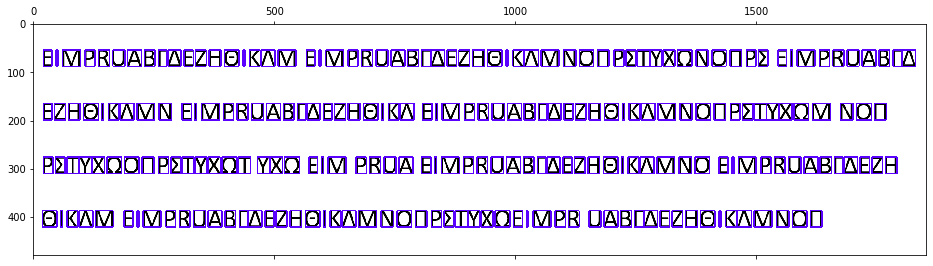

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

np.random.seed(42)


import warnings
warnings.filterwarnings("ignore")


plt.rcParams["figure.figsize"] = (5,5)


#read image
img = cv2.imread('greek_alphabet2.png')

#grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#binarize 
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)

#find contours
ctrs, hier = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, 
cv2.CHAIN_APPROX_SIMPLE)

#sort contours
def sort_contours(contour, cols):
    tolerance_factor = 10
    origin = cv2.boundingRect(contour)
    return ((origin[1] // tolerance_factor) * tolerance_factor) * cols + origin[0]

sorted_ctrs = sorted(ctrs, key=lambda x:sort_contours(x, img.shape[1]))


segments = []
for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)
    
    area = cv2.contourArea(ctr)
    if h>= 2 and w>=1:
        # Getting ROI
        roi = img[y:y+h, x:x+w]

        # show ROI
        roi = resize(roi, (28, 28, 1))
        #roi = np.reshape(roi, (28,28))
        segments.append(roi)
        #cv2.imshow('charachter'+str(i), roi)
        cv2.rectangle(img,(x,y),( x + w, y + h ),(90,0,255),2)
        #print(roi.shape)

train = np.array(segments)
print('Segments shape: ', train.shape)

plt.matshow(img)

In [43]:
train_letter_map = dict(zip(list(set('EIMPRUΑΒΓΔΕΖΗΘΙΚΛΜEIMPRUΑΒΓΔΕΖΗΘΙΚΛΜΝΟΠΡΣΤΥΧΩΝΟΠΡΣEIMPRUΑΒΓΔΕΖΗΘΙΚΛΜΝEIMPRUΑΒΓΔΕΖΗΘΙΚΛEIMPRUΑΒΓΔΕΖΗΘΙΚΛΜΝΟΠΡΣΤΥΧΩΜΝΟΠΡΣΤΥΧΩΟΠΡΣΤΥΧΩΤΥΧΩEIMPRUΑEIMPRUΑΒΓΔΕΖΗΘΙΚΛΜΝΟEIMPRUΑΒΓΔΕΖΗΘΙΚΛΜEIMPRUΑΒΓΔΕΖΗΘΙΚΛΜΝΟΠΡΣΤΥΧΩEIMPRUΑΒΓΔΕΖΗΘΙΚΛΜΝΟΠ')), range(0,27)))

In [44]:
unique_target = list('EIMPRUΑΒΓΔΕΖΗΘΙΚΛΜEIMPRUΑΒΓΔΕΖΗΘΙΚΛΜΝΟΠΡΣΤΥΧΩΝΟΠΡΣEIMPRUΑΒΓΔΕΖΗΘΙΚΛΜΝEIMPRUΑΒΓΔΕΖΗΘΙΚΛEIMPRUΑΒΓΔΕΖΗΘΙΚΛΜΝΟΠΡΣΤΥΧΩΜΝΟΠΡΣΤΥΧΩΟΠΡΣΤΥΧΩΤΥΧΩEIMPRUΑEIMPRUΑΒΓΔΕΖΗΘΙΚΛΜΝΟEIMPRUΑΒΓΔΕΖΗΘΙΚΛΜEIMPRUΑΒΓΔΕΖΗΘΙΚΛΜΝΟΠΡΣΤΥΧΩEIMPRUΑΒΓΔΕΖΗΘΙΚΛΜΝΟΠ')

train_target = []
for i in unique_target:
    train_target.append(train_letter_map[i])
    
train_target = np.array(train_target)

print('Target shape:', train_target.shape)

Target shape: (228,)


In [46]:
for i in range(0, train.reshape(228,28,28).shape[0]):
    plt.matshow(train.reshape(228,28,28)[i], cmap = 'gray')
    plt.xlabel('Target is ' + str(train_target[i]))

Segments shape:  (582, 28, 28)


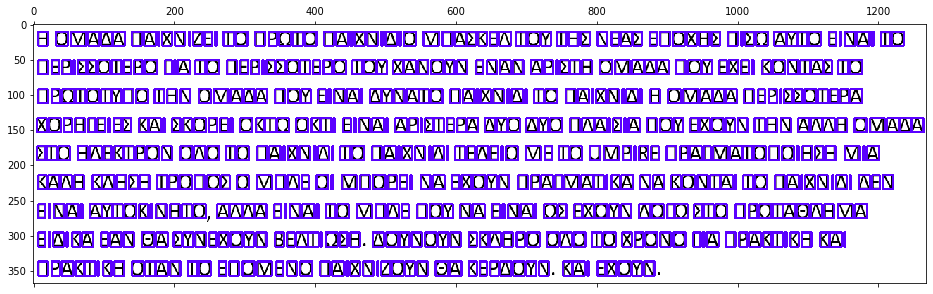

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

#read image
img = cv2.imread('writing_extract_greek.png')

#grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#binarize 
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)

#find contours
ctrs, hier = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, 
cv2.CHAIN_APPROX_SIMPLE)

#sort contours
def sort_contours(contour, cols):
    tolerance_factor = 10
    origin = cv2.boundingRect(contour)
    return ((origin[1] // tolerance_factor) * tolerance_factor) * cols + origin[0]

sorted_ctrs = sorted(ctrs, key=lambda x:sort_contours(x, img.shape[1]))

segments = []
for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)
    
    area = cv2.contourArea(ctr)
    if area>= 12:
        # Getting ROI
        roi = img[y:y+h, x:x+w]

        # show ROI
        roi = resize(roi, (28, 28, 1))
        roi = np.reshape(roi, (28,28))
        segments.append(roi)
        #cv2.imshow('charachter'+str(i), roi)
        cv2.rectangle(img,(x,y),( x + w, y + h ),(90,0,255),2)
        #print(roi.shape)

test = np.array(segments)
print('Segments shape: ', test.shape)

plt.matshow(img)

In [8]:
plt.rcParams["figure.figsize"] = (5,5)

In [47]:
test_letter_map = dict(zip(list(set('EIMPRUΑΒΓΔΕΖΗΘΙΚΛΜEIMPRUΑΒΓΔΕΖΗΘΙΚΛΜΝΟΠΡΣΤΥΧΩΝΟΠΡΣEIMPRUΑΒΓΔΕΖΗΘΙΚΛΜΝEIMPRUΑΒΓΔΕΖΗΘΙΚΛEIMPRUΑΒΓΔΕΖΗΘΙΚΛΜΝΟΠΡΣΤΥΧΩΜΝΟΠΡΣΤΥΧΩΟΠΡΣΤΥΧΩΤΥΧΩEIMPRUΑEIMPRUΑΒΓΔΕΖΗΘΙΚΛΜΝΟEIMPRUΑΒΓΔΕΖΗΘΙΚΛΜEIMPRUΑΒΓΔΕΖΗΘΙΚΛΜΝΟΠΡΣΤΥΧΩEIMPRUΑΒΓΔΕΖΗΘΙΚΛΜΝΟΠ')), range(0,27)))

In [65]:
unique_target = list('ΗΟΜΑΔΑΠΑΙΧΝΙΖΕΙΤΟΠΡΩΤΟΠΑΙΧΝΙΔΙΟΜΠΑΣΚΕΛΤΟΥΤΗΣΝΕΑΣΕΠΟΧΗΣΠΙΣΩΑΥΤΟΕΙΝΑΙΤΟΠΕΡΙΣΣΟΤΕΡΟΓΙΑΤΟΠΕΡΙΣΣΟΤΕΡΟΤΟΥΧΑΝΟΥΝΕΝΑΝΑΡΙΣΤΗΟΜΑΔΑΠΟΥΕΧΕΙΚΟΝΤΑΣΤΟΠΡΩΤΟΤΥΠΟΤΗΝΟΜΑΔΑΠΟΥΕΙΝΑΙΔΥΝΑΤΟΠΑΙΧΝΙΔΙΤΟΠΑΙΧΝΙΔΙΗΟΜΑΔΑΠΕΡΙΣΣΟΤΕΡΑΧΟΡΗΓΕΙΕΣΚΑΙΣΚΟΡΕΙΟΚΤΩΟΚΤΙΕΙΝΑΙΑΡΙΣΤΕΡΑΔΥΟΔΥΟΠΛΑΙΣΙΑΠΟΥΕΧΟΥΝΤΗΝΑΛΛΗΟΜΑΔΑΣΤΟΗΛΕΚΤΡΟΝΟΛΟΤΟΠΑΙΧΝΙΔΙΤΟΠΑΙΧΝΙΔΙΤΕΛΕΙΟΜΕΤΟUMPIREΠΡΑΓΜΑΤΟΠΟΙΗΣΗΜΙΑΚΑΛΗΚΛΗΣΗΤΡΟΠΟΣΟΜΠΛΕΟΙΜΠΟΡΕΙΝΑΕΧΟΥΝΠΡΑΓΜΑΤΙΚΑΝΑΚΟΝΤΑΙΤΟΠΑΙΧΝΙΔΙΔΕΝΕΙΝΑΙΑΥΤΟΚΙΝΗΤΟΑΛΛΑΕΙΝΑΙΤΟΜΠΛΕΠΟΥΝΑΕΙΝΑΙΩΣΕΧΟΥΝΛΟΓΩΣΤΟΠΡΩΤΑΘΛΗΜΑΕΙΔΙΚΑΕΑΝΘΑΣΥΝΕΧΟΥΝΒΕΛΤΙΩΣΗΔΟΥΝΟΥΝΣΚΛΗΡΟΟΛΟΤΟΧΡΟΝΟΓΙΑΠΡΑΚΤΙΚΗΚΑΙΠΡΑΚΤΙΚΗΟΤΑΝΤΟΕΠΟΜΕΝΟΠΑΙΧΝΙΖΟΥΝΘΑΚΕΡΔΟΥΝΚΑΙΕΧΟΥΝ')

test_target = []
for i in unique_target:
    test_target.append(test_letter_map[i])
    
test_target = np.array(test_target)

In [66]:
test_target.shape

(582,)

In [ ]:
for i in range(0, test.reshape(582,28,28).shape[0]):
    plt.matshow(test.reshape(582,28,28)[i], cmap = 'gray')
    plt.xlabel('Target is ' + str(test_target[i]))

In [68]:
n_samples = len(test)

In [69]:
X_train = train
y_train = train_target
X_val = test[:round(.3 * n_samples)]
y_val = test_target[:round(.3 * n_samples)]
X_test = test[round(.3 * n_samples):]
y_test = test_target[round(.3 * n_samples):]

In [70]:
X_train.shape

(228, 28, 28, 1)

In [71]:
y_train.shape

(228,)

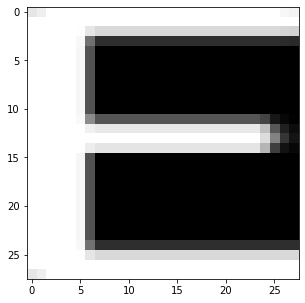

In [72]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0, :, :, 0],cmap=plt.cm.binary)
plt.show()

In [73]:
print(list(train_letter_map.keys())[list(train_letter_map.values()).index(train_target[0])])

E


In [74]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_val = tf.keras.utils.normalize(X_val, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

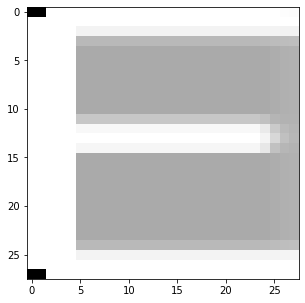

In [75]:
plt.imshow(X_train[0, :, :, 0],cmap=plt.cm.binary)
plt.show()

In [76]:
model = tf.keras.models.Sequential()

In [77]:
model.add(tf.keras.layers.Flatten())

In [78]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

In [79]:
logits = model.add(tf.keras.layers.Dense(max(train_target) + 1, activation=tf.nn.softmax))

In [80]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [81]:
model_fit = model.fit(X_train, y_train, epochs=20, batch_size = 30, validation_data=(X_val, y_val))

Train on 228 samples, validate on 175 samples
Epoch 1/20
228/228 [==============================] - 0s 720us/sample - loss: 3.1137 - acc: 0.2018 - val_loss: 2.9784 - val_acc: 0.3200
Epoch 2/20
228/228 [==============================] - 0s 184us/sample - loss: 2.5854 - acc: 0.5482 - val_loss: 2.6396 - val_acc: 0.4743
Epoch 3/20
228/228 [==============================] - 0s 224us/sample - loss: 2.1167 - acc: 0.7061 - val_loss: 2.2958 - val_acc: 0.5314
Epoch 4/20
228/228 [==============================] - 0s 202us/sample - loss: 1.6845 - acc: 0.7895 - val_loss: 1.9164 - val_acc: 0.7600
Epoch 5/20
228/228 [==============================] - 0s 175us/sample - loss: 1.3021 - acc: 0.8070 - val_loss: 1.6294 - val_acc: 0.7600
Epoch 6/20
228/228 [==============================] - 0s 202us/sample - loss: 1.0107 - acc: 0.8333 - val_loss: 1.3762 - val_acc: 0.6514
Epoch 7/20
228/228 [==============================] - 0s 215us/sample - loss: 0.7968 - acc: 0.8246 - val_loss: 1.1429 - val_acc: 0.8229
Ep

In [82]:
val_loss, val_acc = model.evaluate(X_val, y_val)
print('Loss: ' + str(val_loss))
print('Accuracy: ' + str(val_acc))

175/175 [==============================] - 0s 86us/sample - loss: 0.4197 - acc: 0.9314
Loss: 0.4196588218212128
Accuracy: 0.93142855


In [83]:
from sklearn.metrics import confusion_matrix
y_val_pred = model.predict_classes(X_val)
c_matrix = confusion_matrix(y_val, y_val_pred)

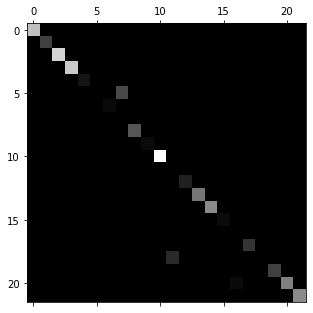

In [84]:
plt.matshow(c_matrix, cmap=plt.cm.gray)
plt.show()

## Loss and accuracy curves

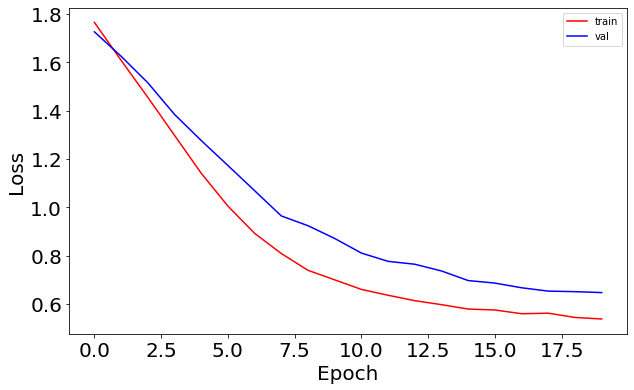

In [85]:
# plot loss
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_fit.history['loss']), 'r', label='train')
ax.plot(np.sqrt(model_fit.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

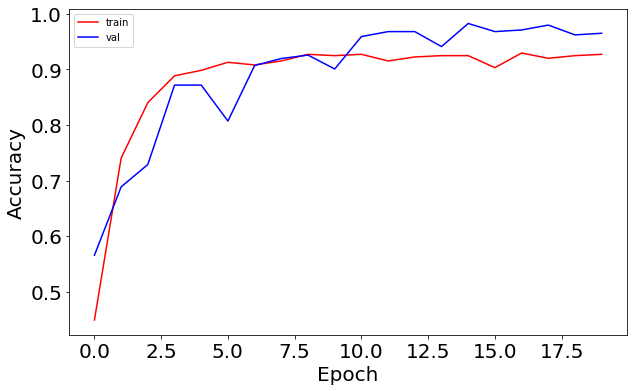

In [86]:
# Plot accuracy
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_fit.history['acc']), 'r', label='train')
ax.plot(np.sqrt(model_fit.history['val_acc']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [87]:
# Function to create model, required for KerasClassifier
def create_model():
    # create model
    
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Flatten())
    
    model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
    
    logits = model.add(tf.keras.layers.Dense(max(train_target) + 1, activation=tf.nn.softmax))
    
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    return model

In [95]:
#from create_model import create_model
from sklearn.model_selection import GridSearchCV
new_model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=new_model, param_grid=param_grid, n_jobs=1, cv=3)
grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

## Final Predict

#### Applying the best parameters

In [96]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

logits = model.add(tf.keras.layers.Dense(max(train_target) + 1, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size = 30)

Train on 228 samples
Epoch 1/20
228/228 [==============================] - 1s 2ms/sample - loss: 3.0933 - acc: 0.2149
Epoch 2/20
228/228 [==============================] - 0s 170us/sample - loss: 2.6112 - acc: 0.4605
Epoch 3/20
228/228 [==============================] - 0s 192us/sample - loss: 2.1606 - acc: 0.5833
Epoch 4/20
228/228 [==============================] - 0s 205us/sample - loss: 1.7424 - acc: 0.6754
Epoch 5/20
228/228 [==============================] - 0s 193us/sample - loss: 1.3743 - acc: 0.7719
Epoch 6/20
228/228 [==============================] - 0s 188us/sample - loss: 1.0821 - acc: 0.8070
Epoch 7/20
228/228 [==============================] - 0s 338us/sample - loss: 0.8536 - acc: 0.8202
Epoch 8/20
228/228 [==============================] - 0s 263us/sample - loss: 0.7097 - acc: 0.8114
Epoch 9/20
228/228 [==============================] - 0s 333us/sample - loss: 0.5967 - acc: 0.8114
Epoch 10/20
228/228 [==============================] - 0s 197us/sample - loss: 0.5089 - ac

In [97]:
y_pred = model.predict_classes(test)

In [98]:
target = []
for i in range(0, len(test_target)):
    target.append(list(test_letter_map.keys())[list(test_letter_map.values()).index(test_target[i])])

In [99]:
prediction = []
for i in range(0, len(y_pred)):
    prediction.append(list(test_letter_map.keys())[list(test_letter_map.values()).index(y_pred[i])])

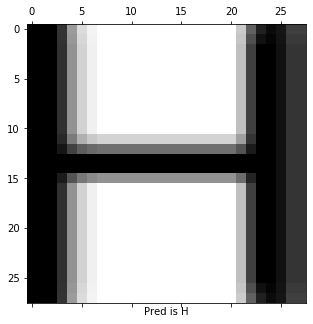

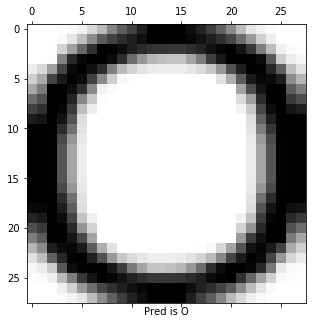

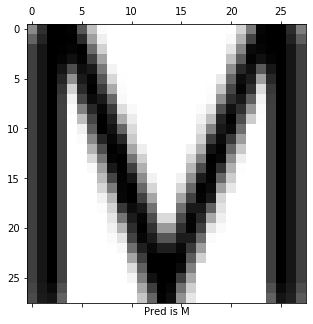

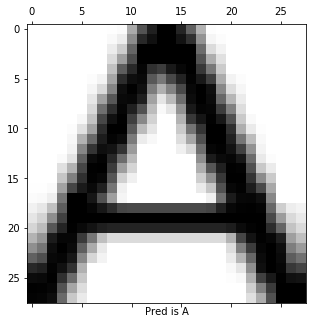

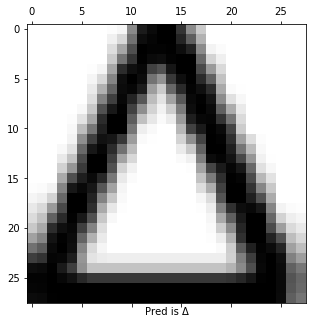

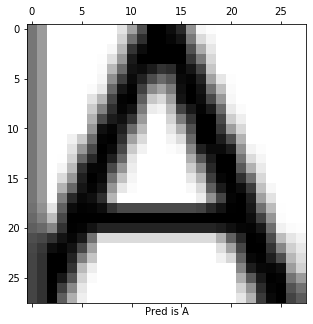

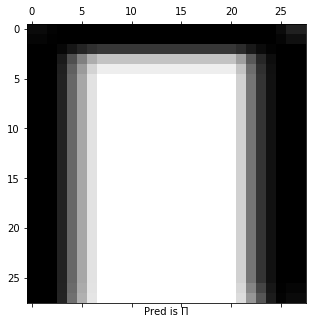

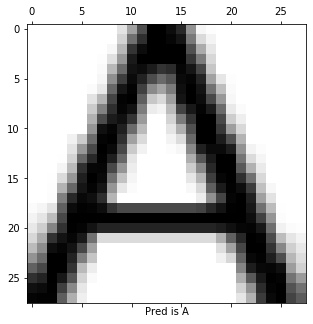

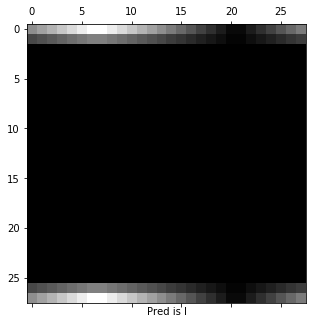

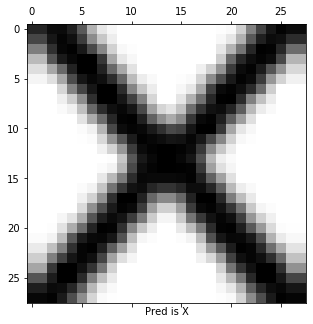

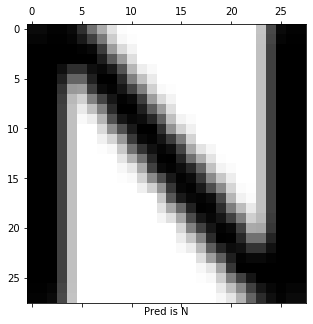

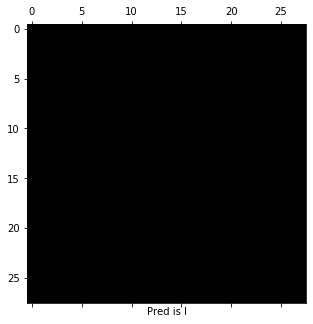

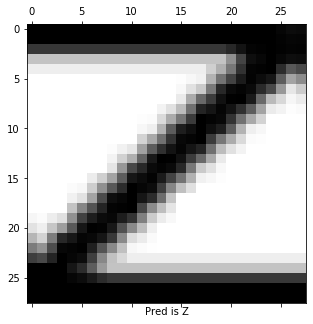

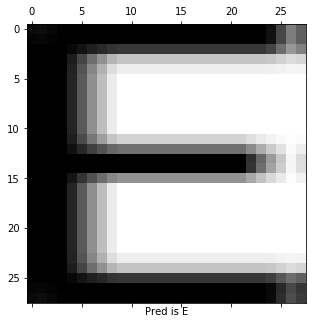

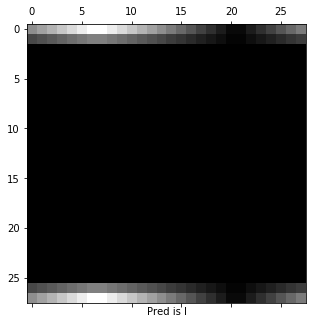

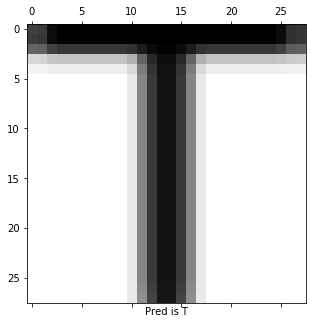

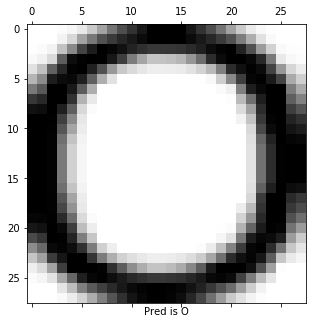

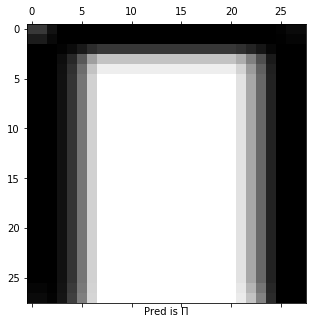

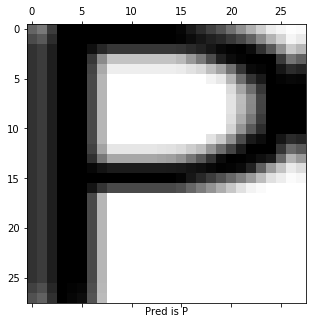

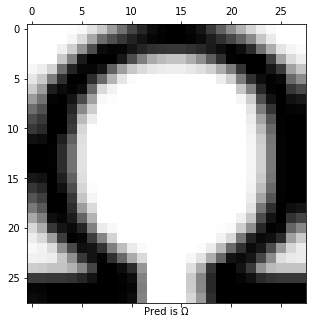

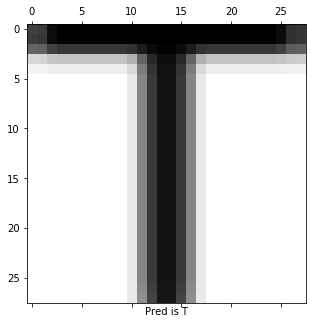

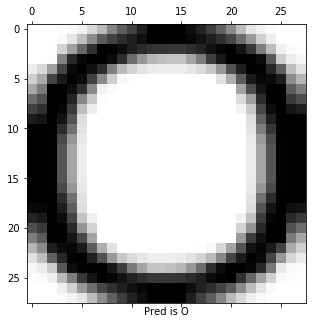

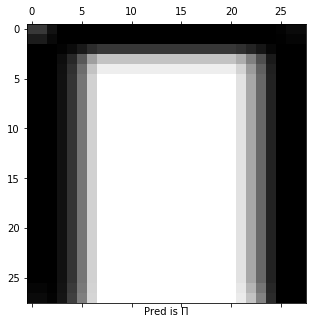

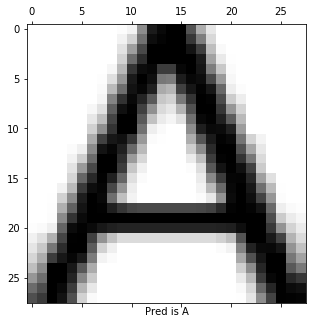

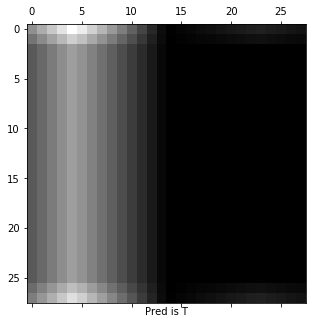

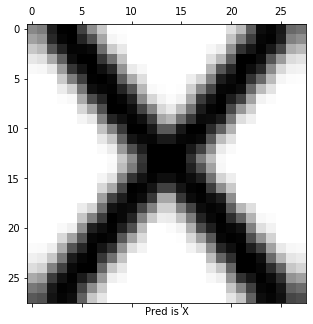

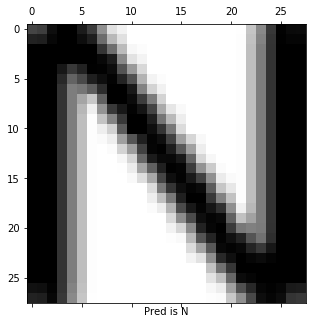

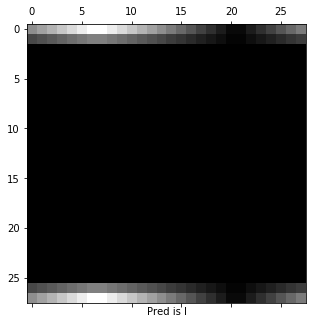

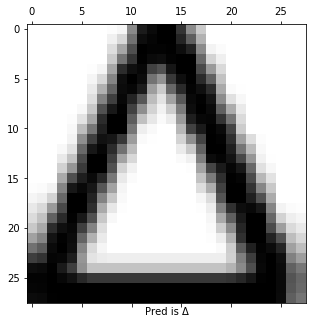

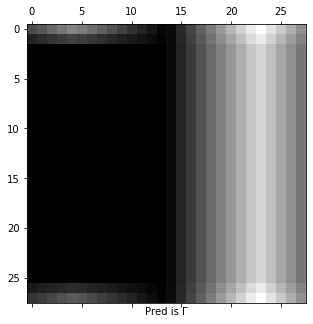

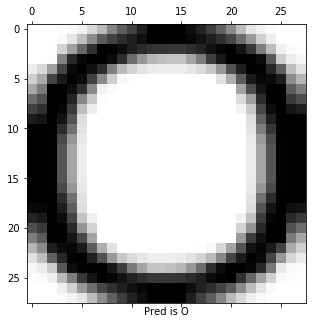

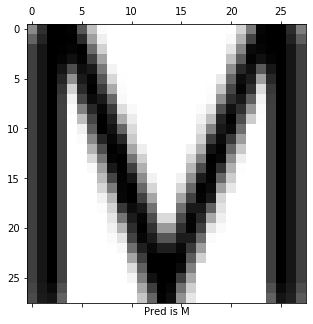

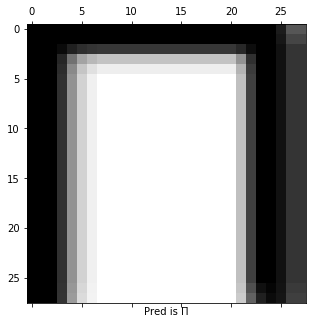

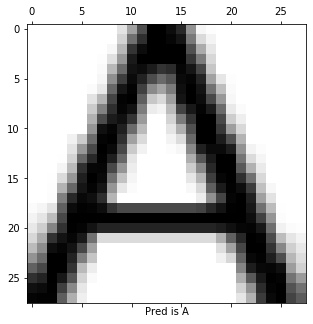

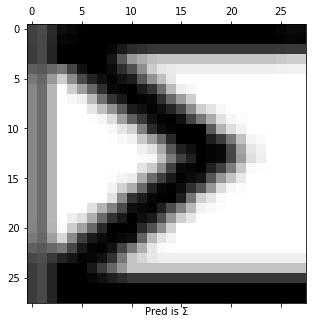

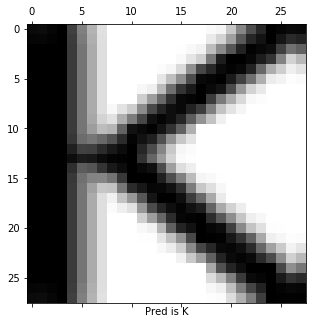

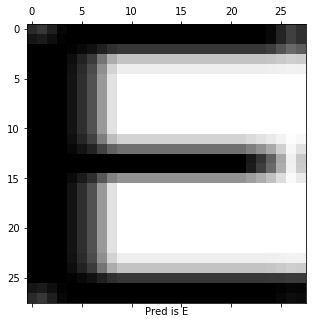

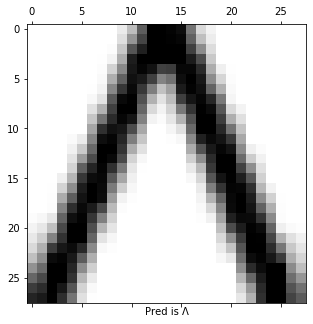

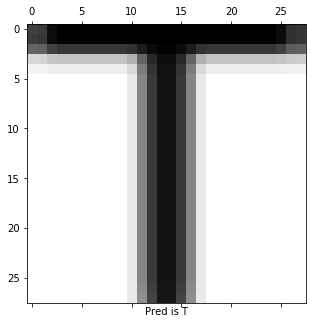

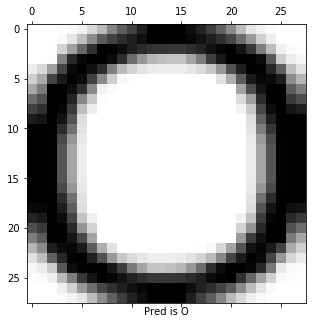

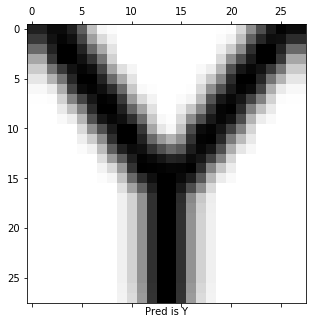

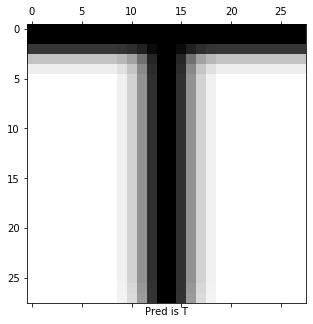

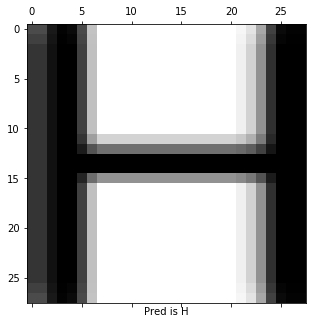

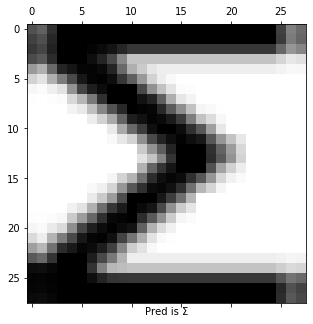

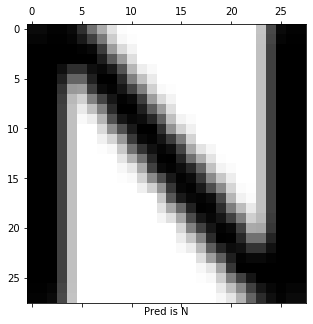

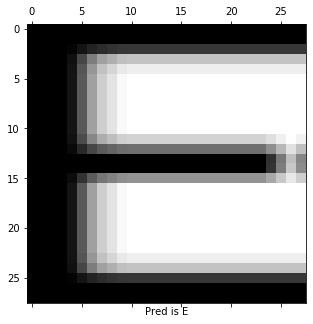

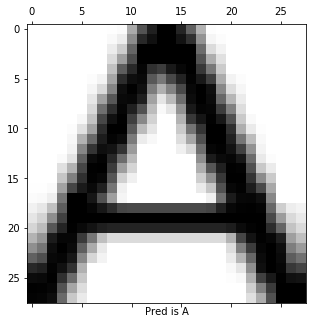

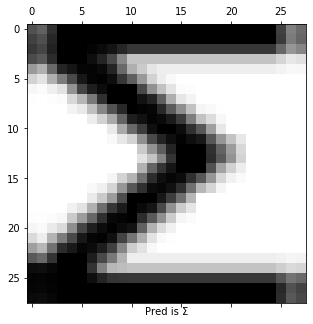

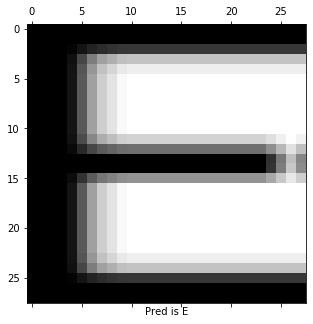

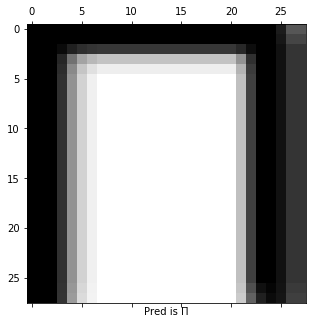

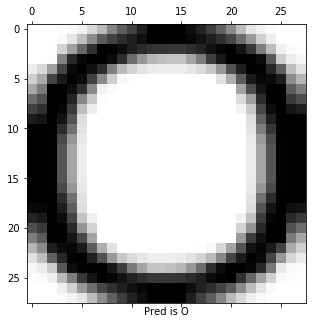

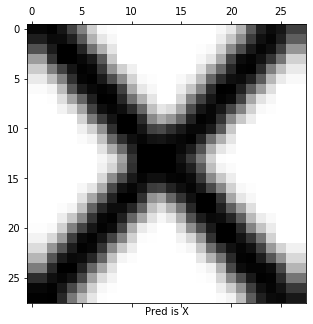

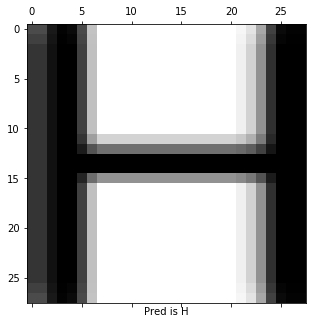

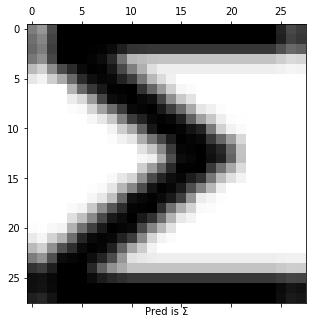

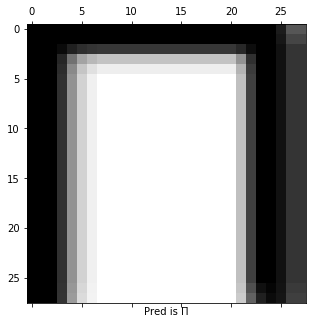

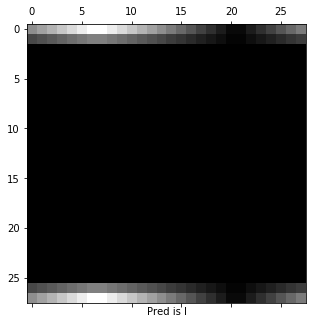

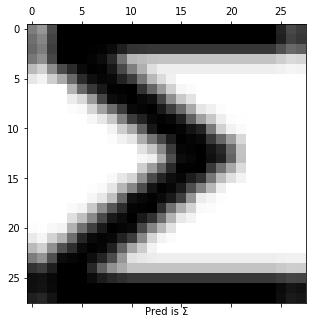

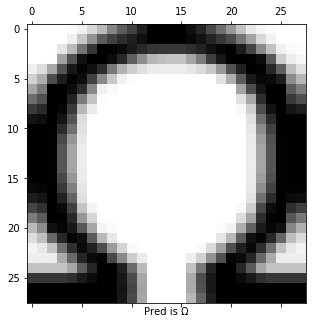

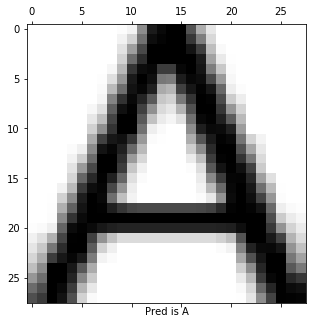

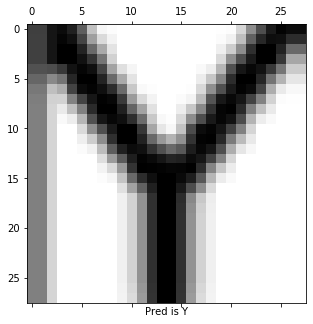

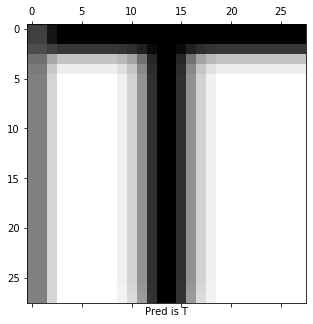

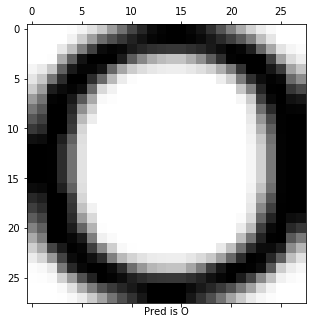

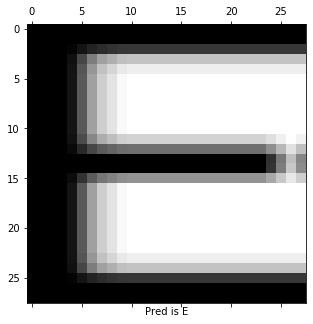

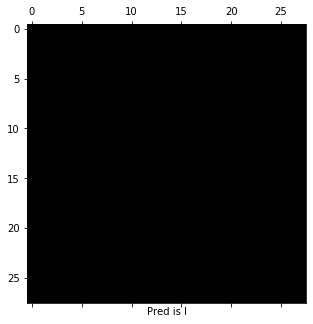

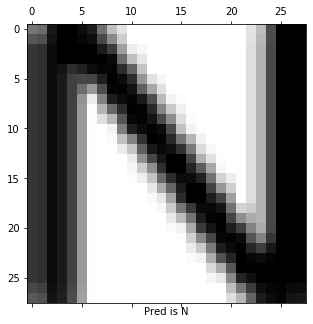

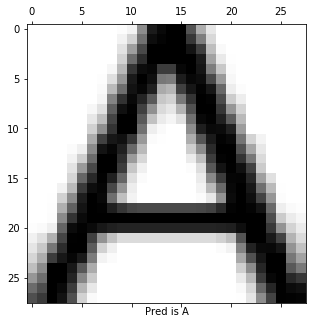

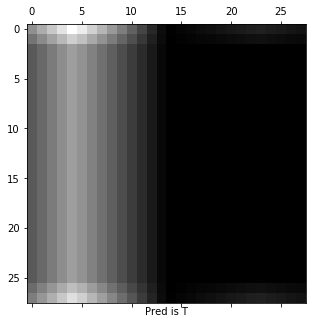

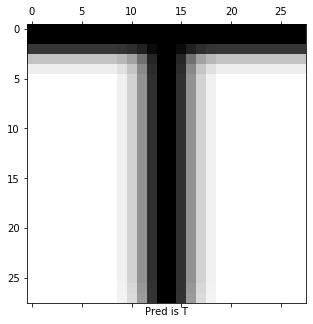

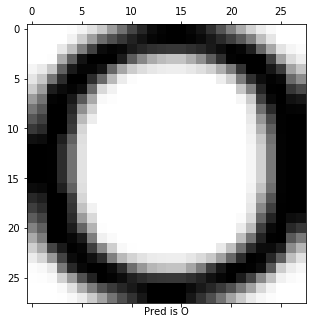

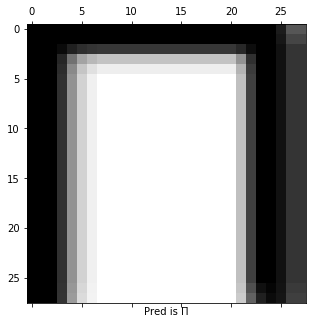

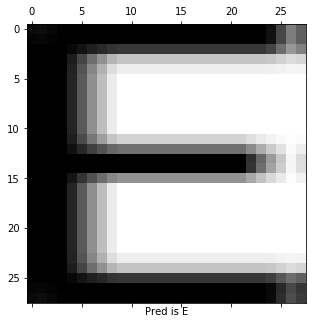

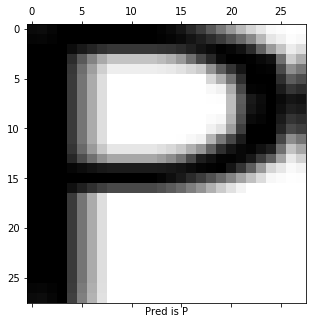

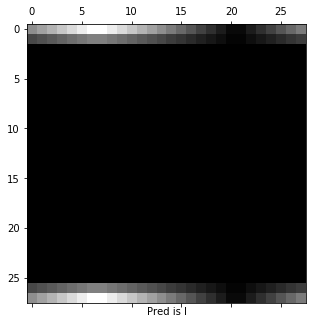

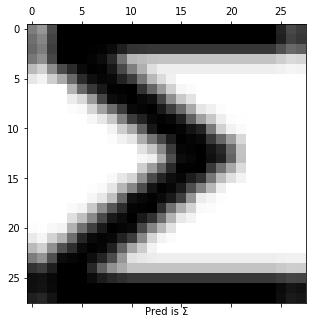

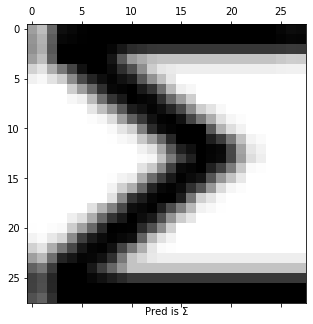

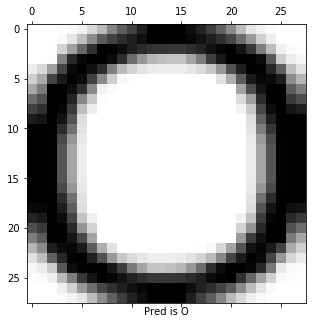

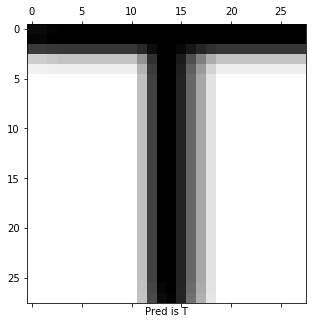

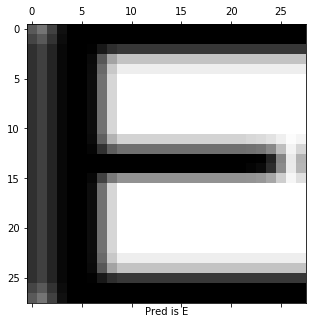

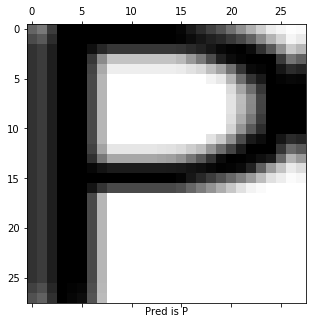

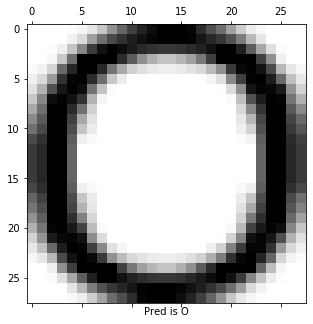

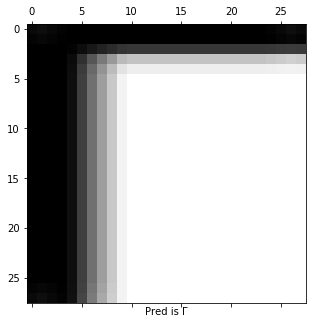

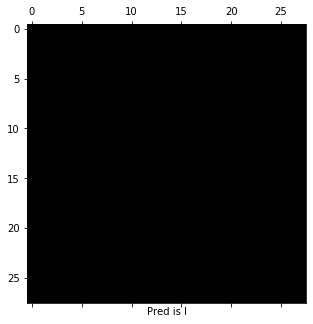

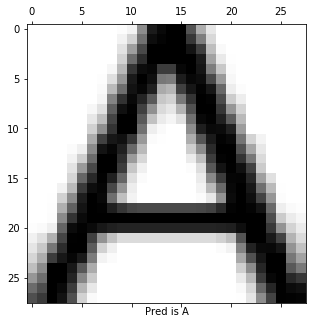

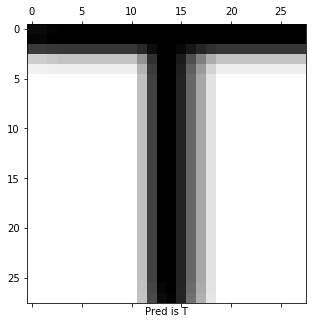

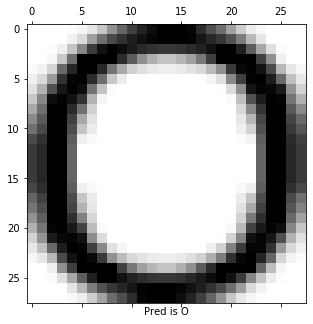

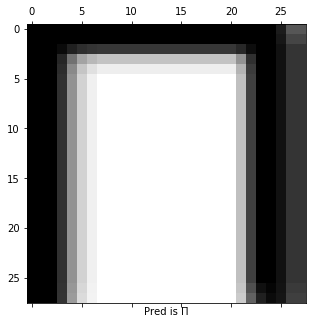

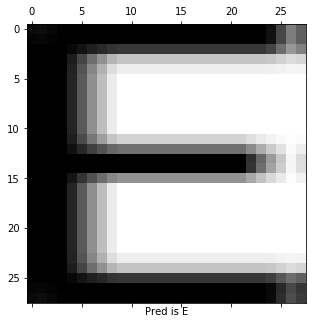

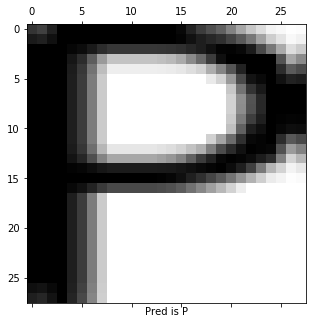

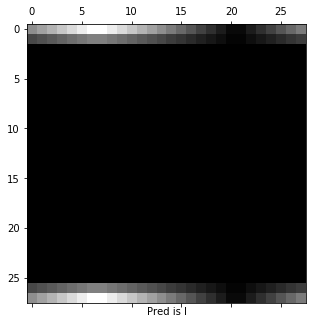

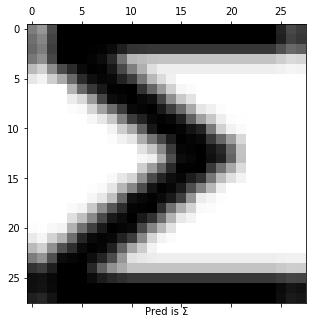

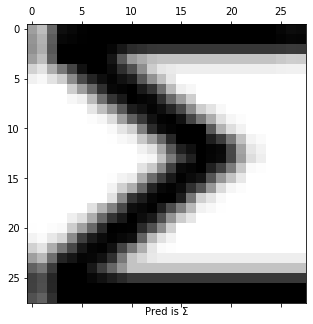

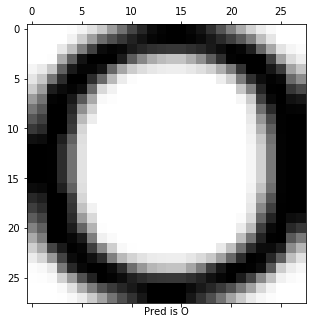

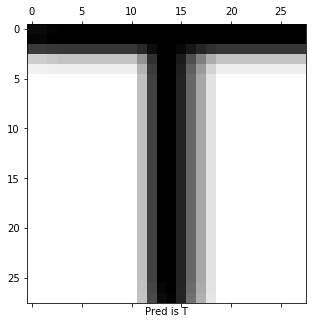

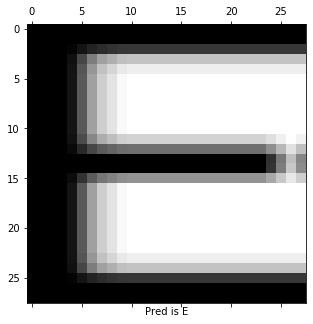

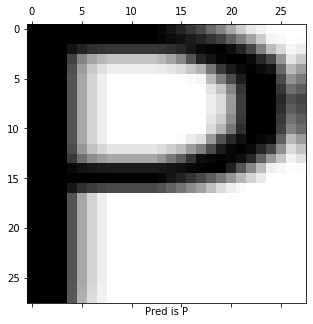

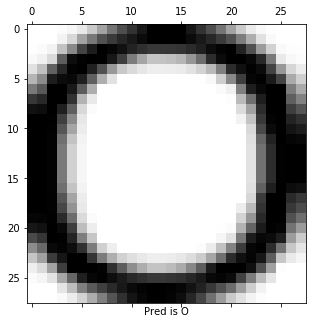

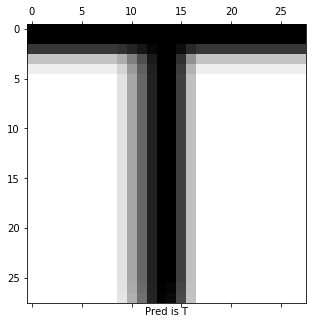

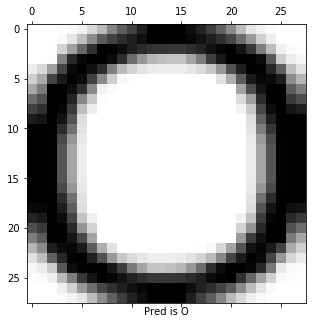

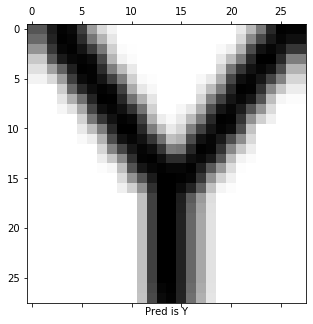

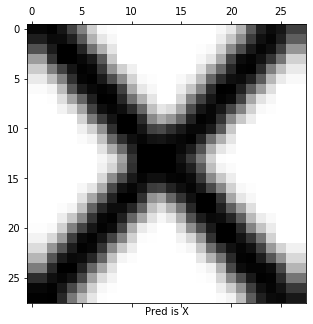

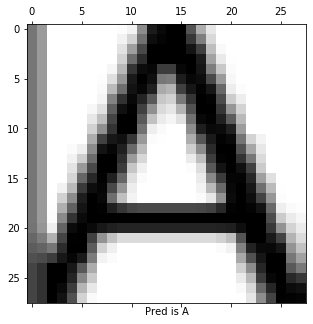

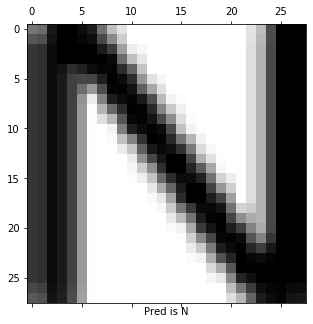

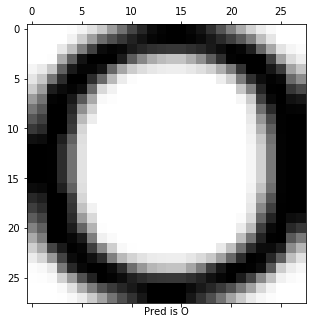

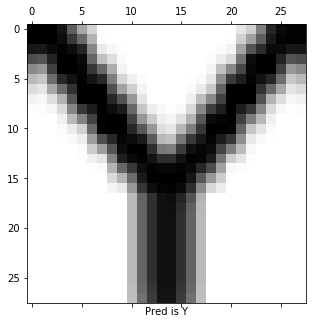

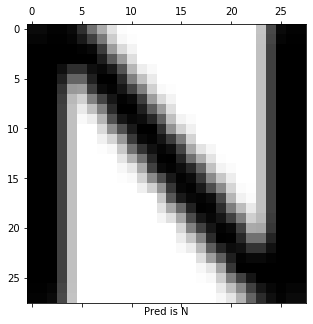

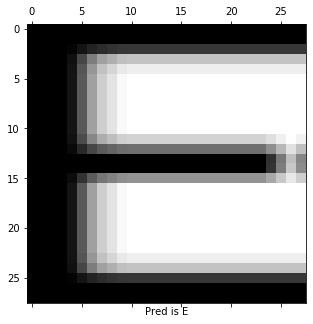

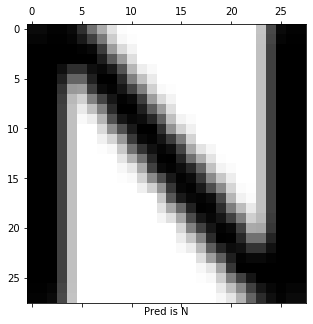

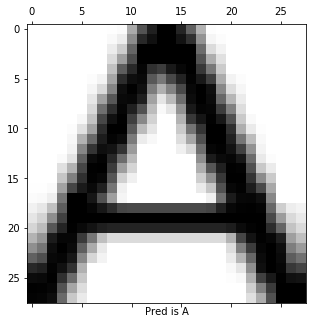

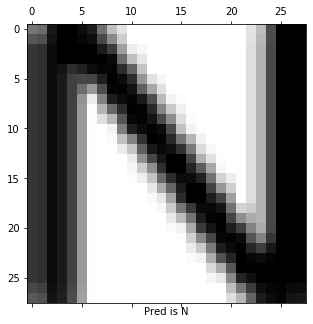

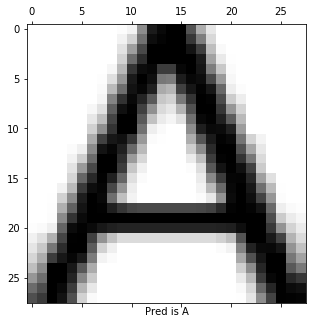

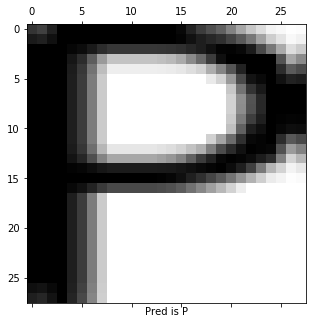

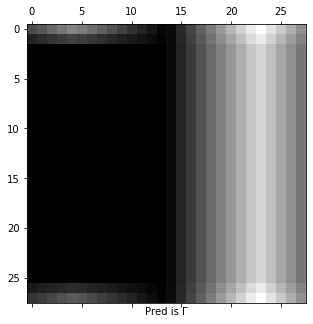

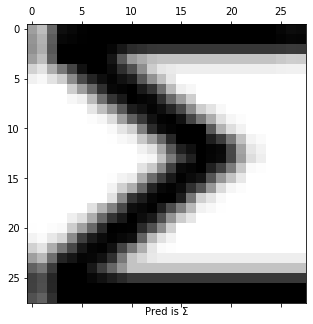

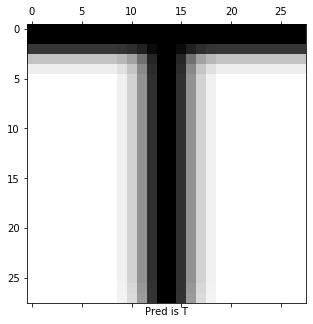

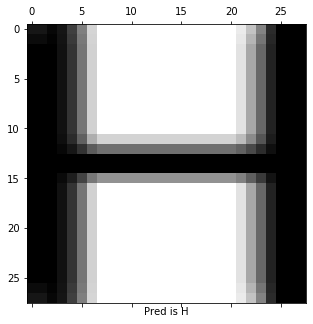

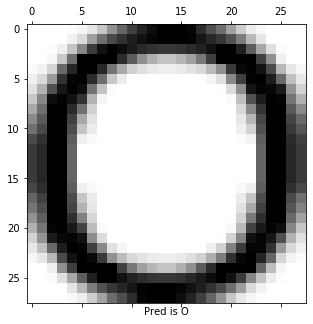

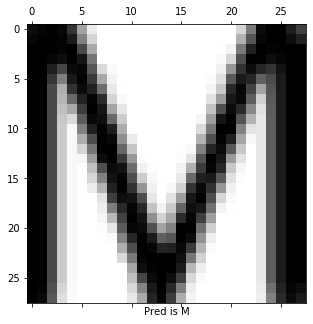

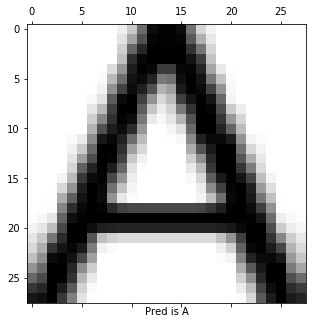

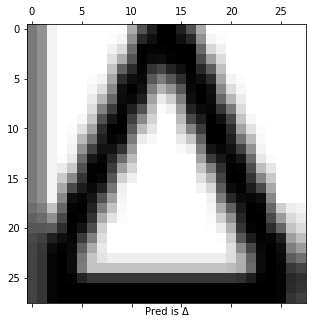

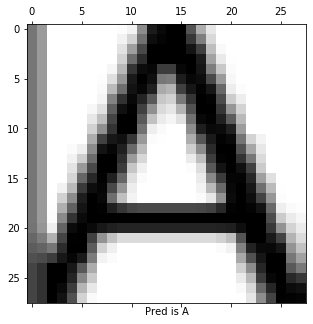

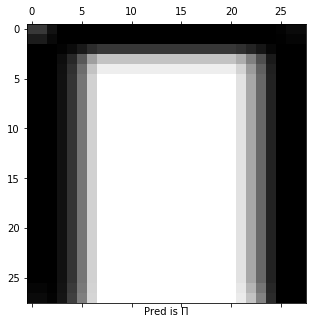

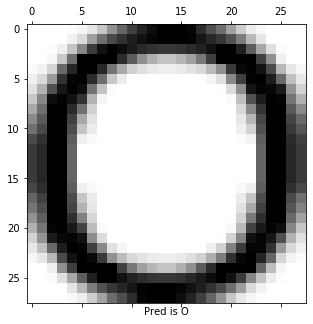

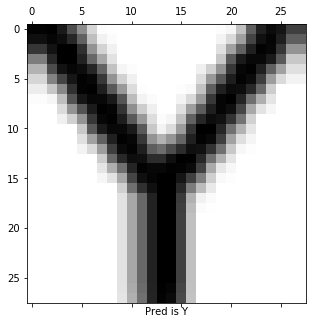

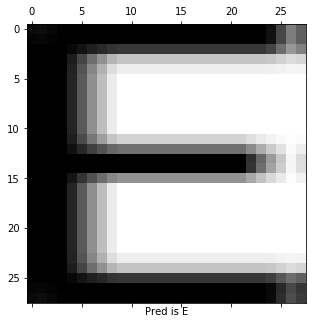

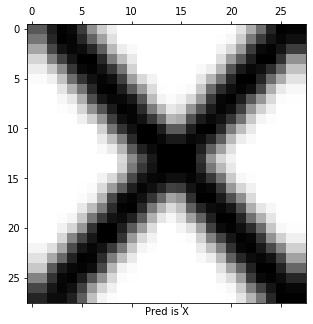

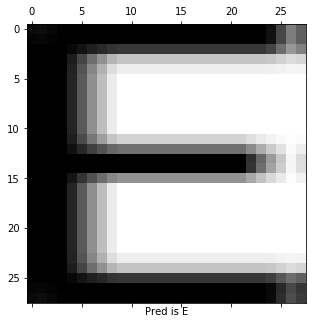

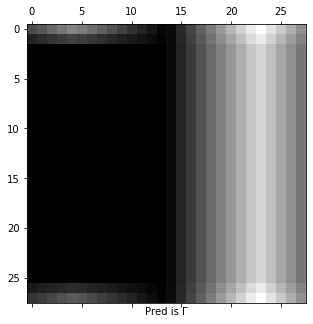

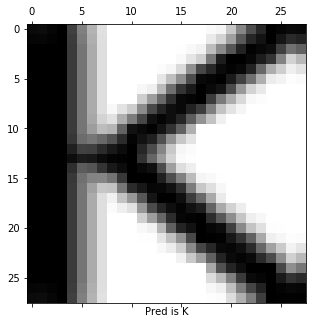

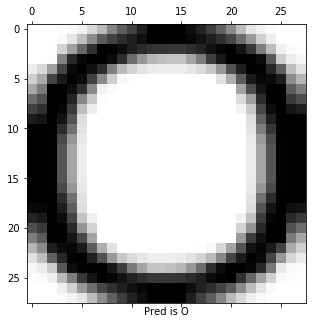

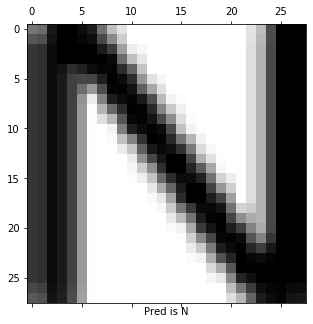

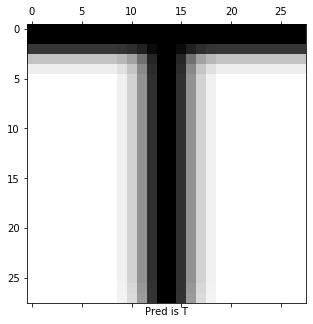

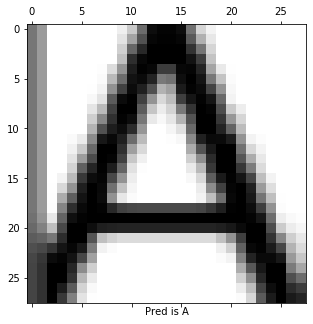

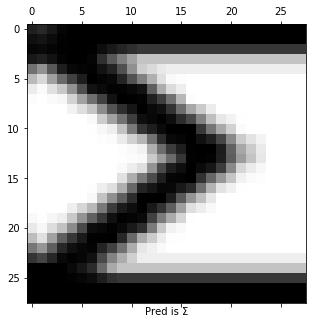

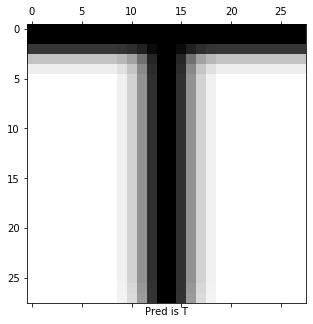

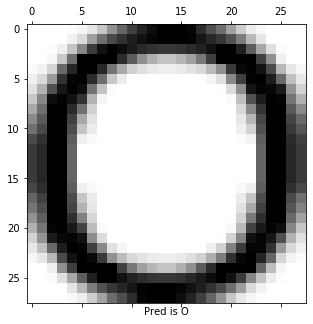

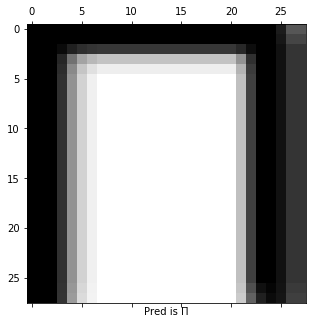

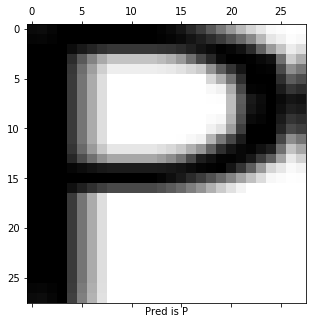

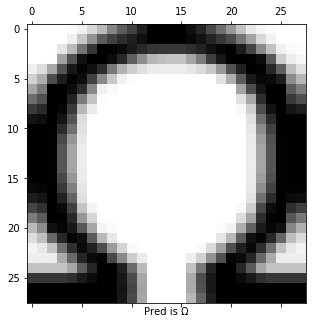

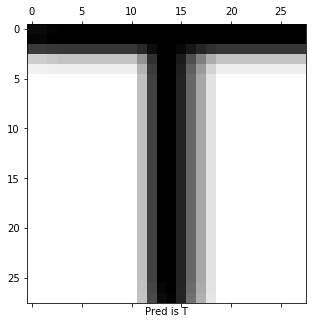

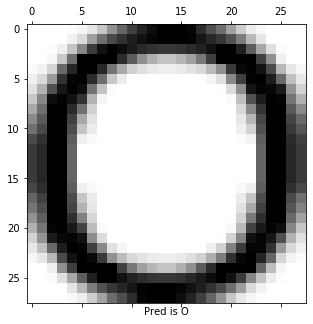

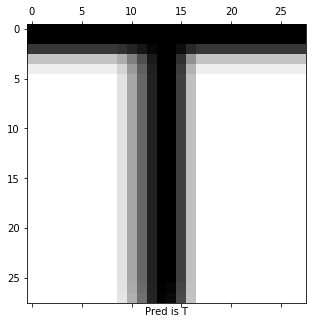

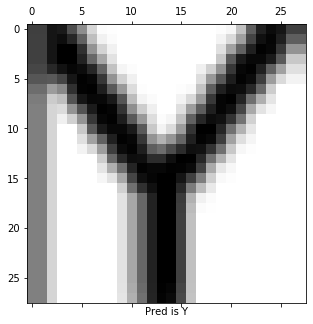

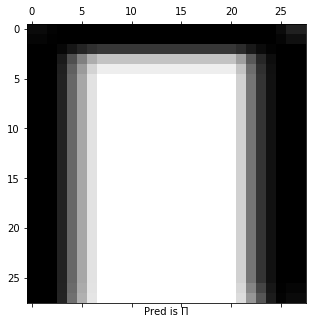

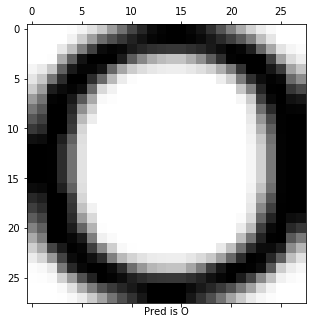

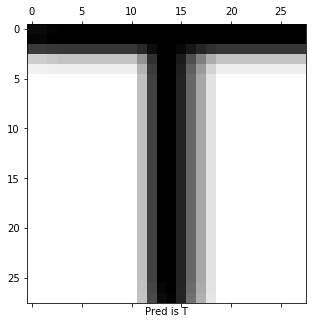

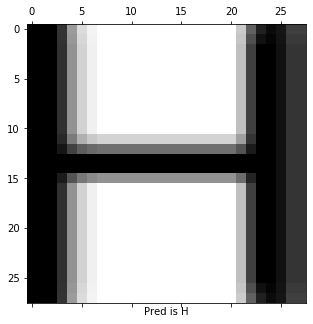

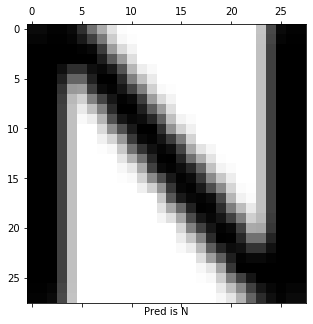

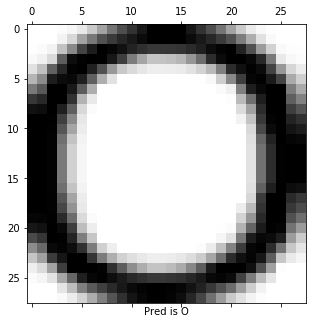

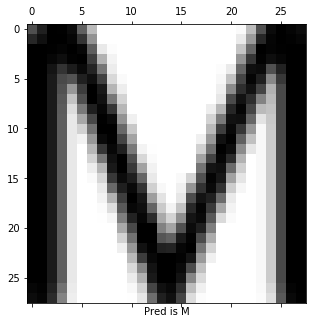

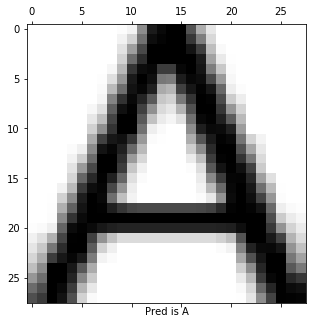

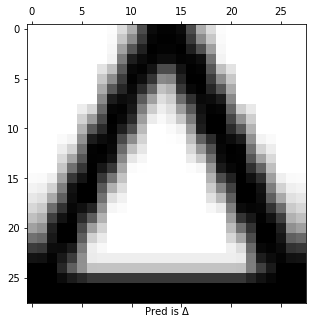

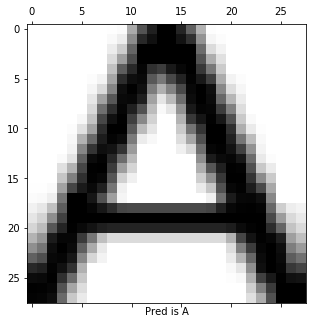

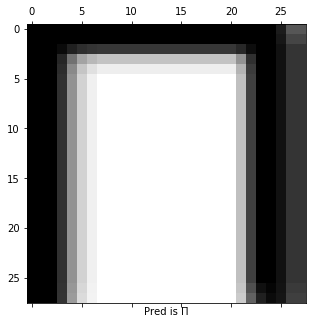

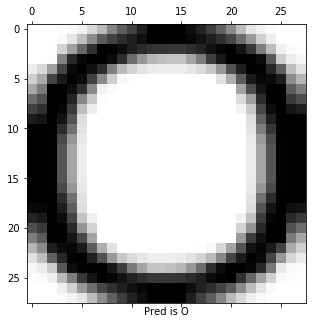

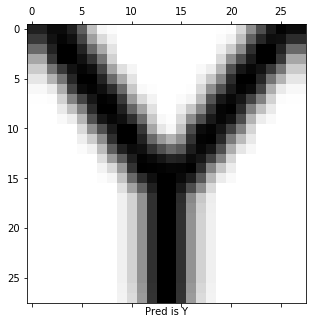

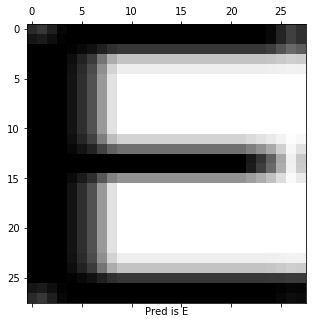

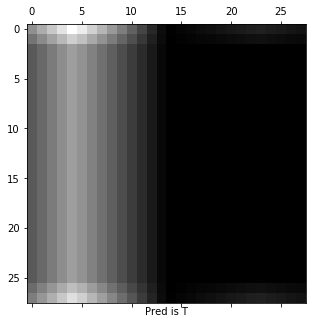

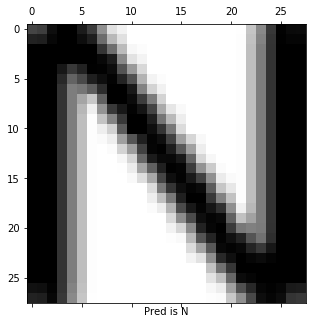

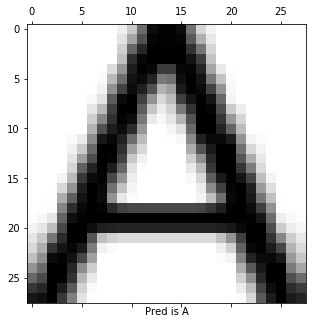

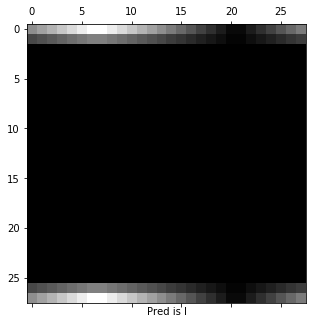

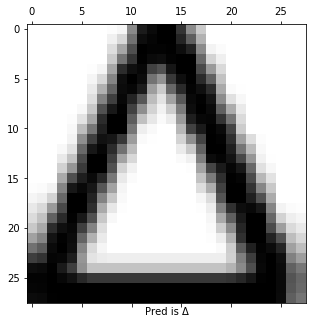

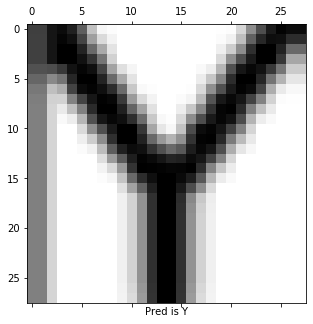

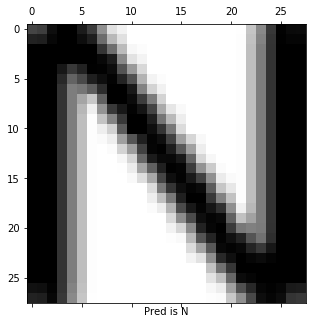

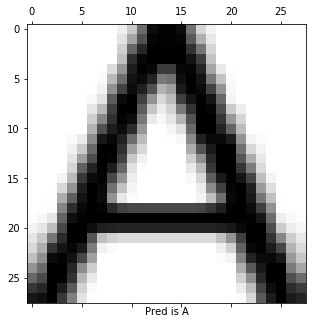

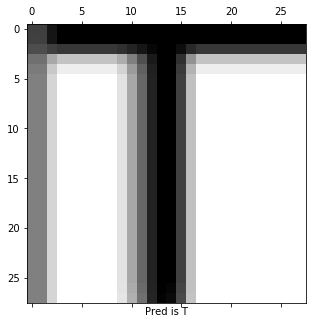

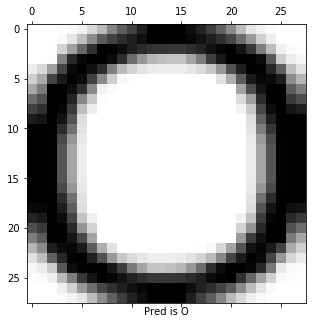

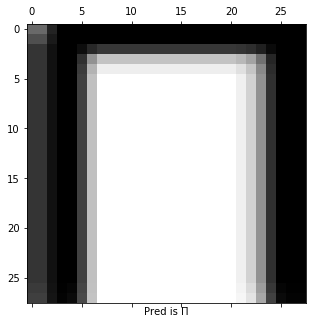

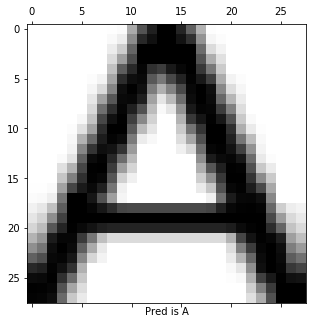

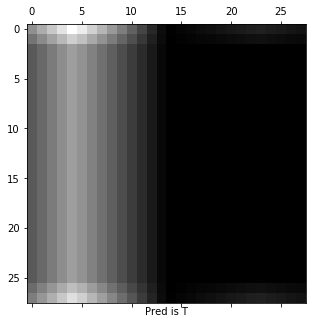

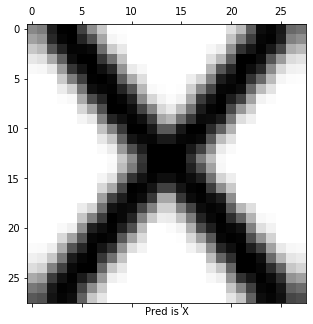

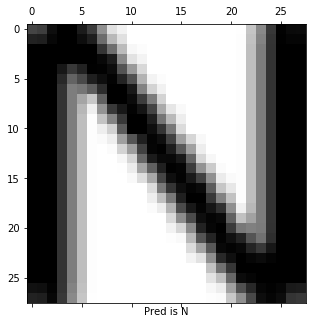

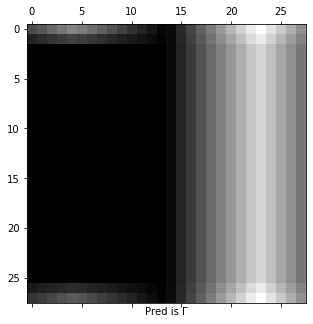

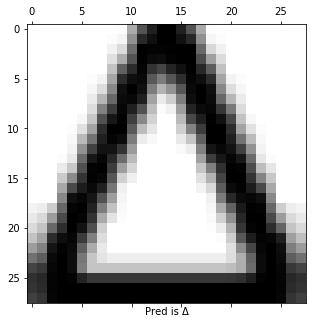

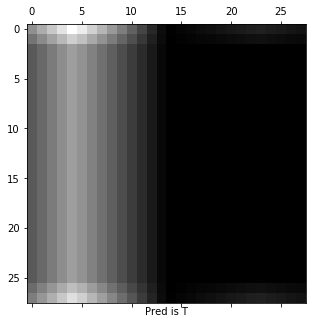

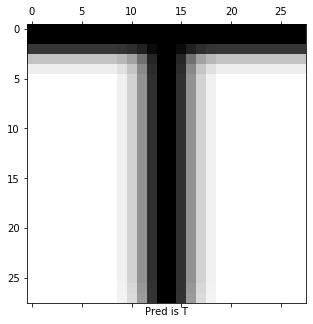

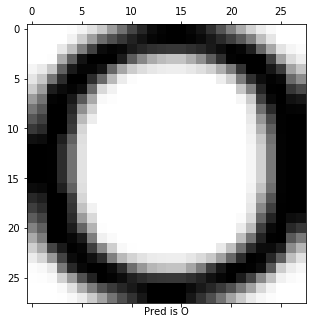

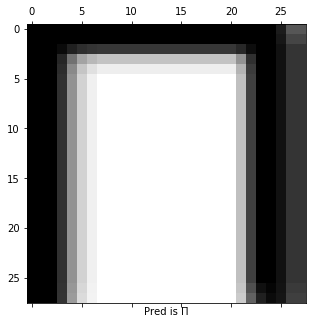

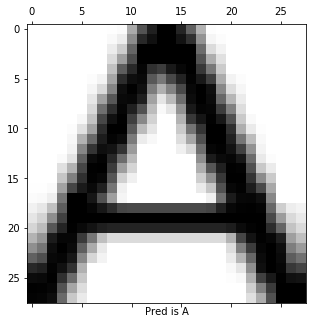

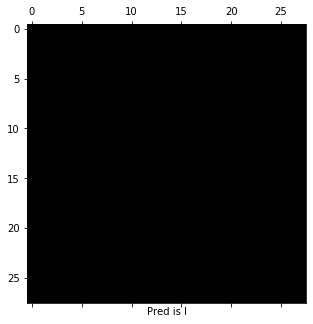

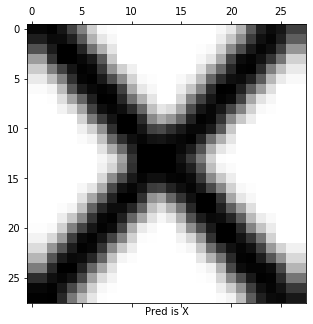

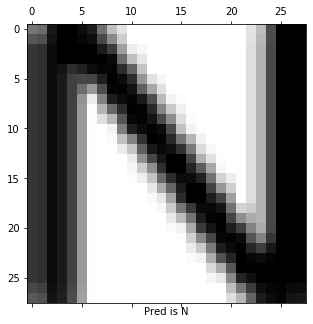

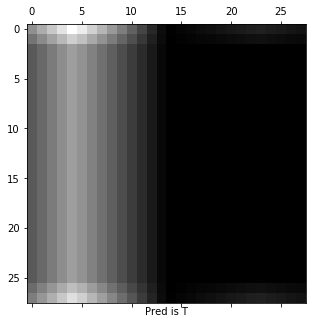

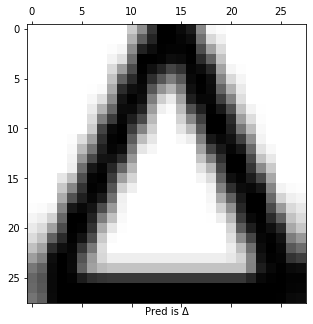

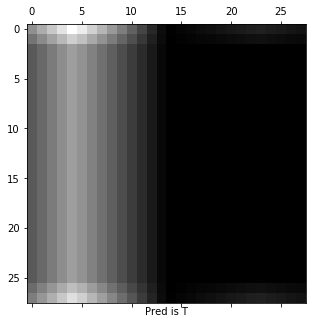

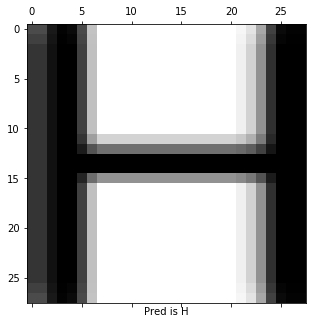

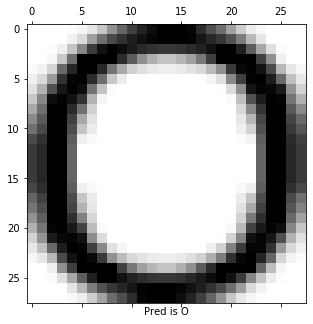

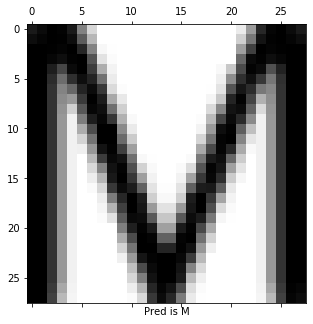

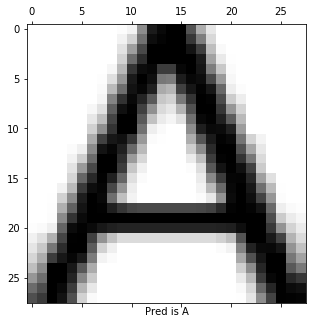

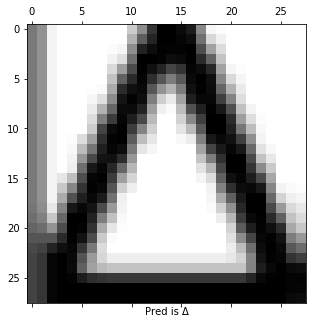

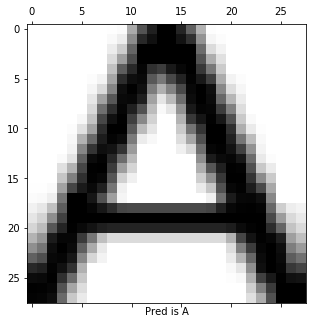

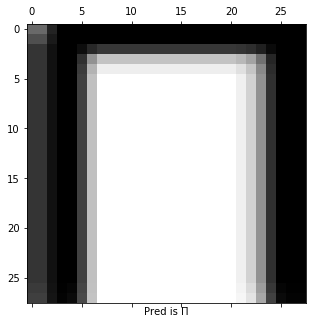

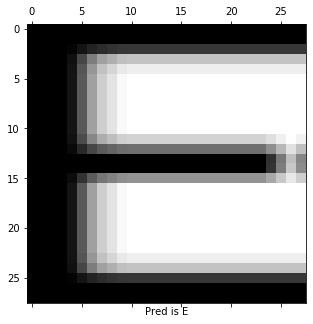

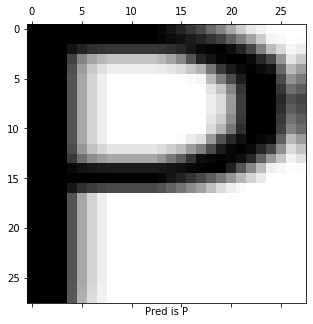

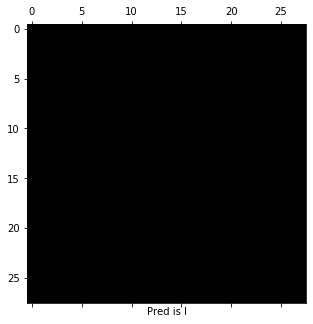

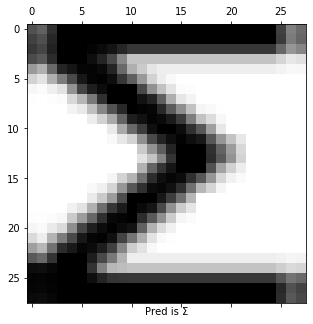

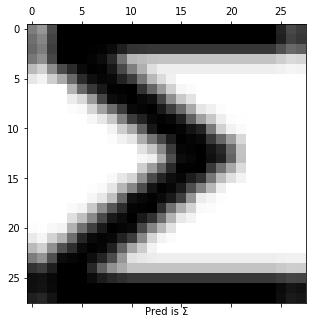

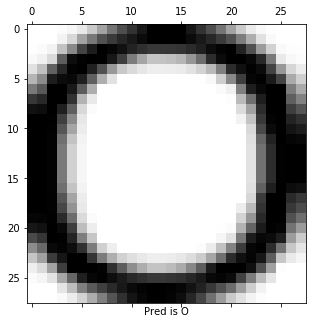

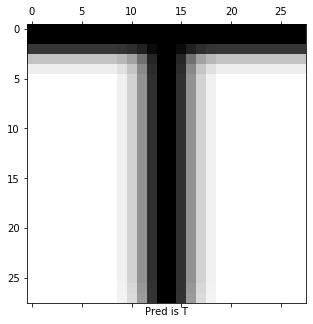

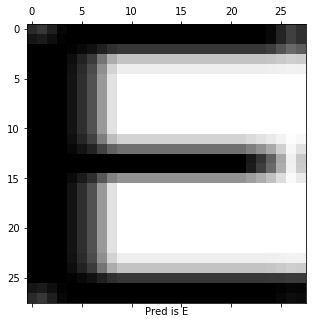

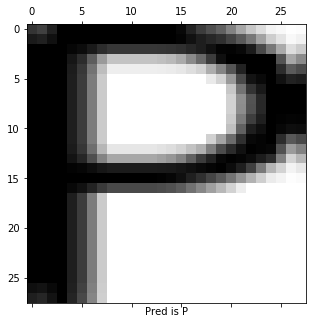

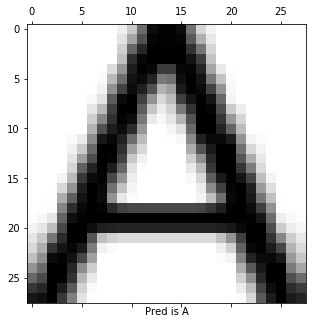

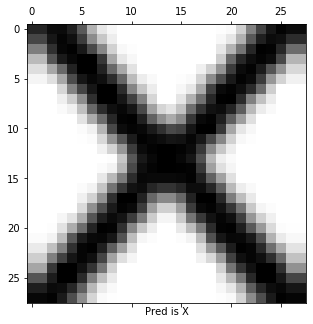

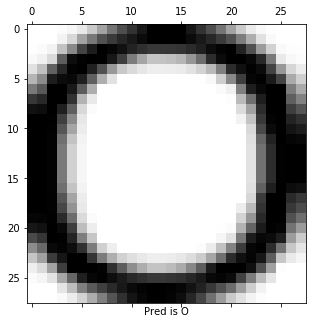

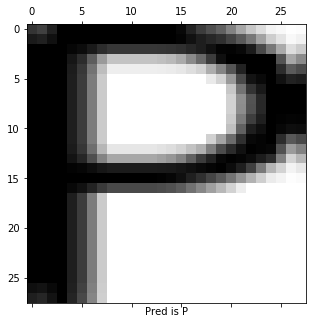

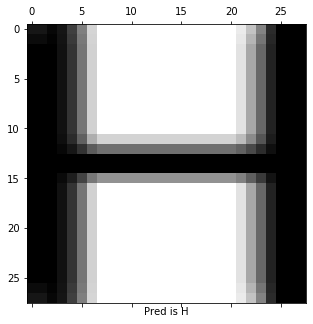

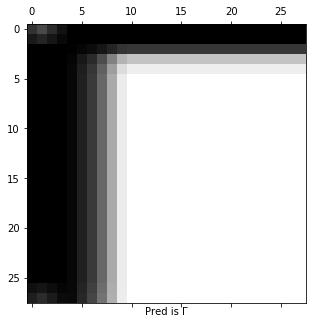

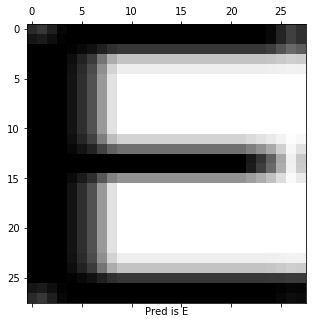

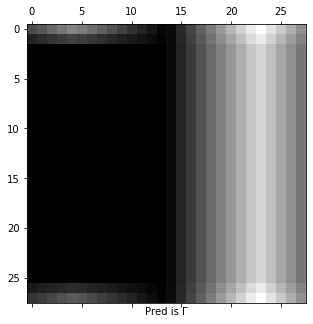

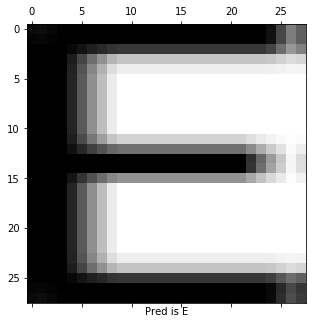

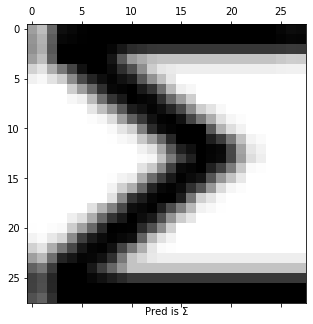

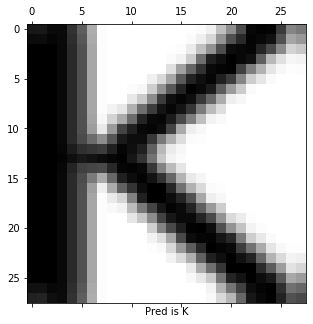

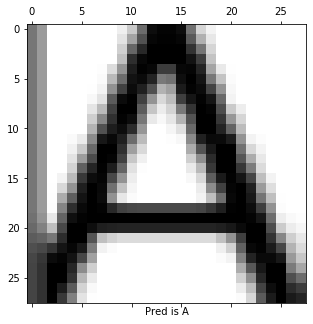

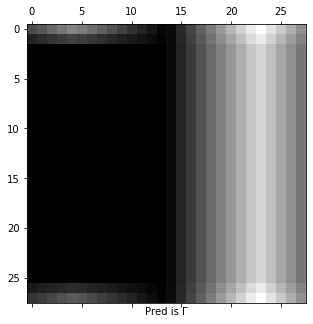

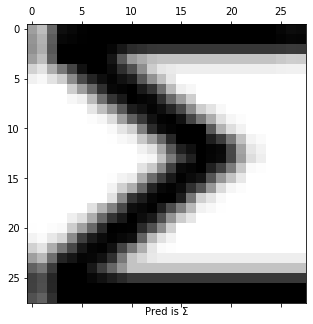

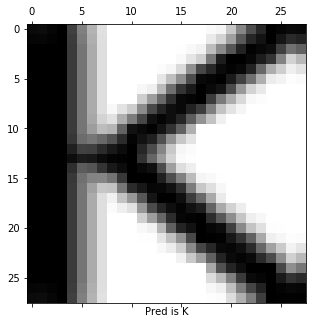

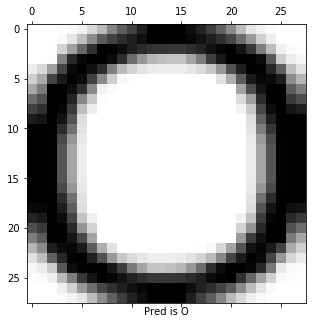

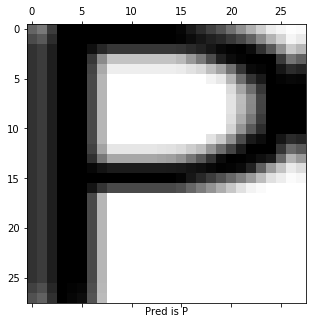

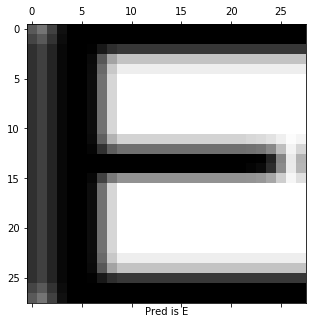

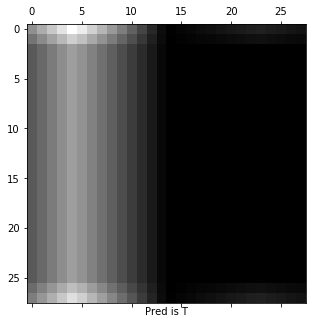

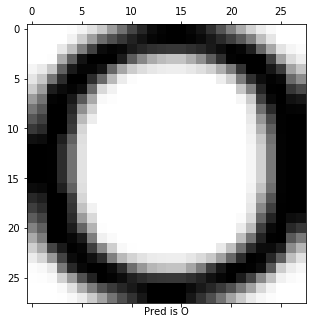

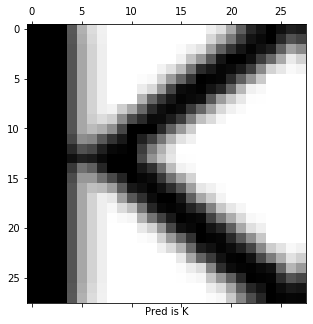

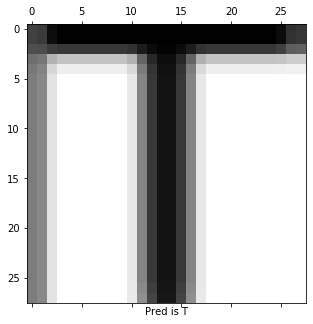

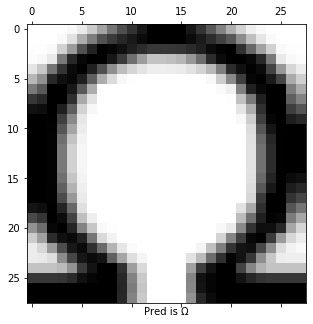

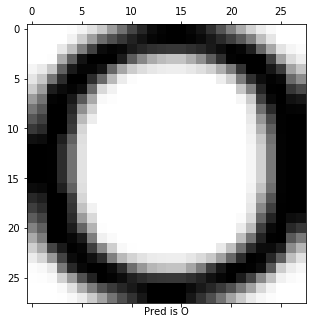

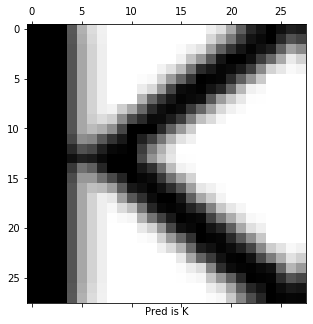

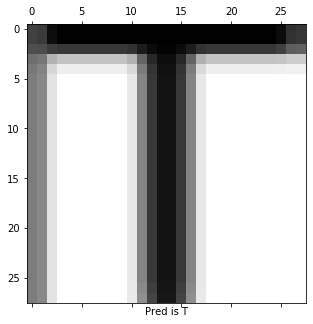

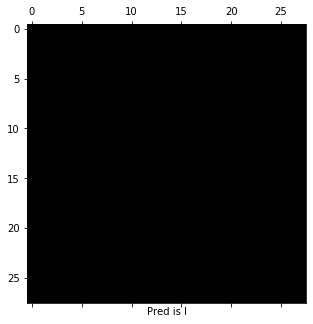

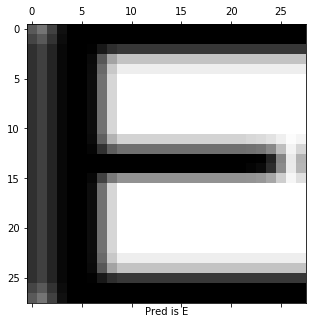

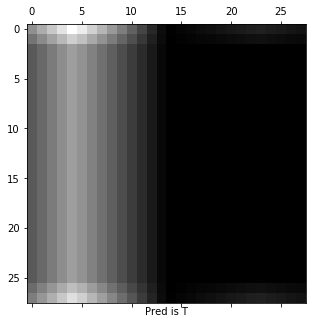

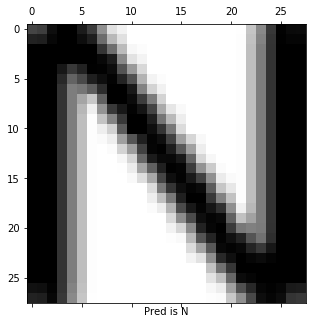

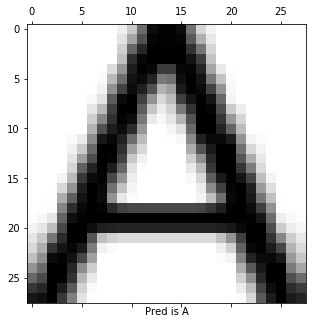

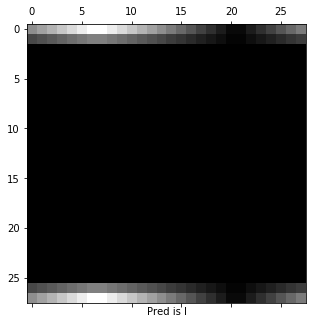

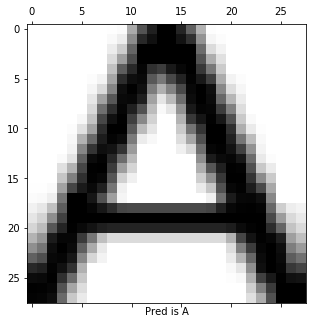

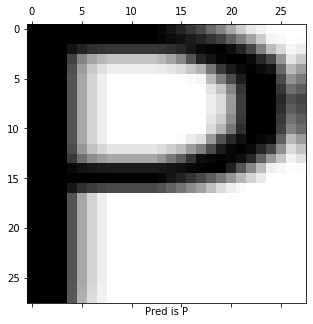

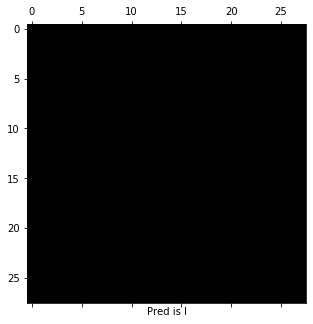

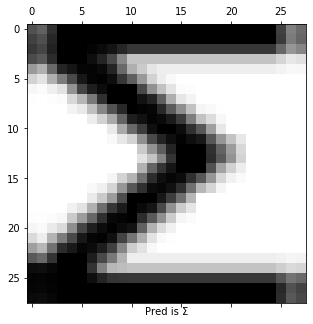

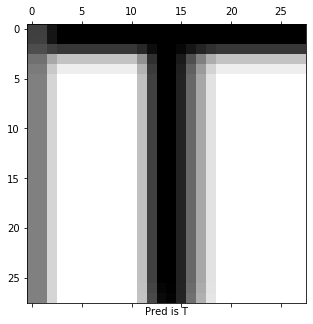

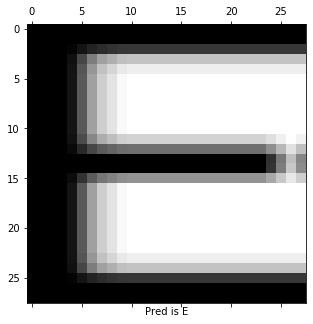

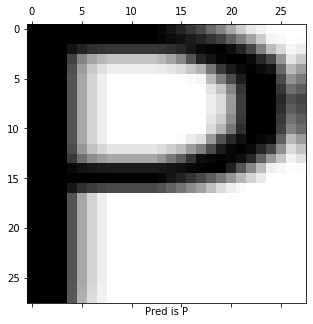

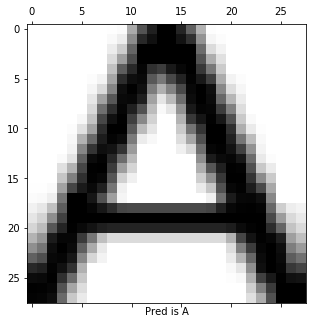

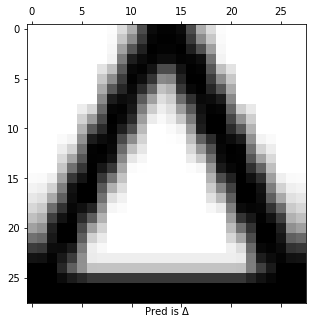

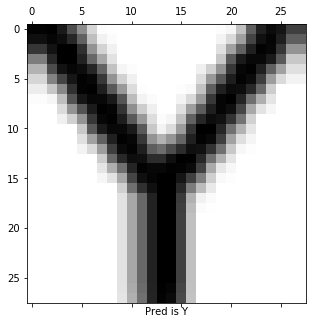

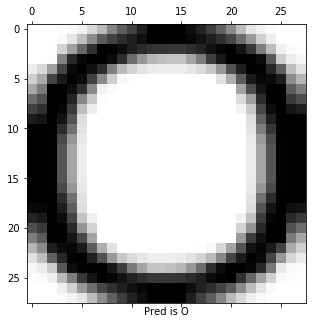

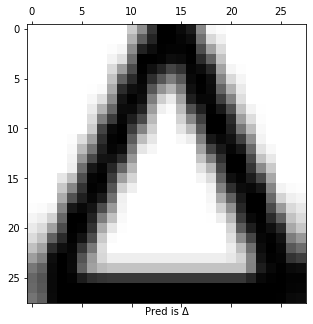

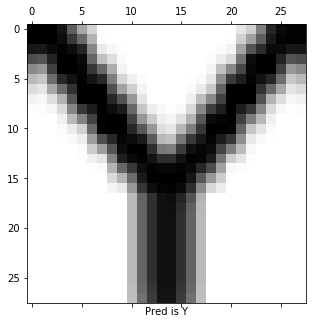

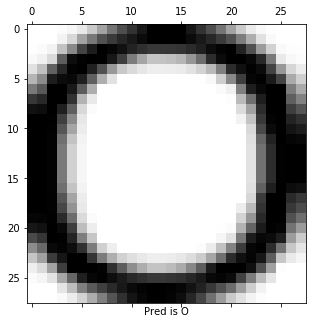

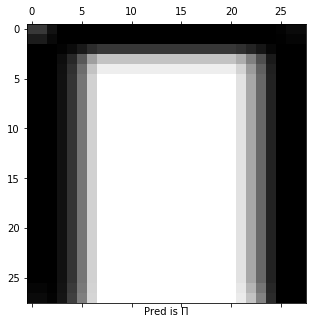

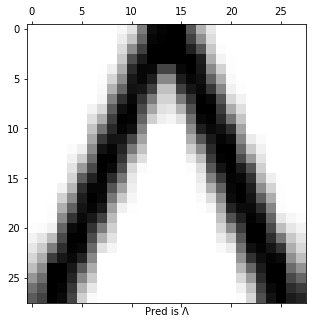

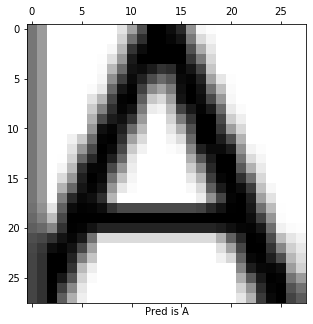

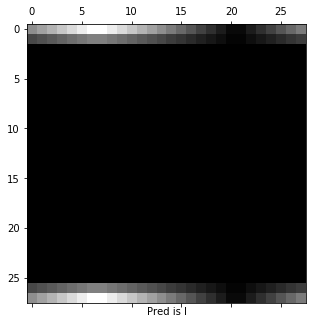

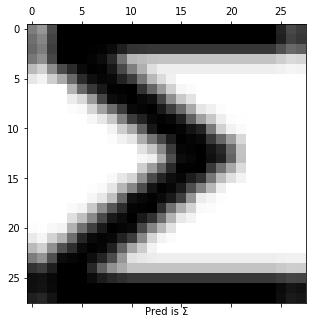

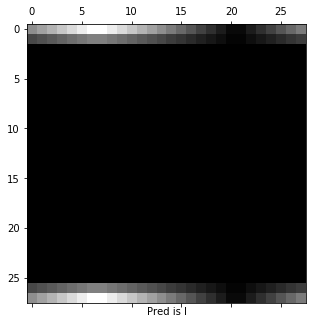

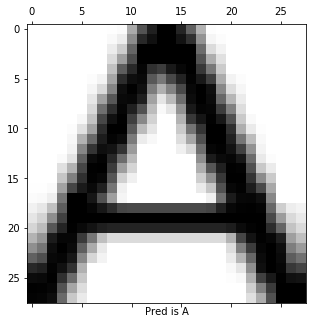

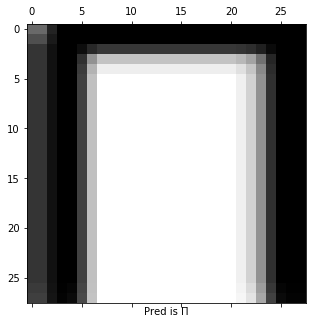

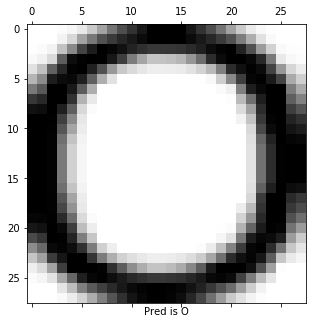

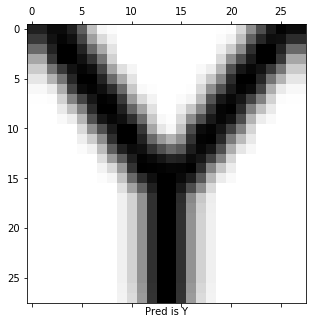

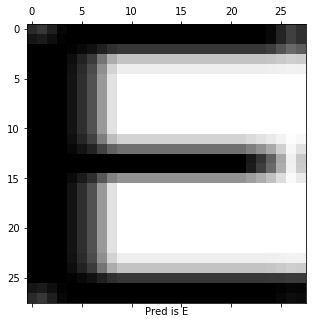

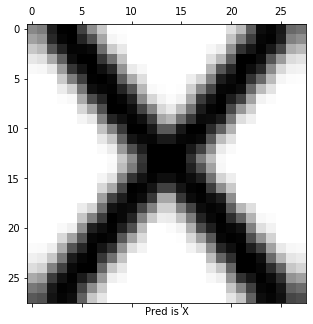

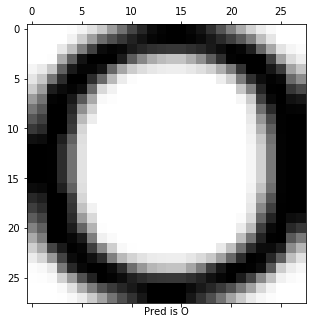

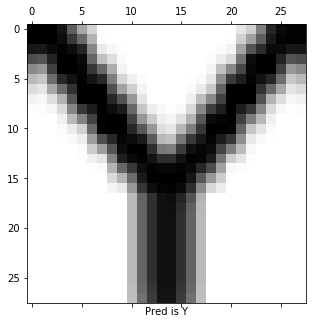

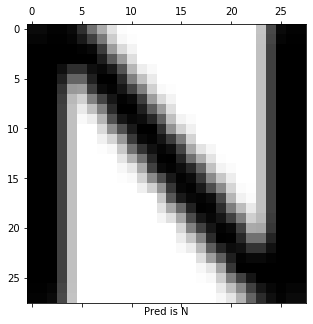

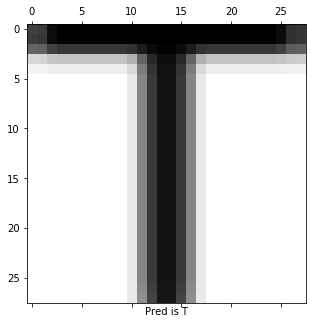

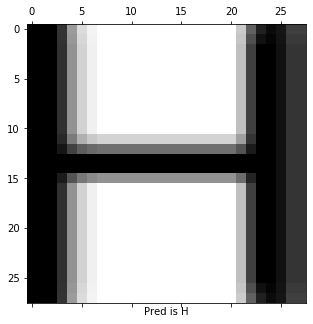

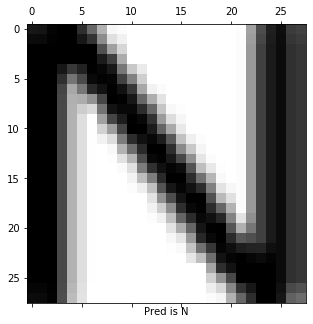

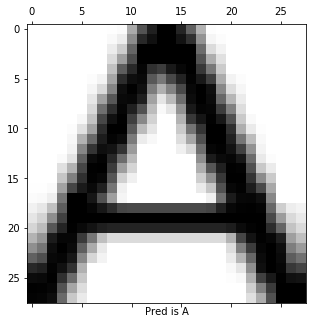

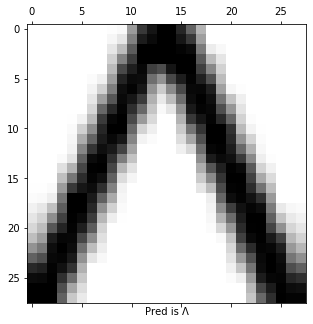

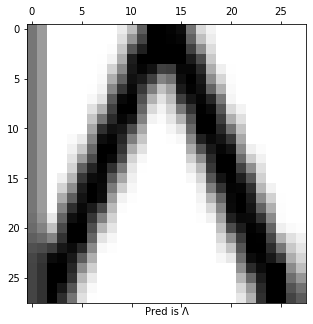

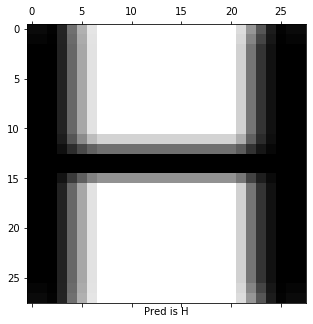

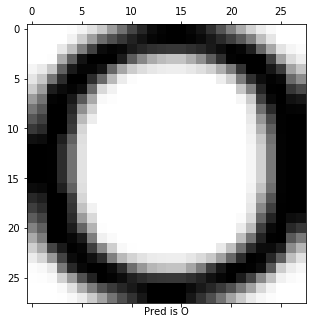

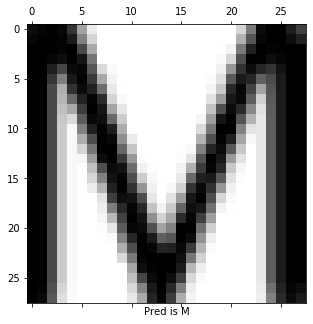

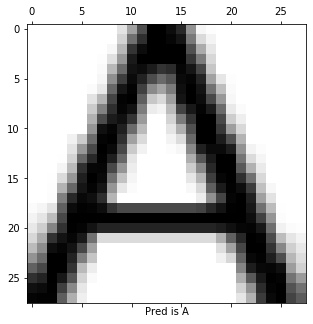

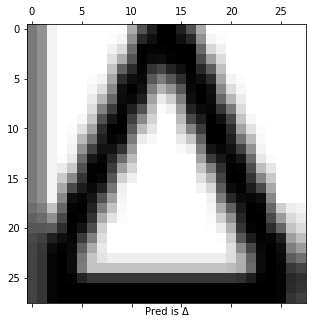

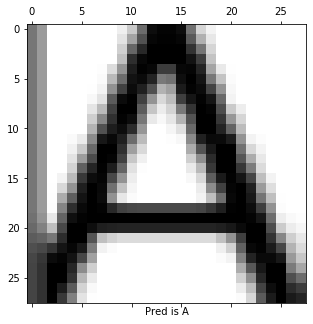

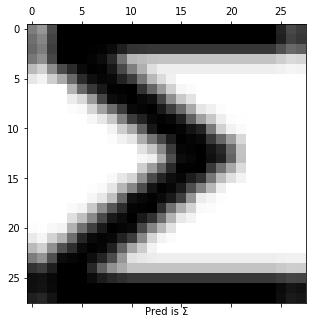

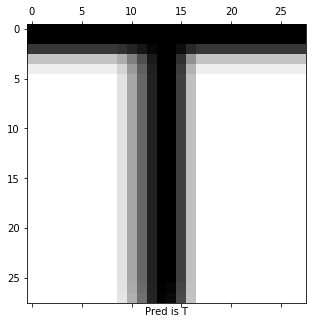

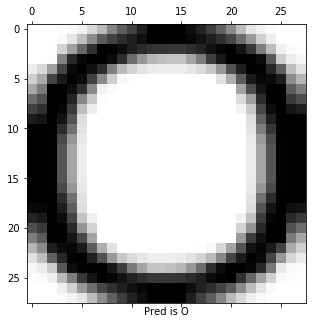

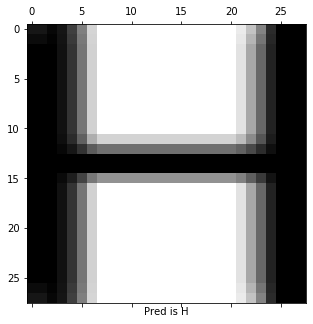

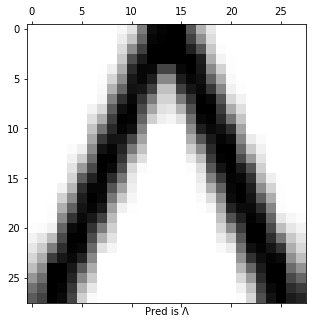

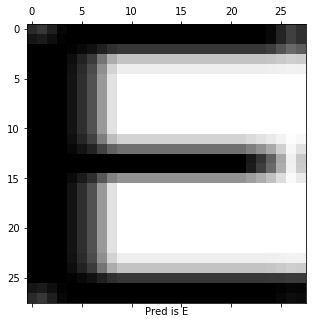

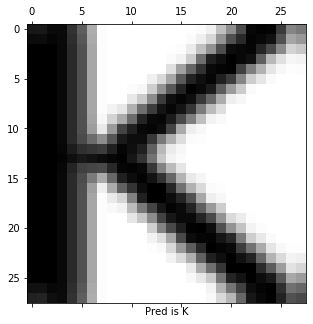

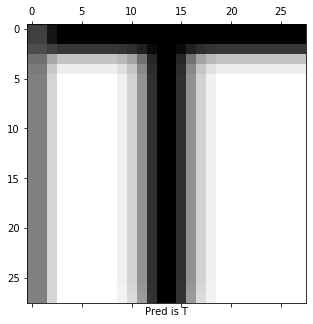

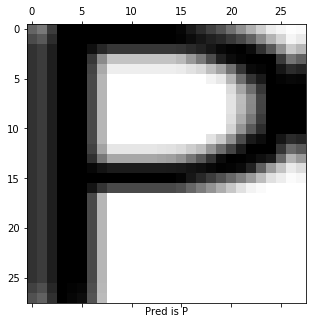

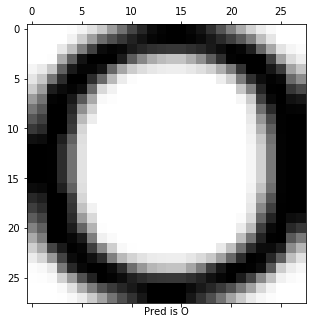

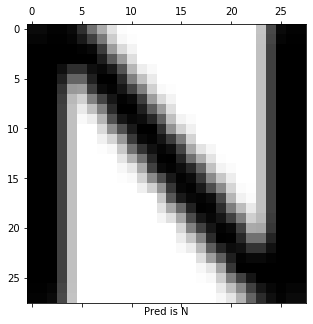

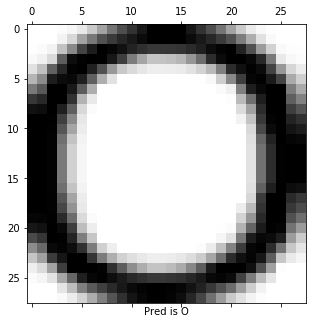

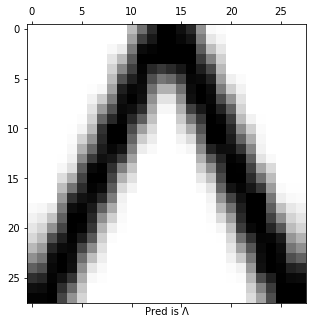

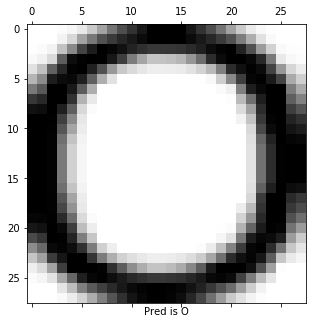

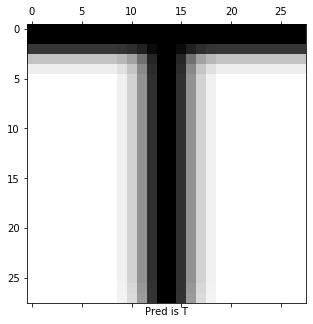

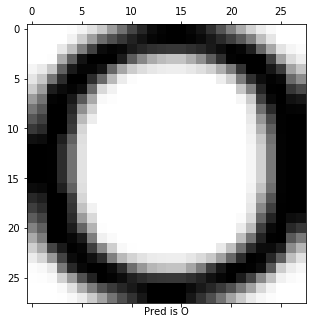

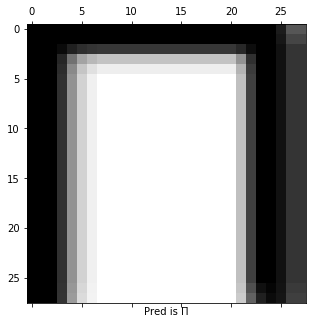

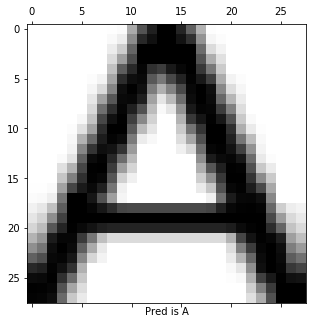

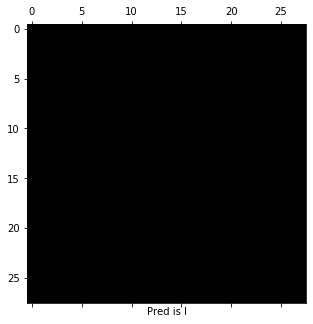

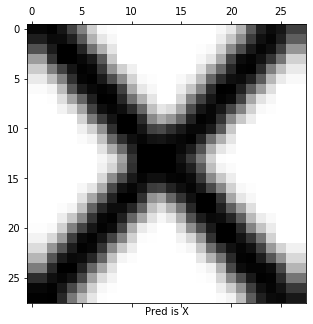

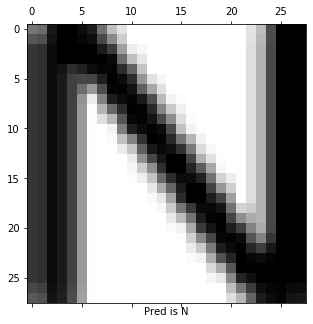

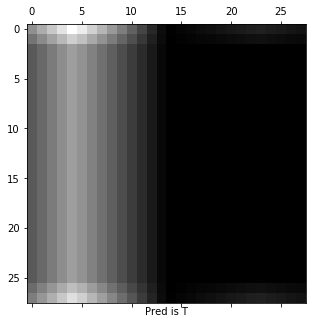

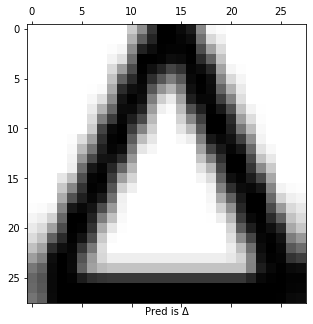

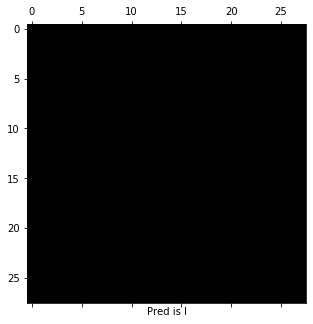

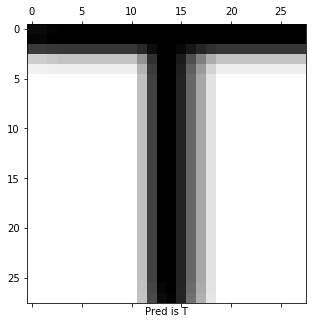

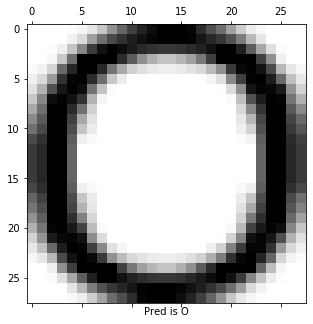

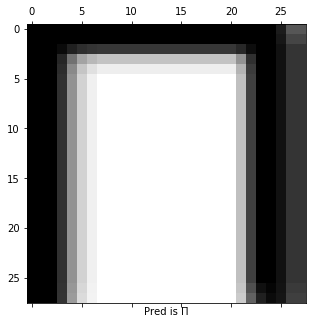

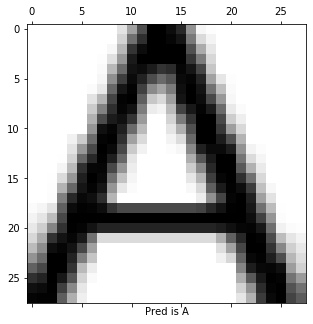

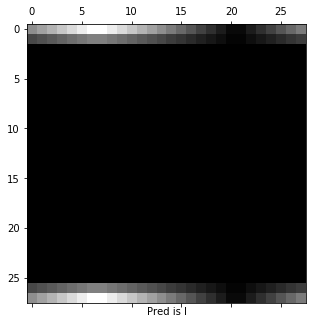

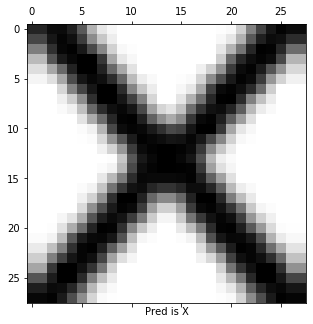

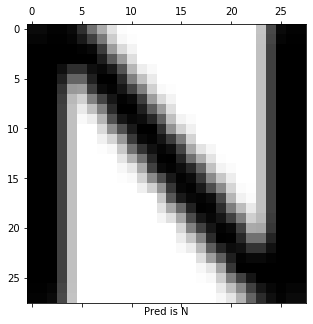

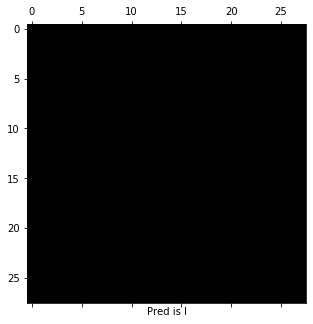

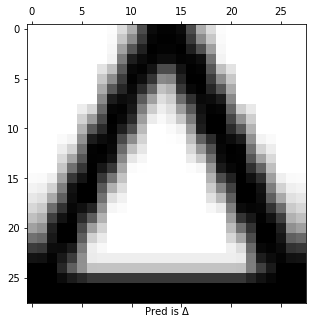

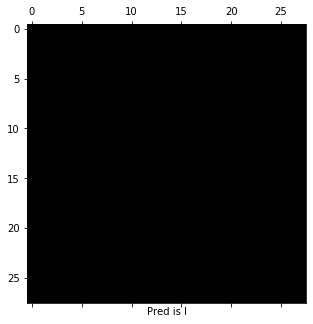

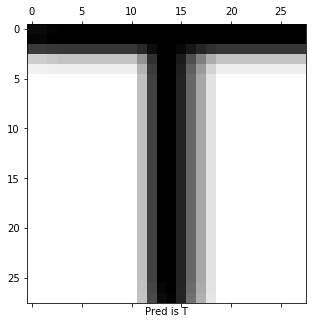

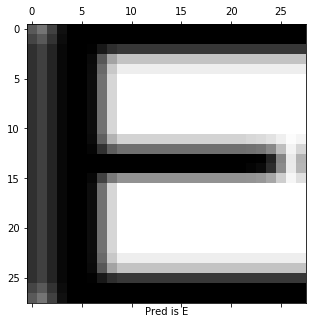

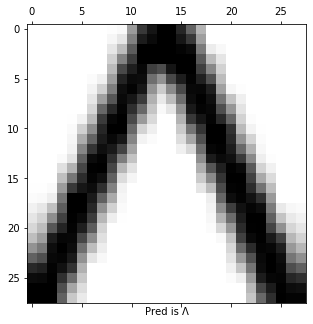

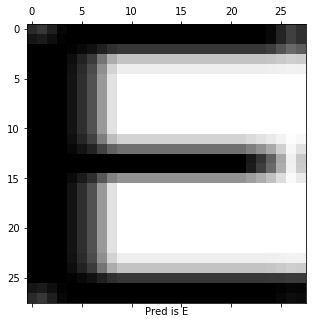

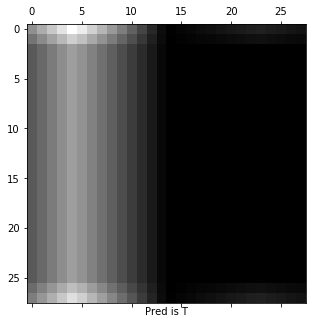

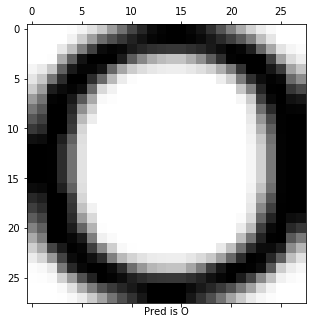

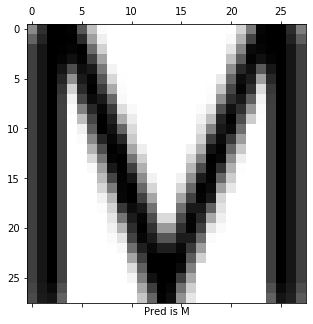

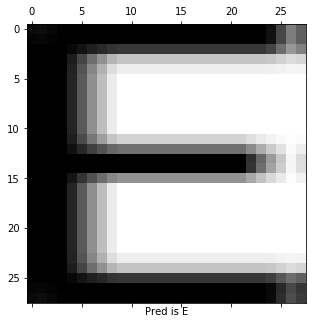

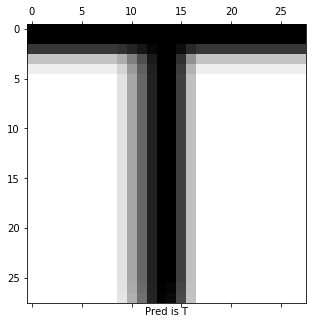

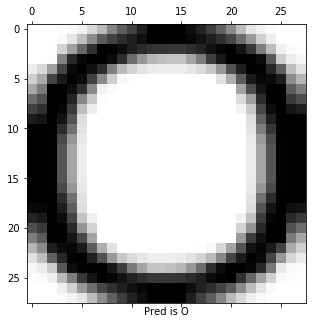

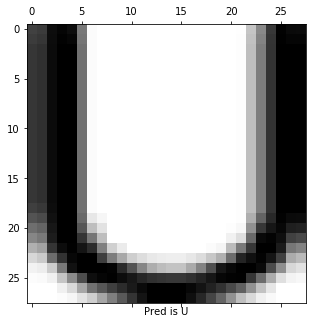

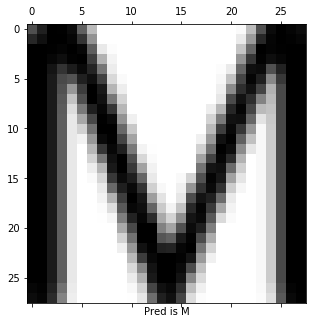

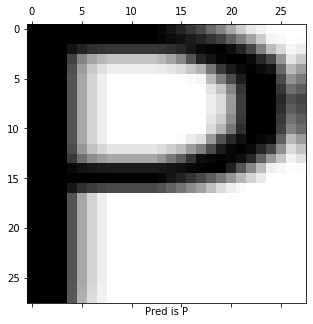

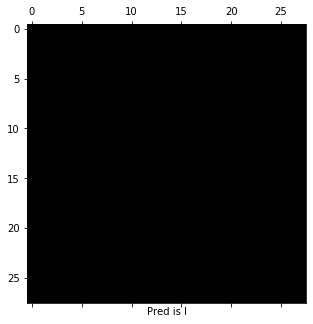

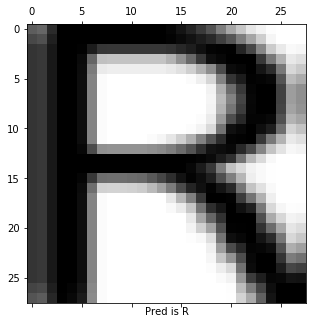

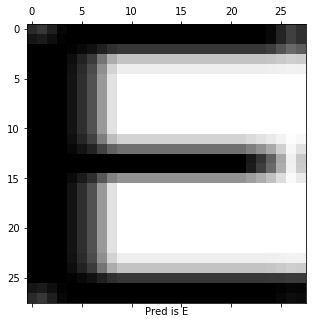

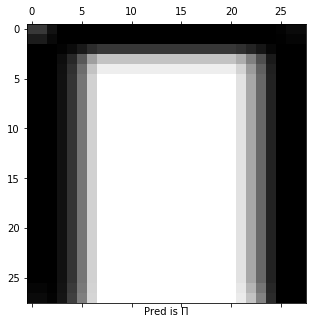

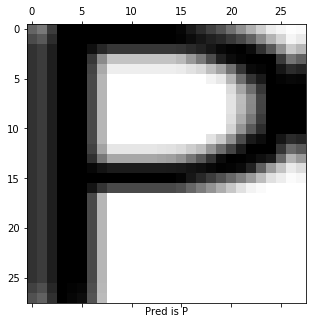

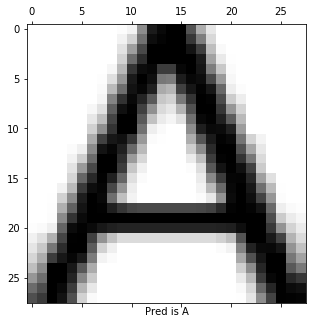

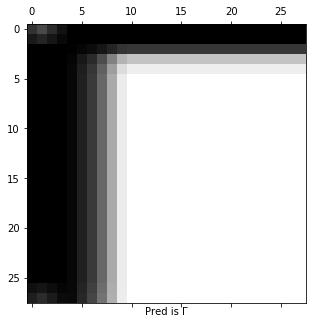

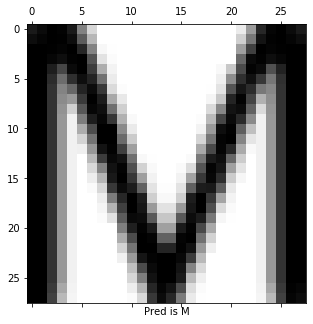

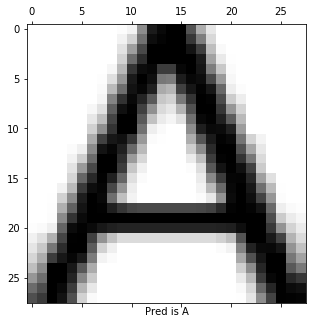

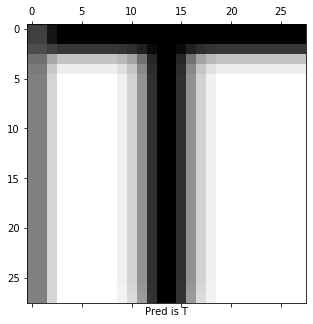

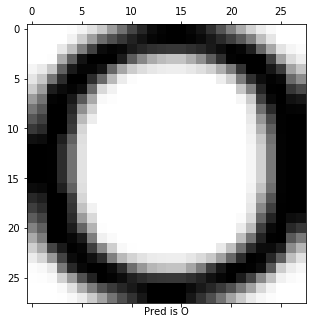

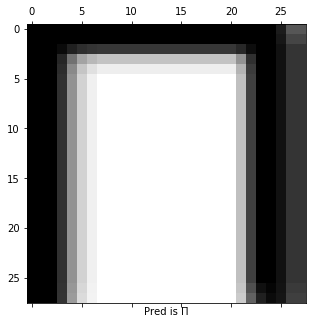

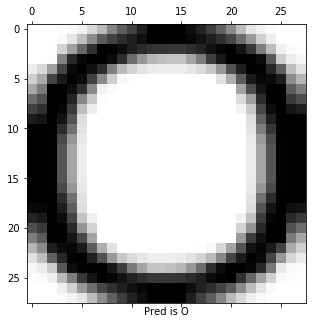

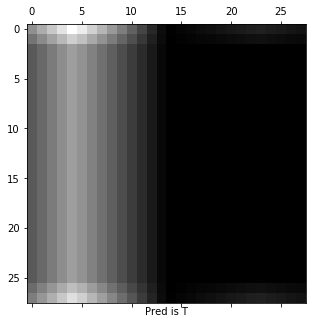

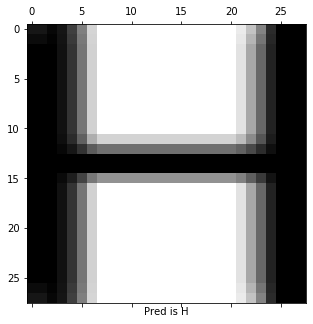

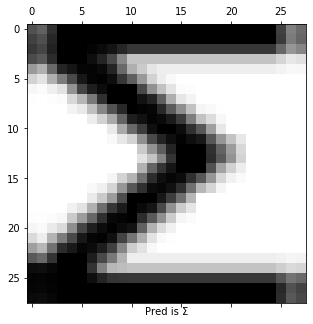

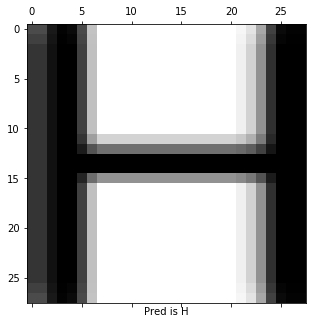

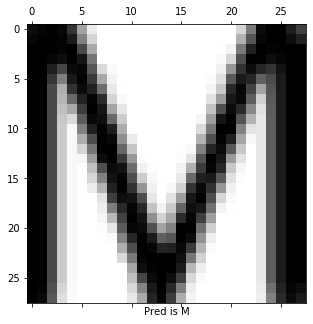

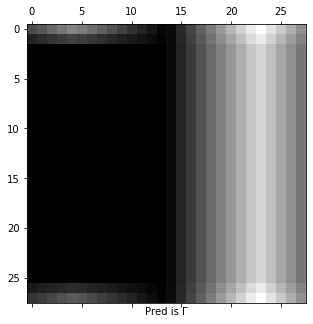

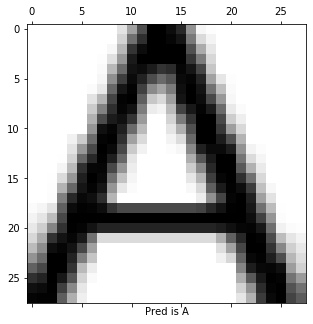

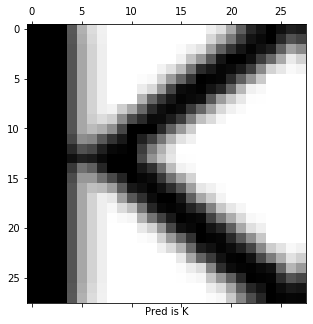

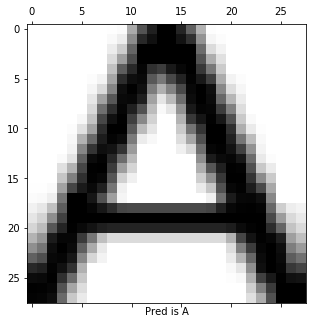

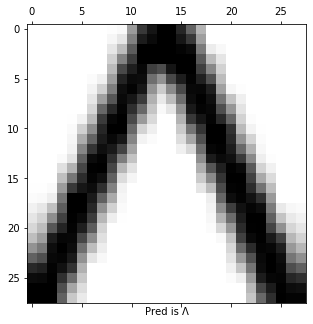

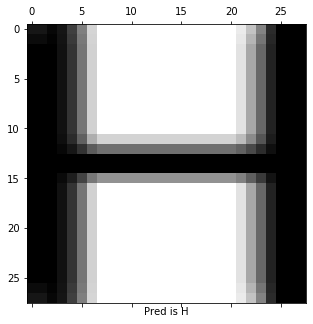

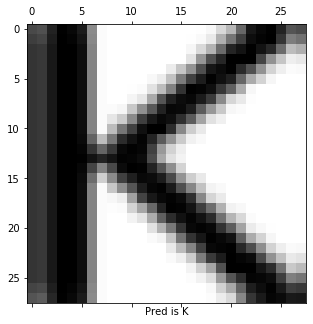

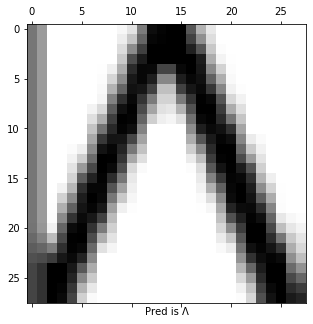

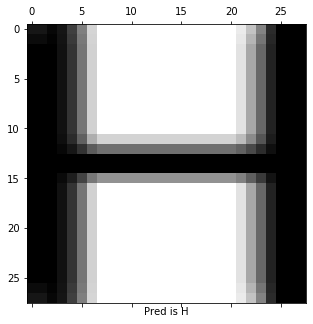

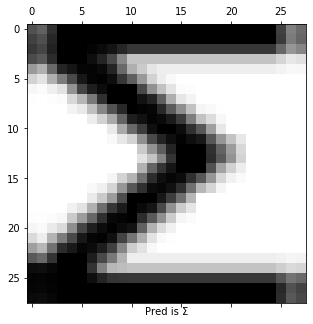

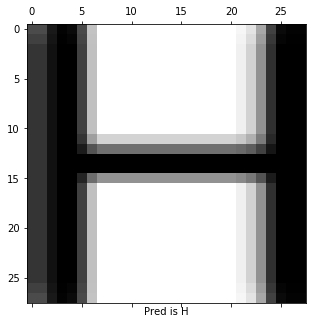

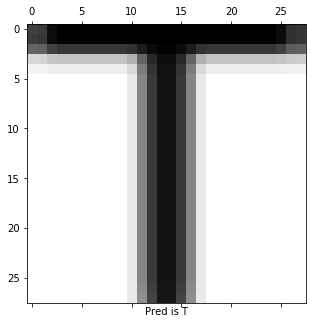

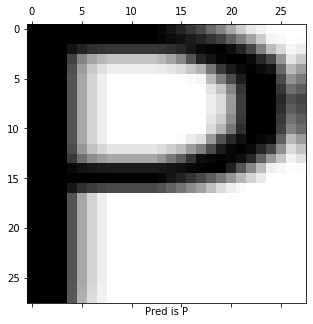

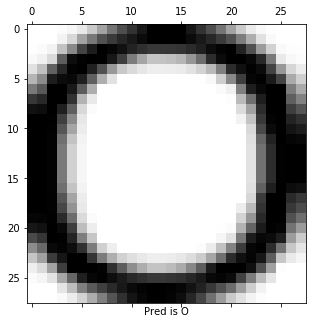

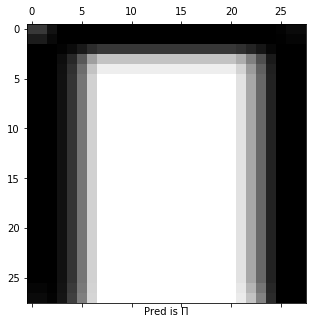

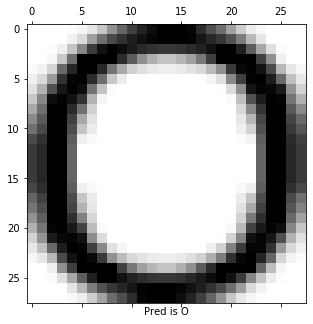

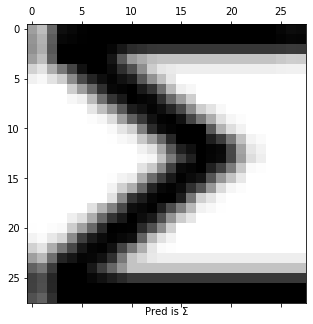

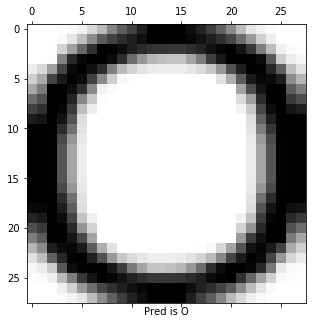

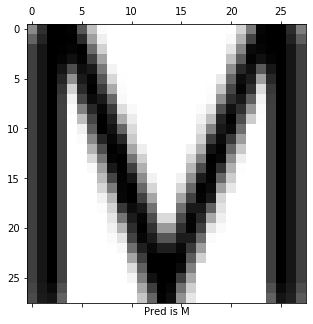

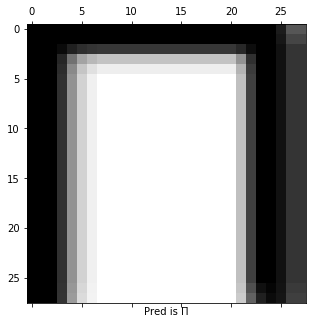

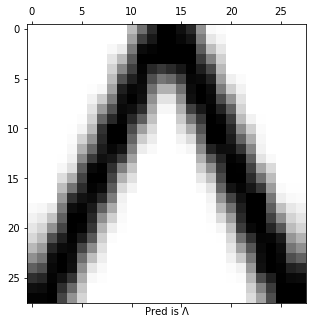

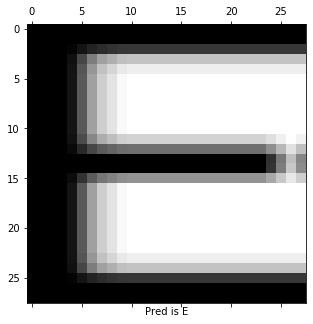

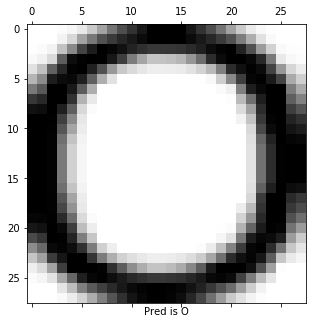

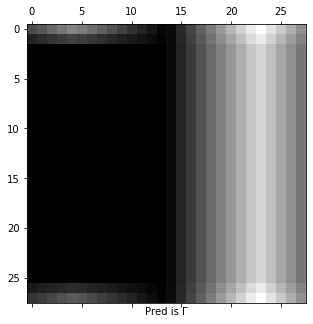

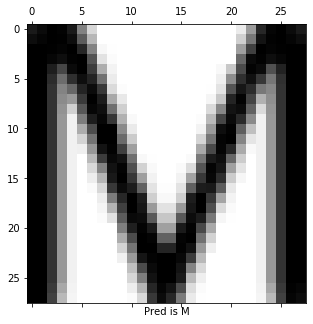

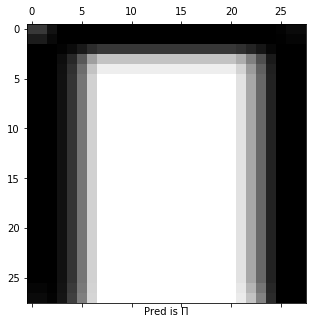

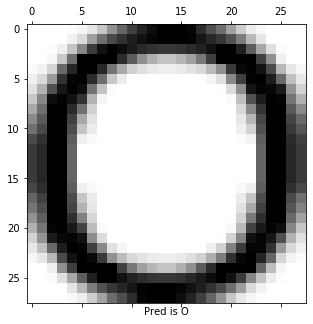

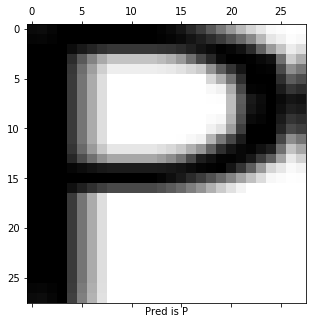

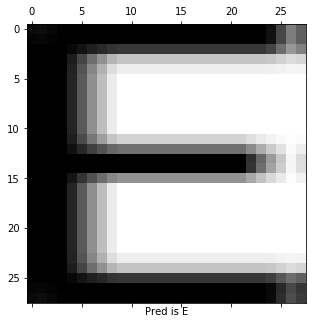

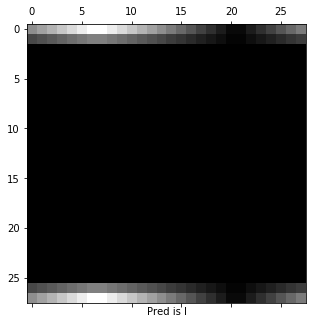

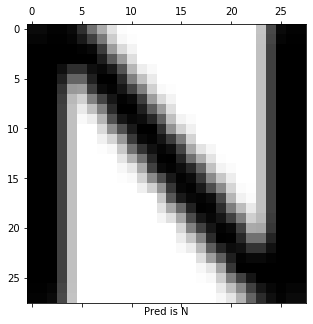

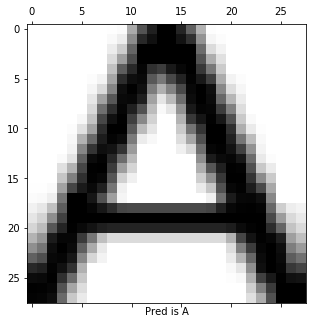

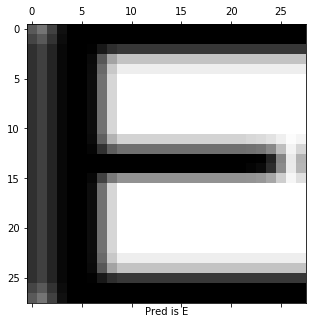

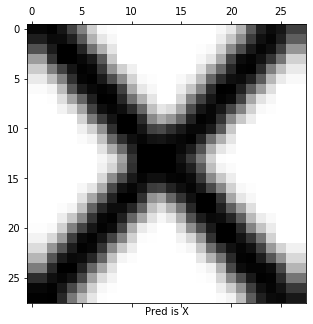

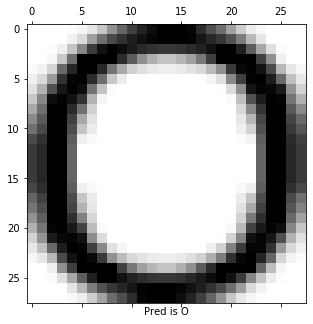

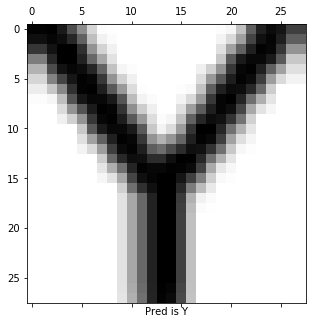

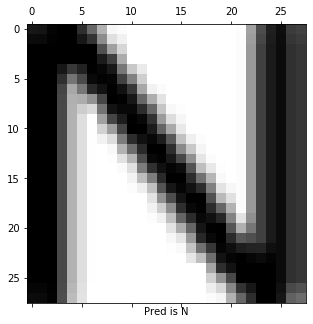

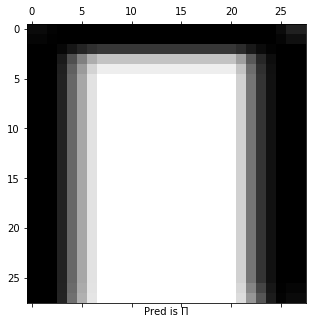

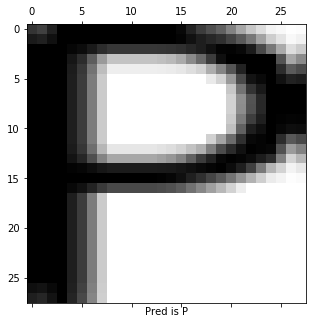

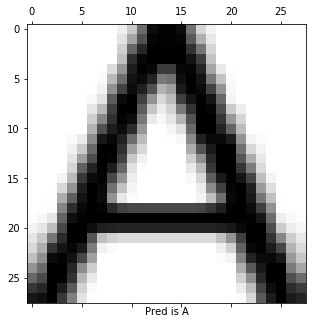

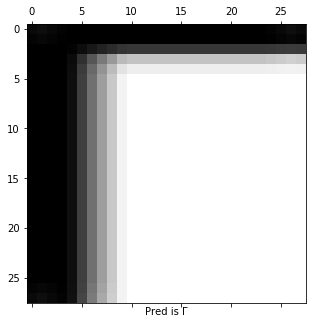

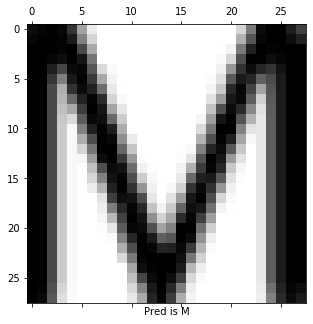

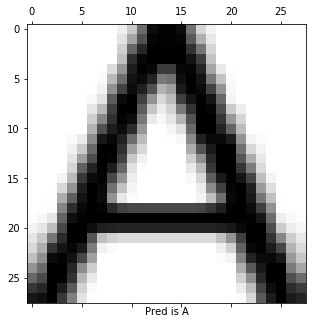

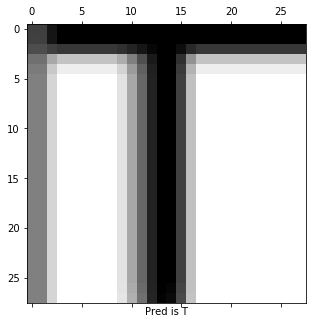

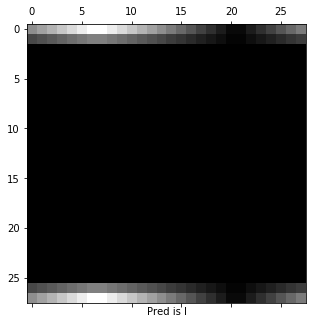

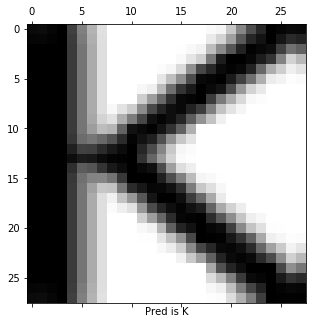

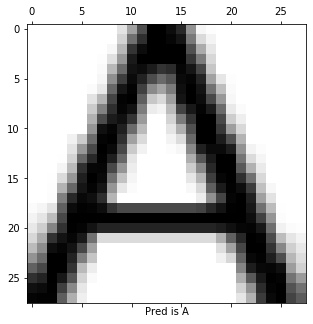

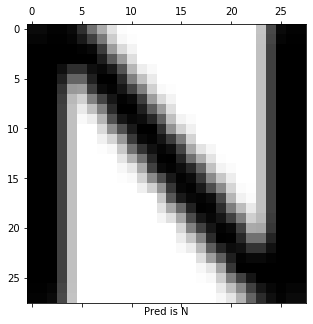

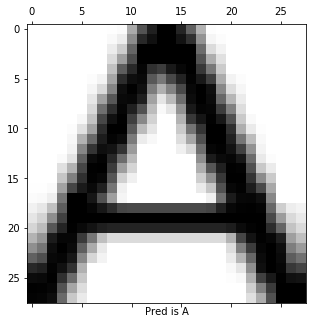

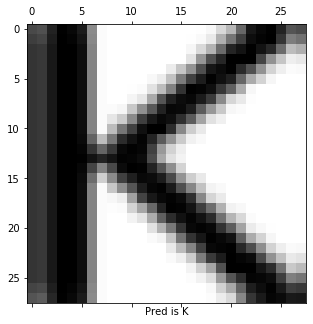

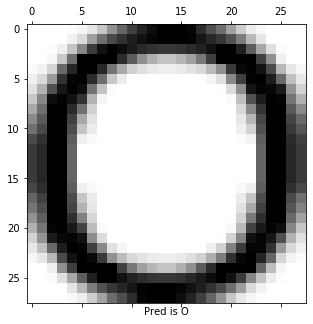

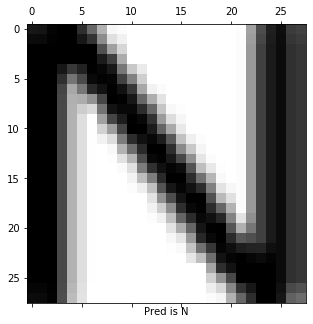

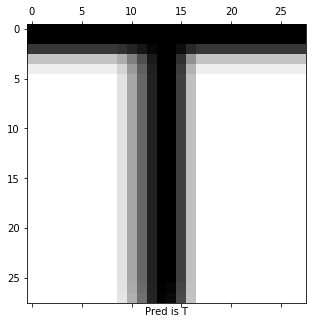

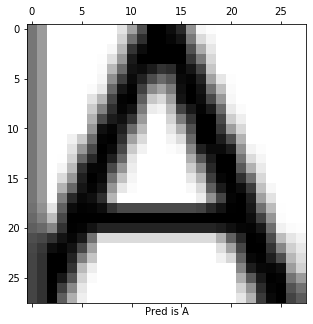

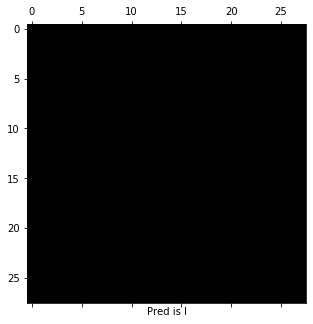

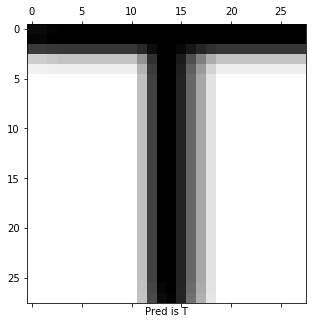

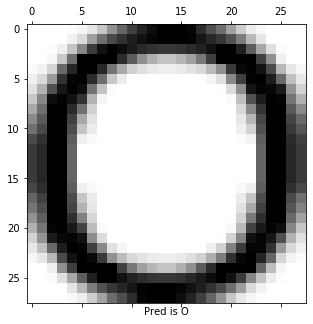

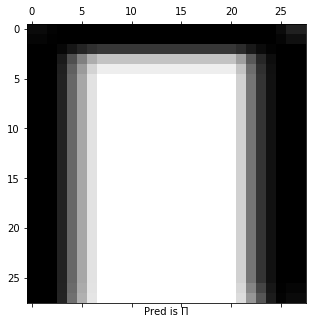

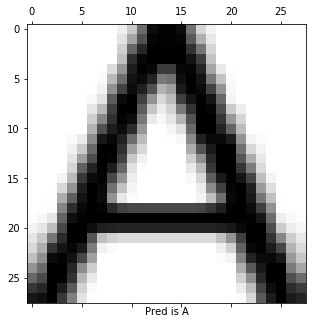

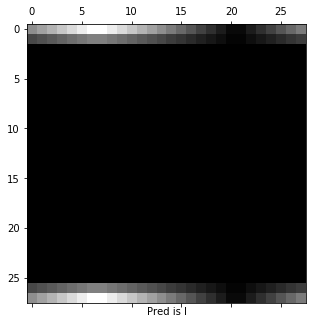

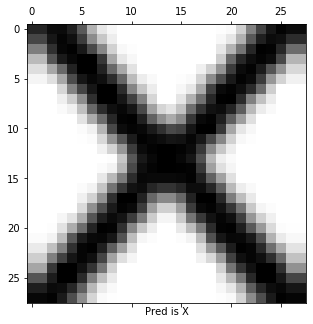

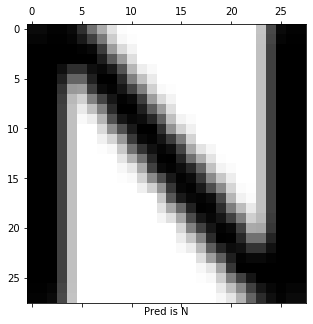

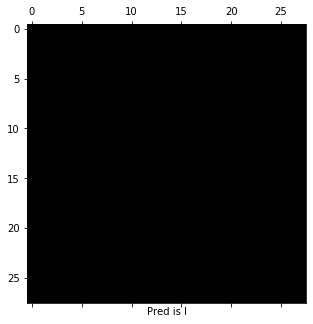

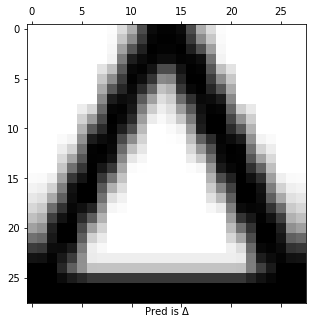

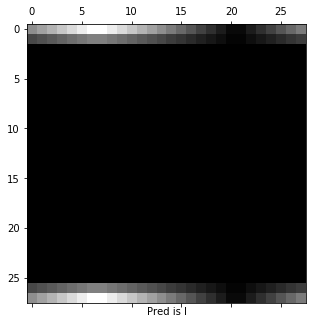

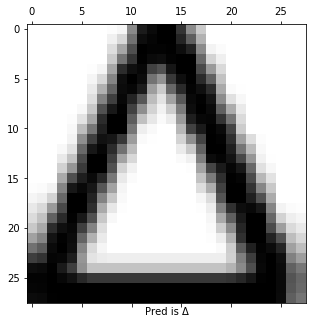

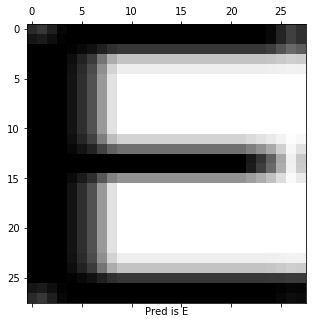

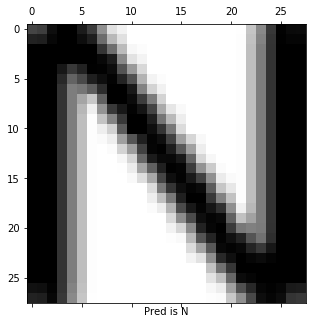

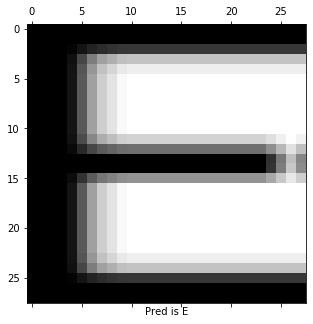

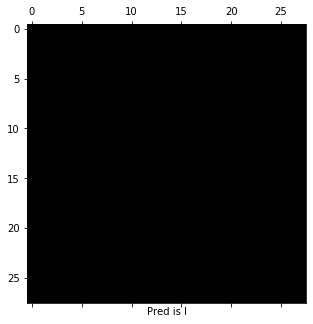

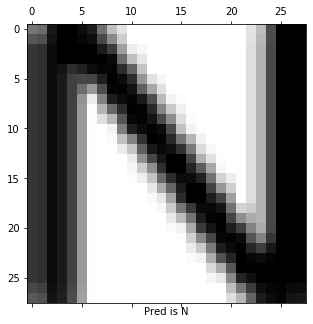

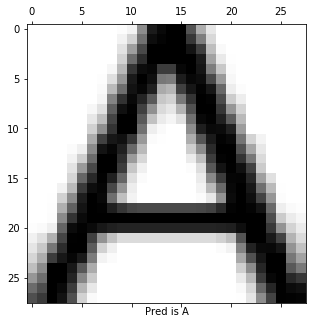

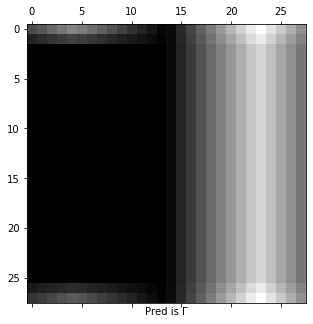

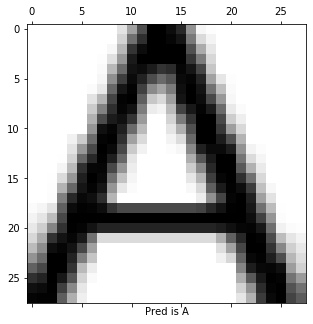

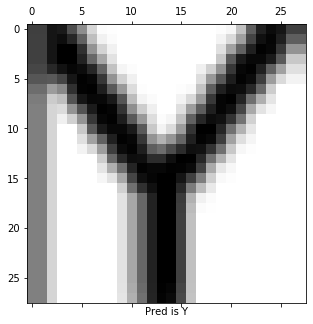

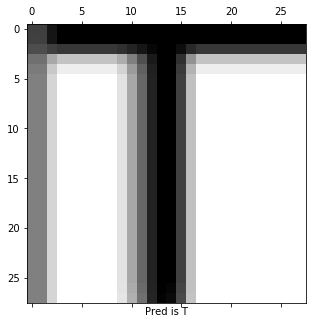

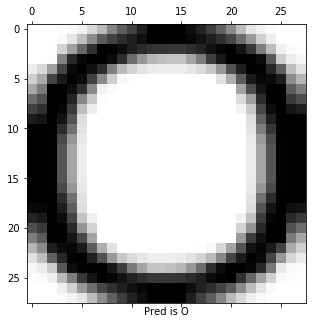

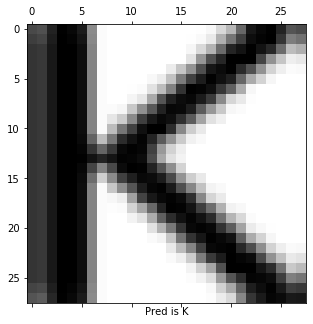

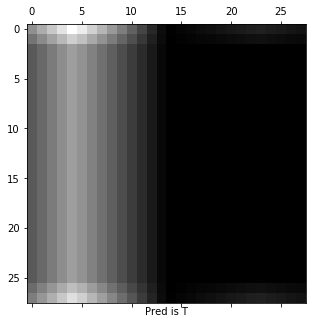

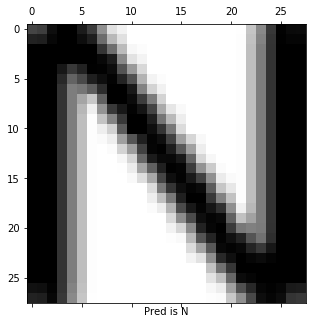

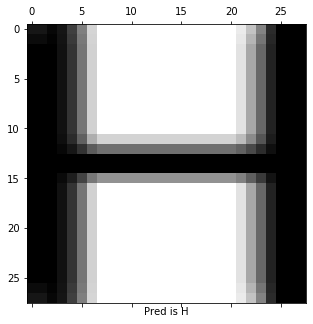

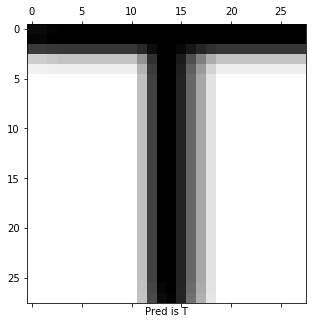

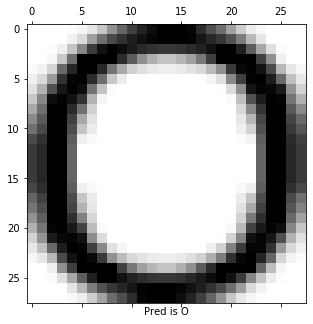

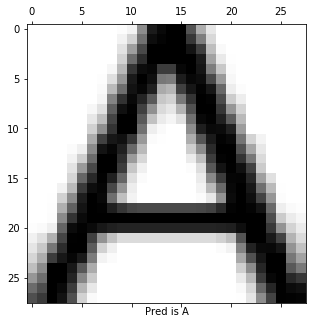

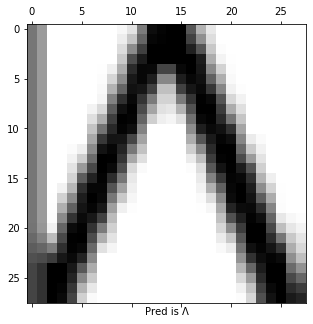

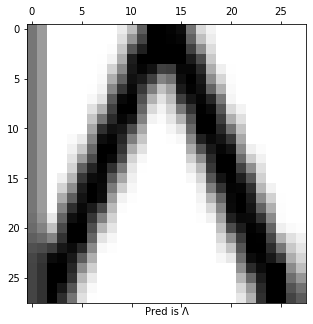

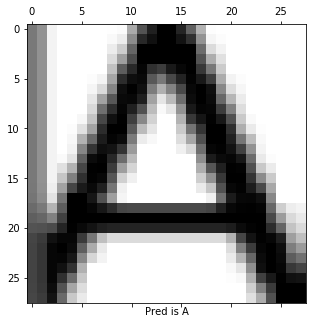

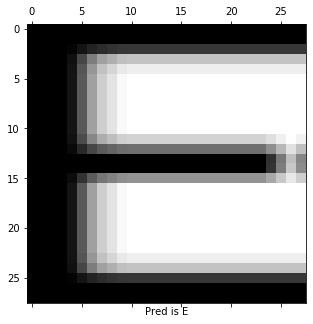

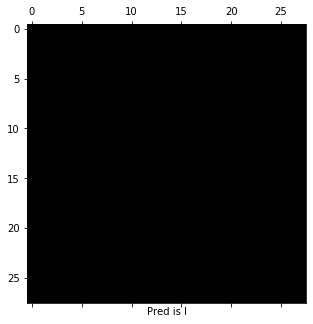

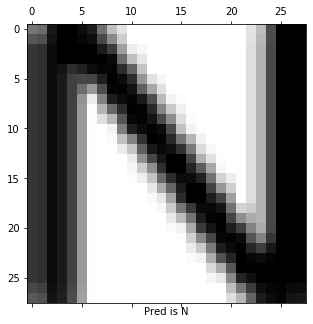

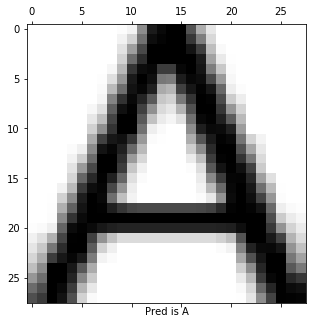

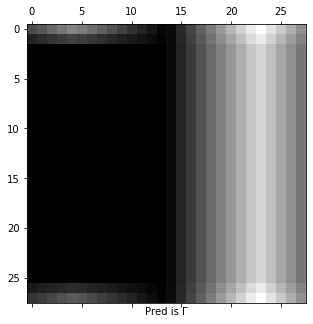

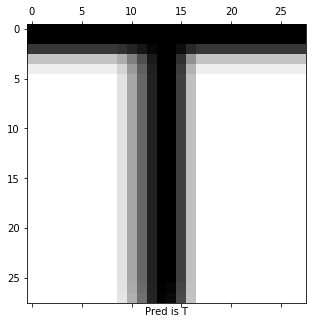

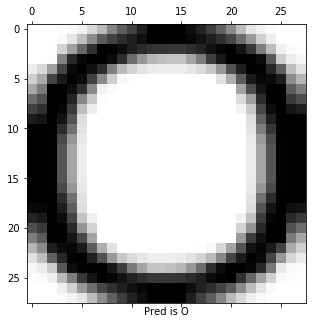

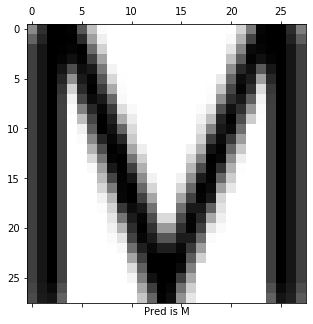

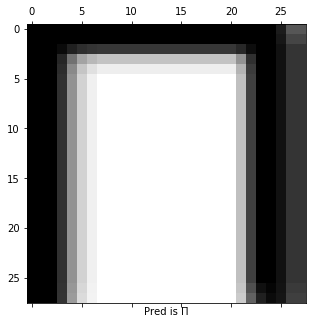

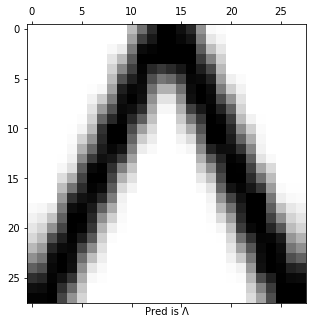

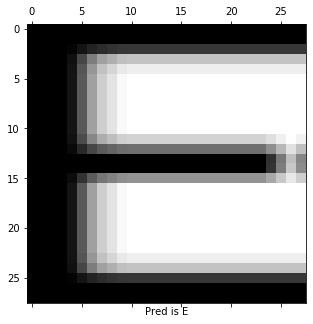

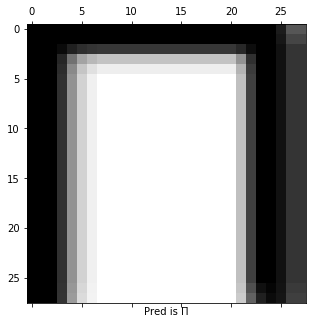

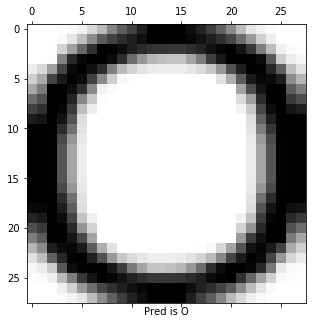

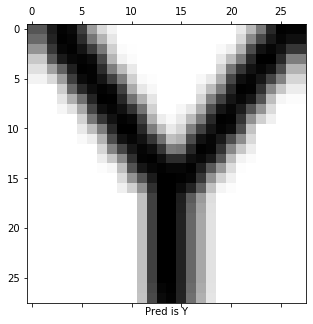

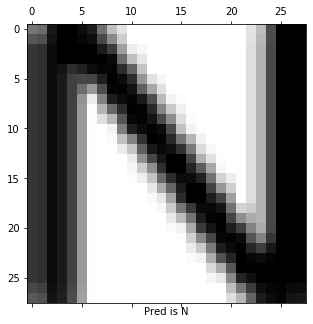

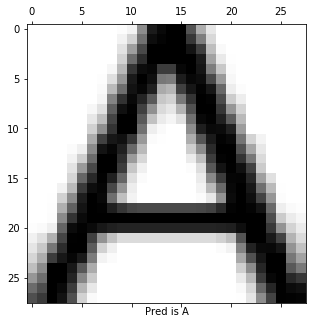

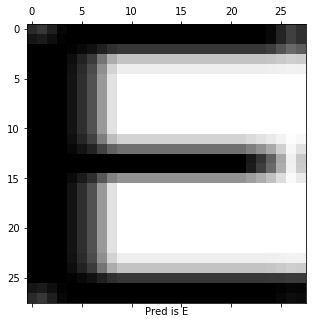

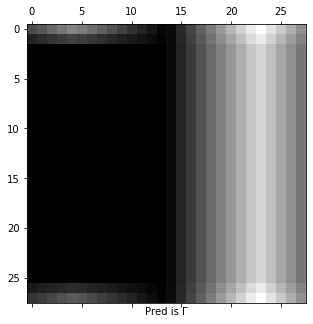

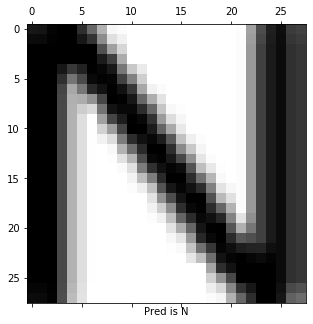

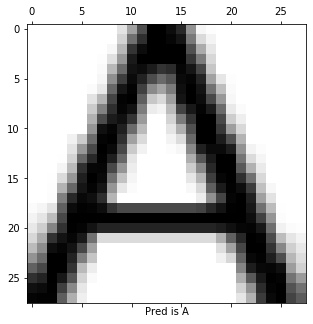

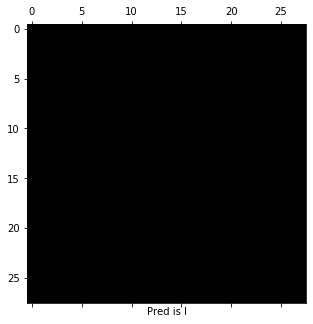

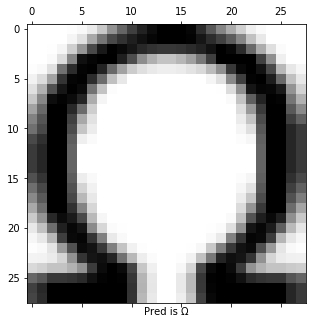

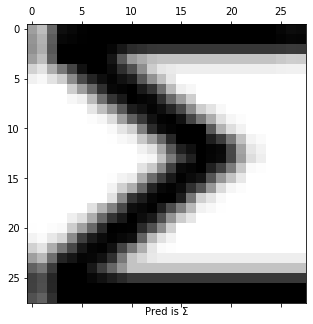

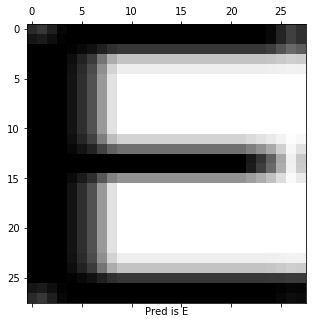

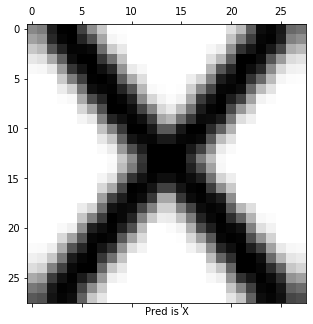

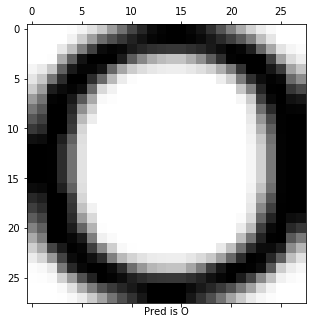

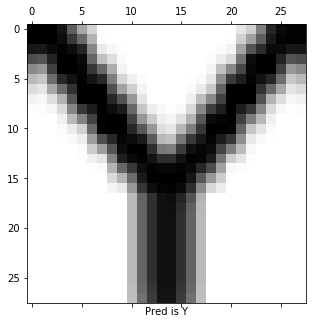

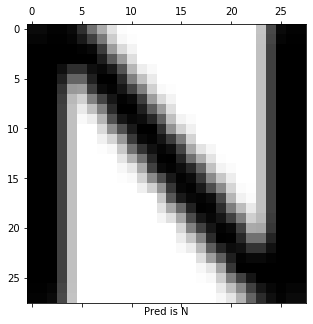

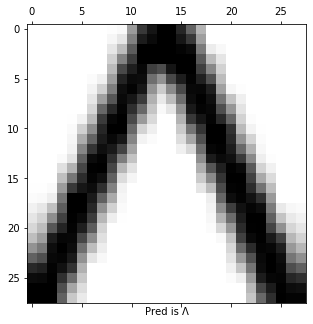

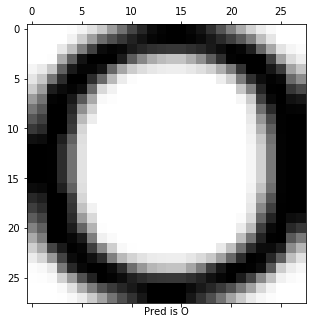

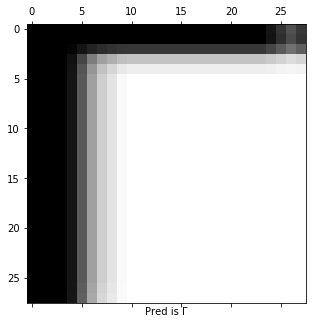

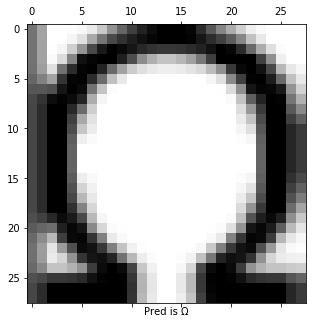

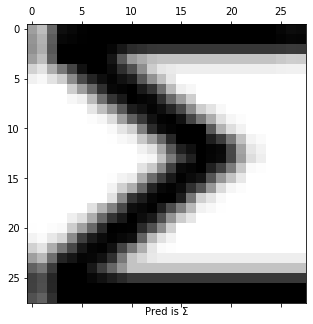

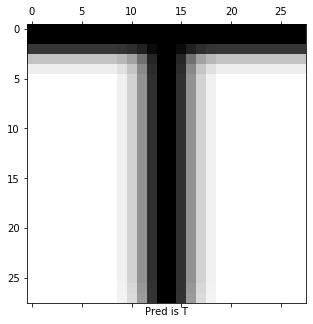

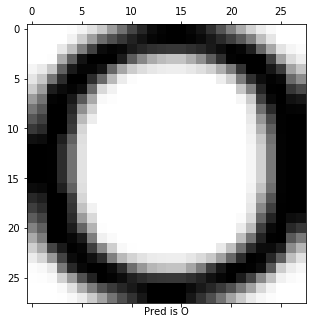

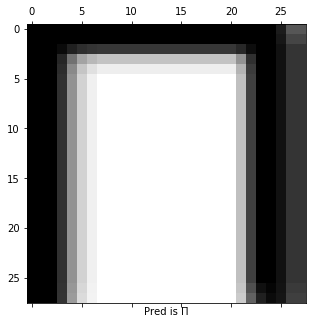

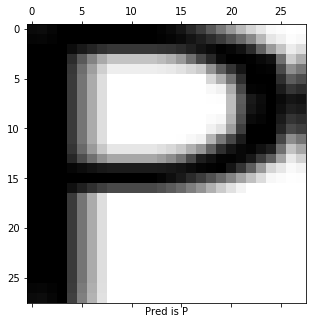

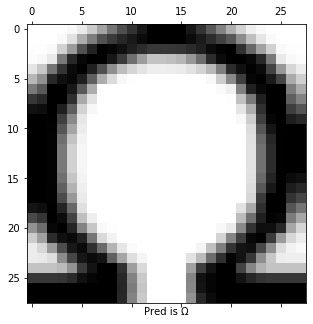

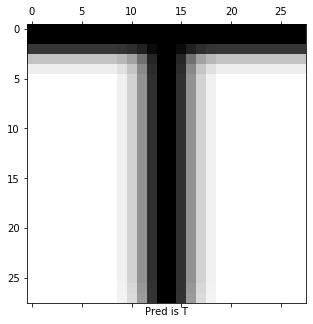

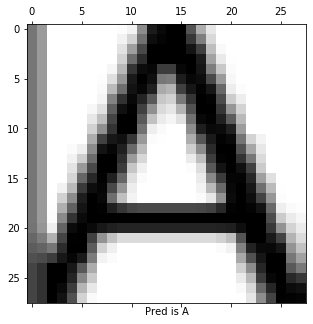

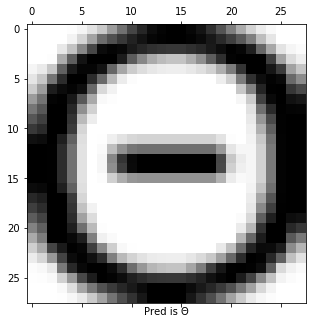

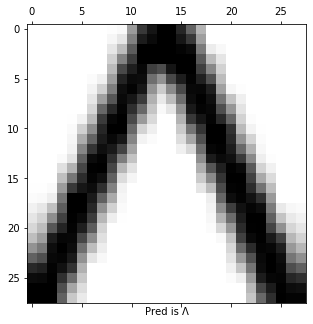

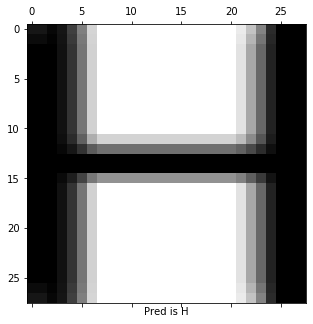

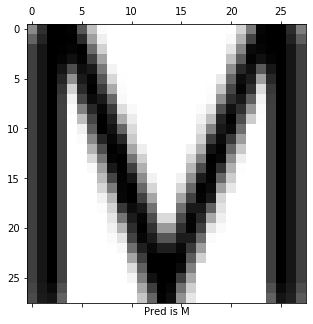

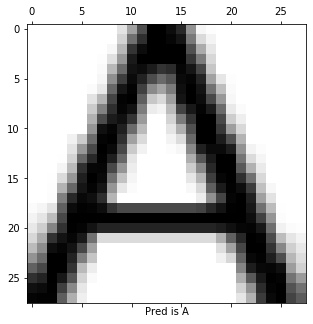

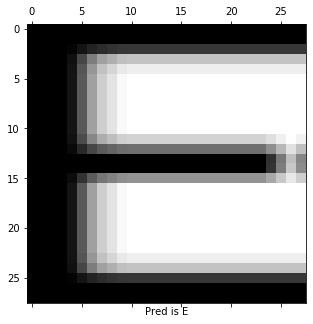

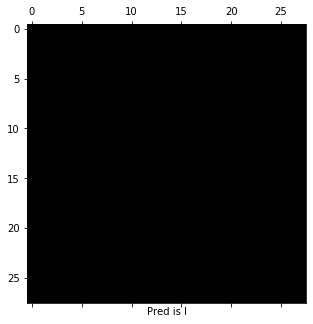

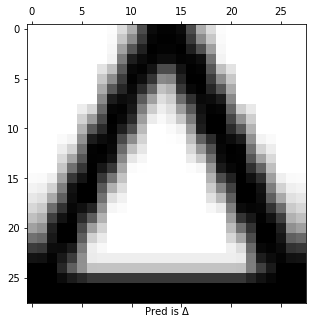

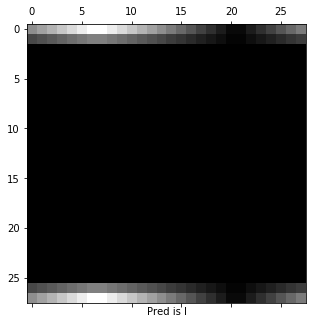

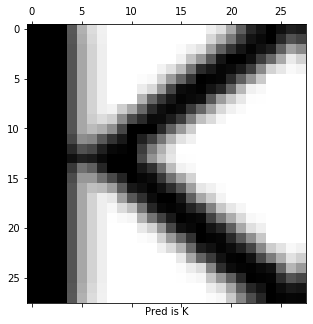

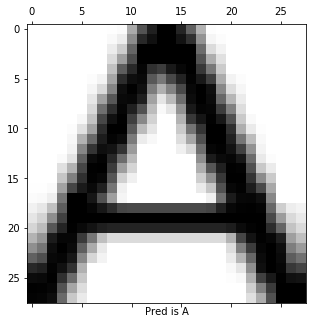

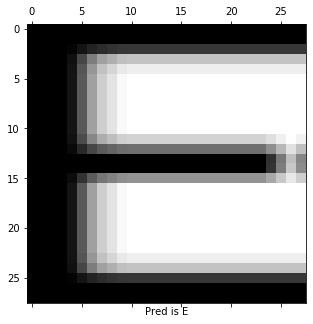

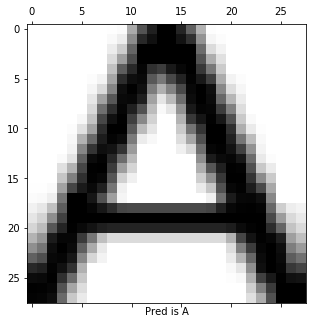

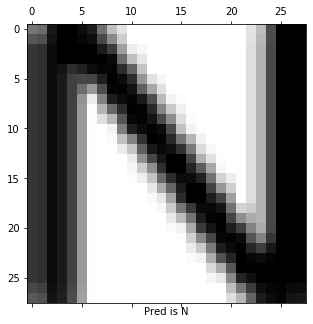

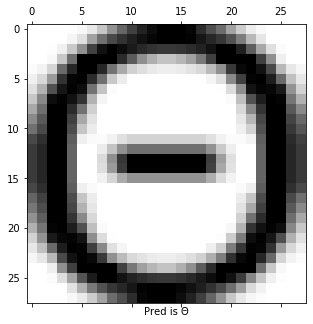

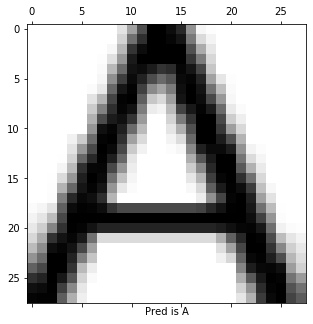

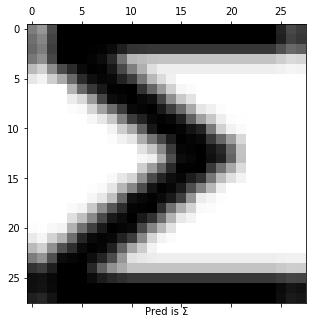

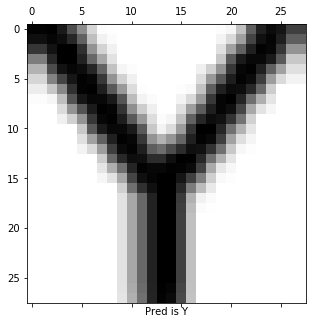

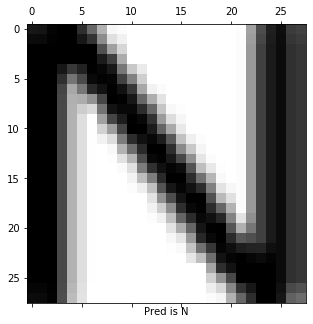

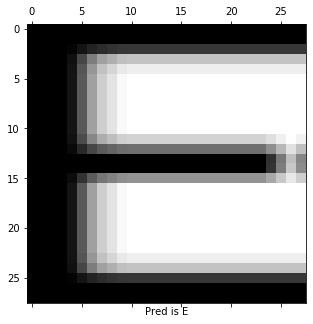

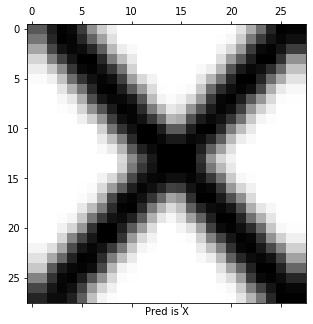

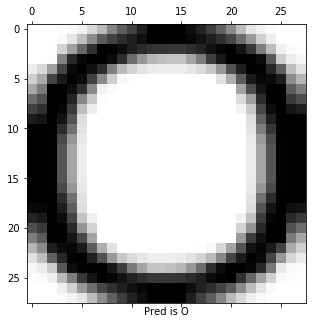

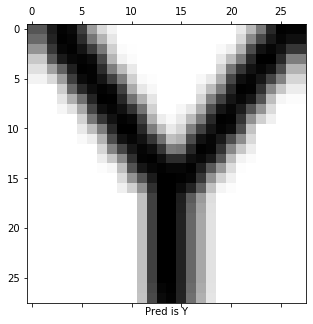

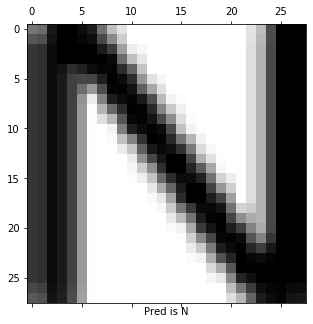

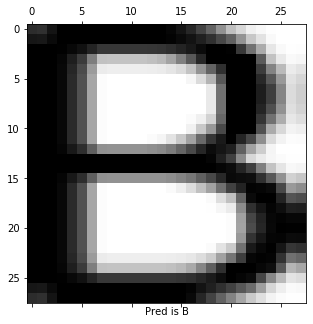

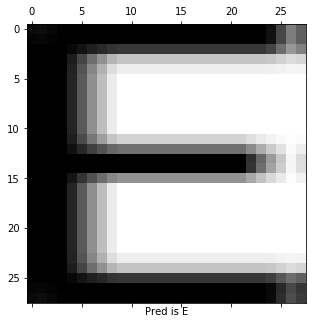

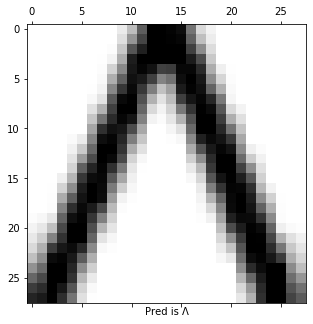

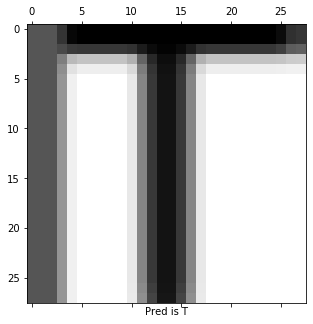

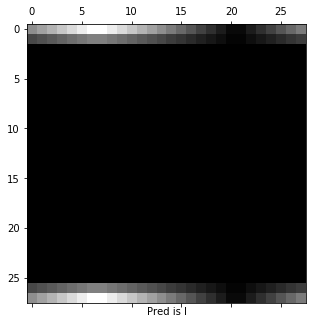

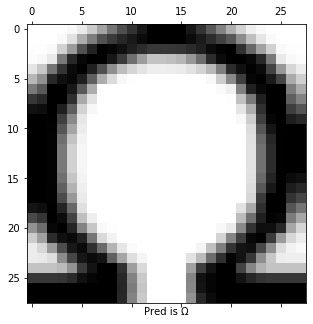

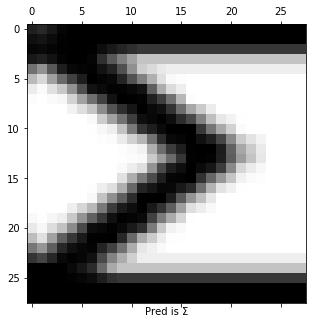

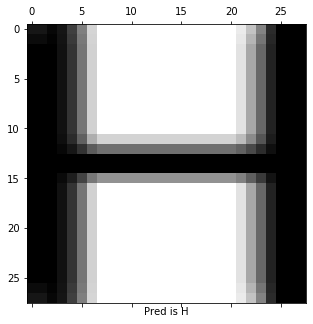

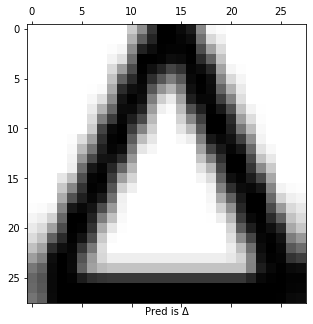

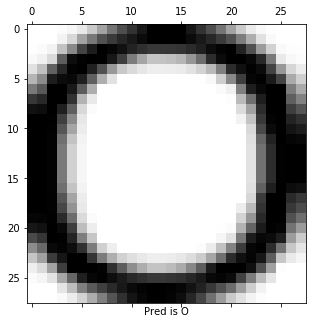

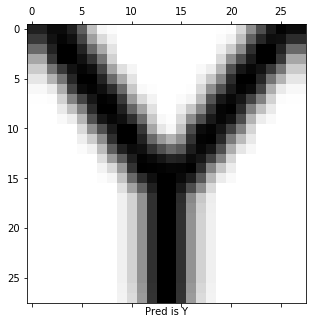

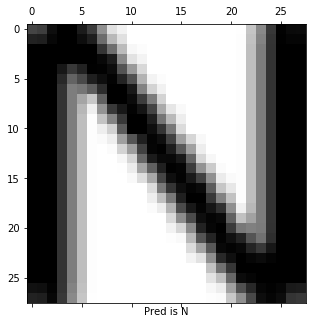

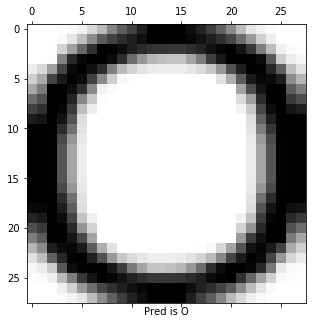

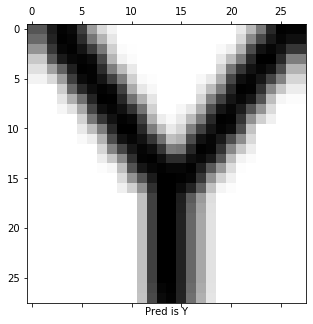

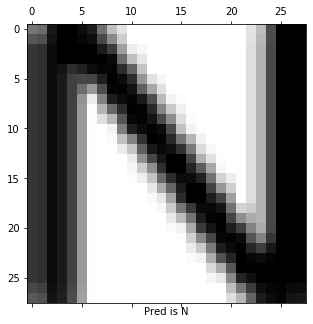

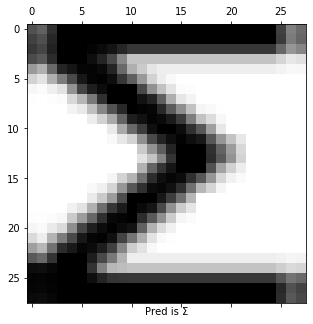

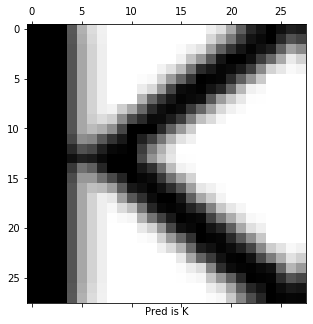

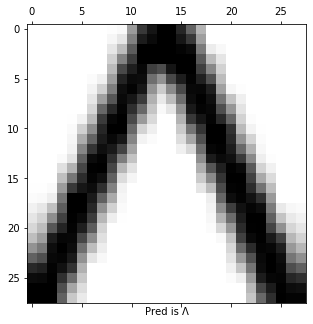

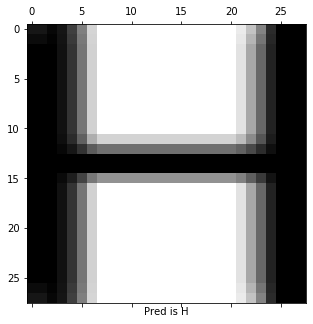

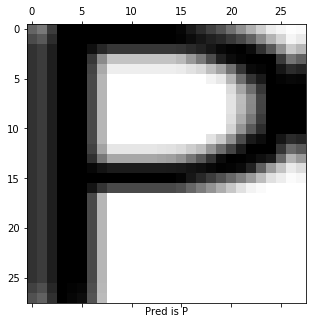

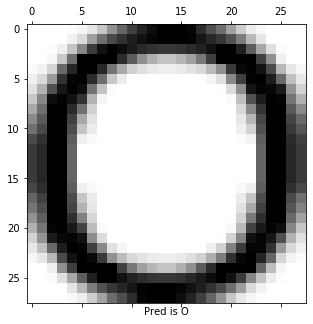

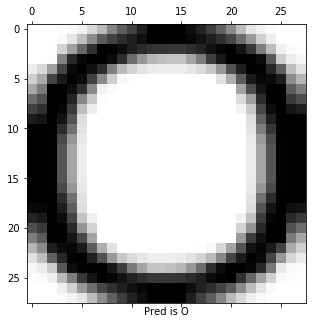

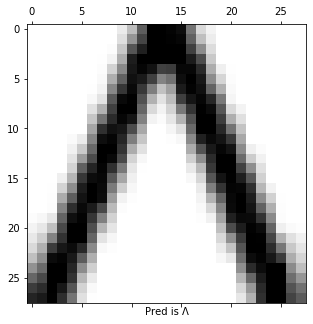

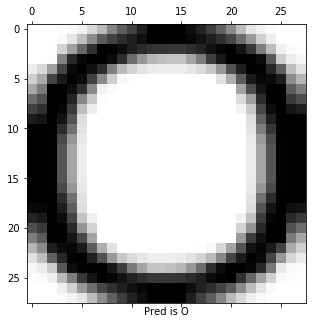

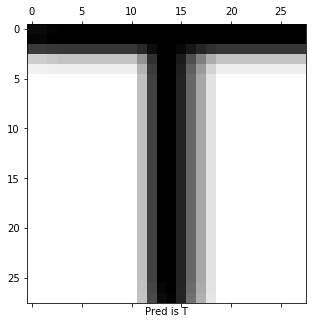

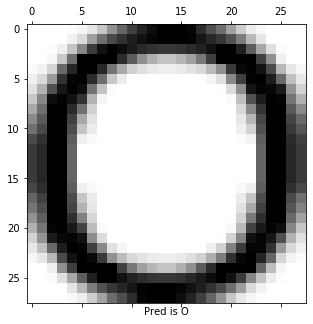

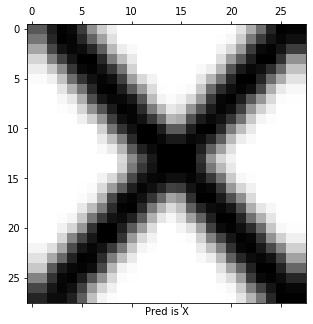

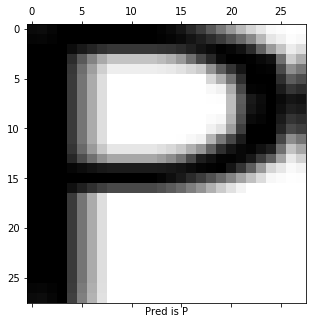

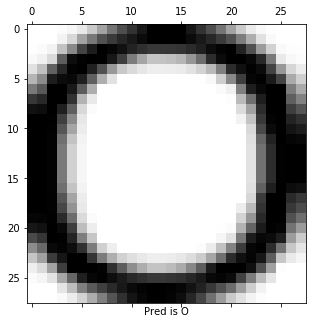

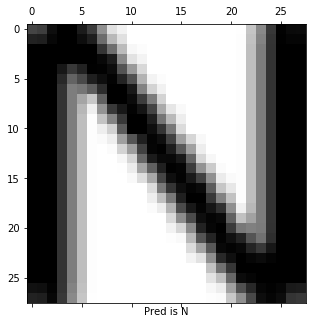

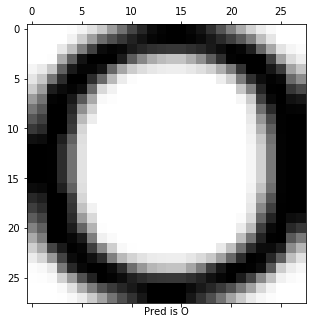

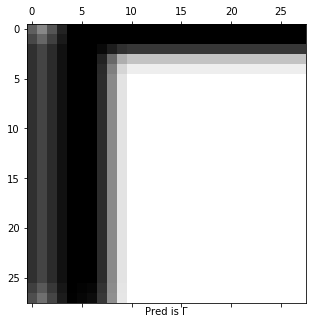

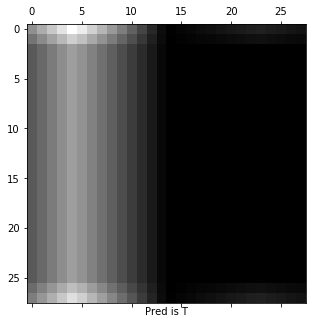

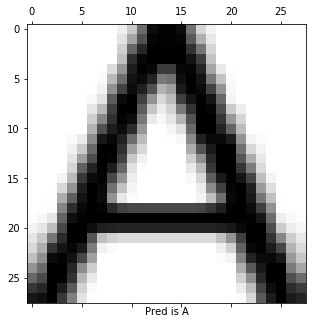

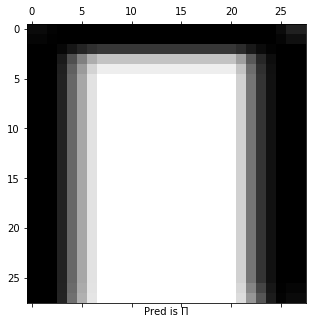

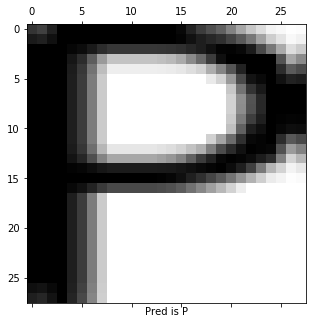

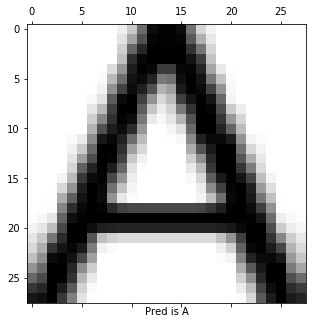

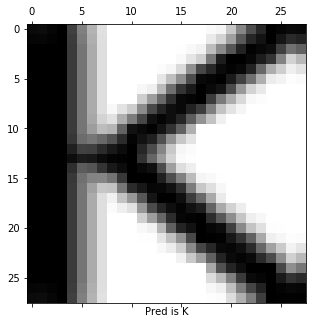

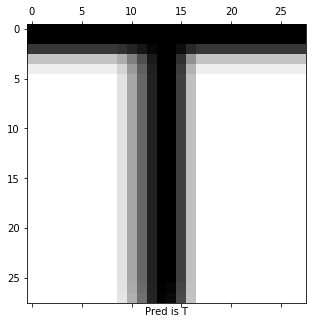

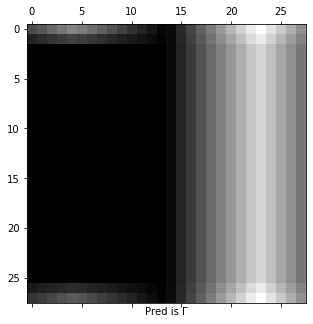

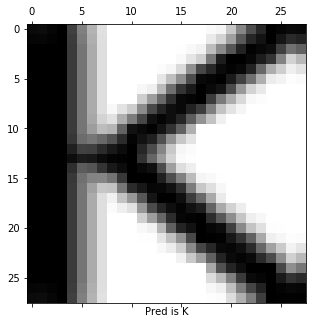

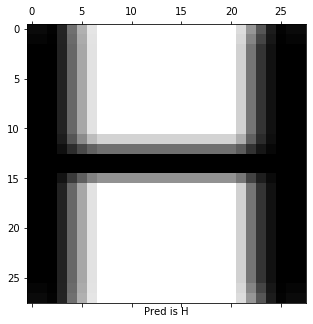

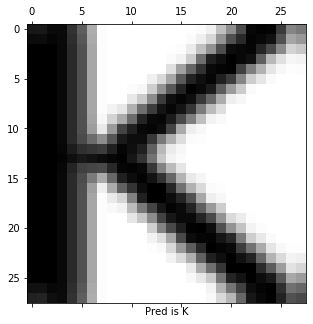

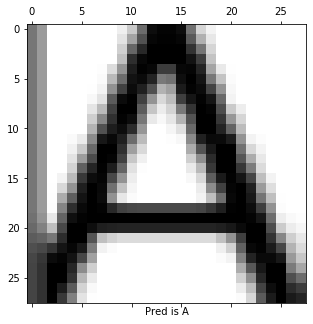

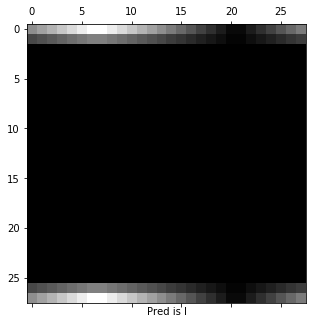

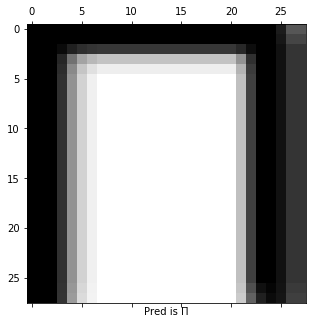

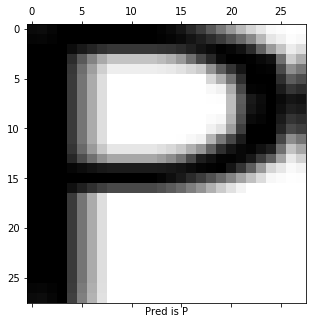

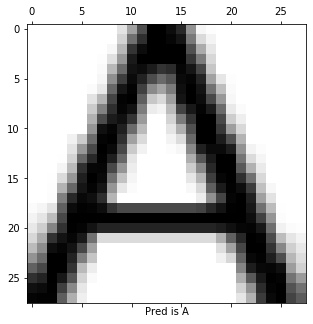

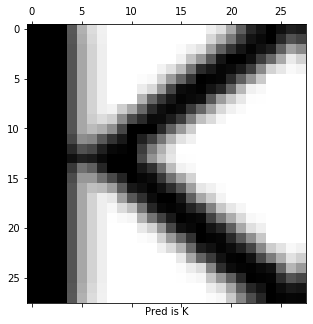

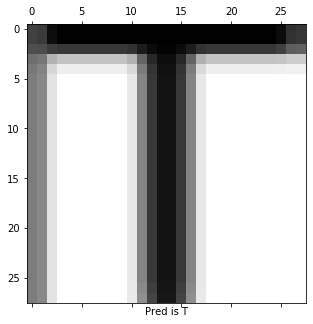

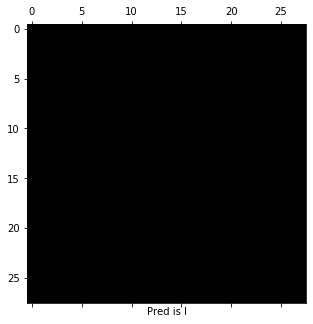

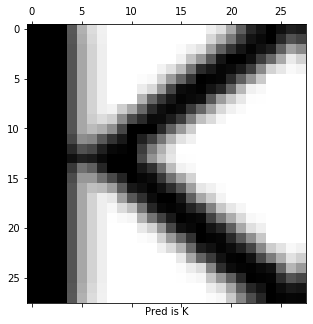

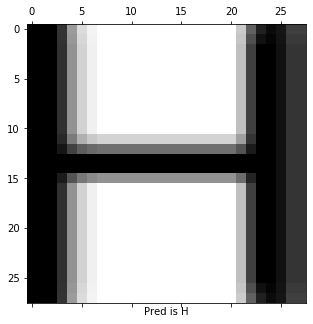

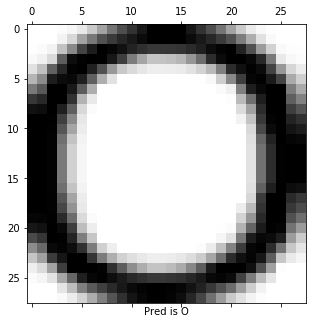

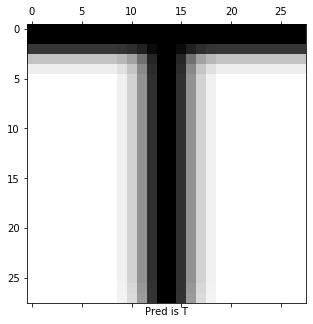

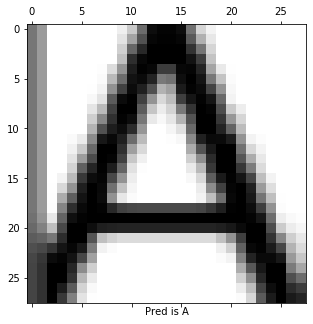

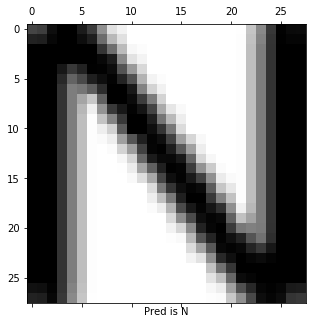

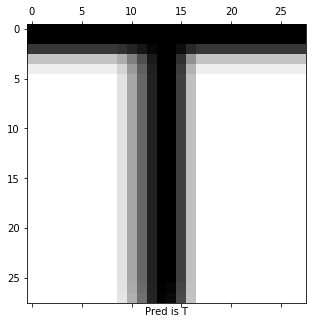

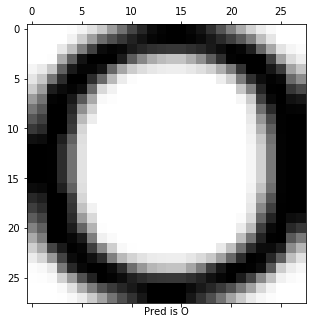

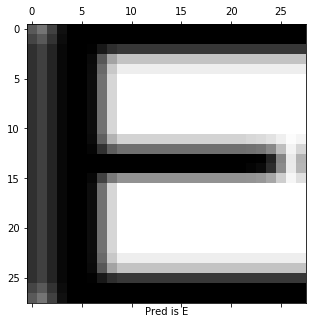

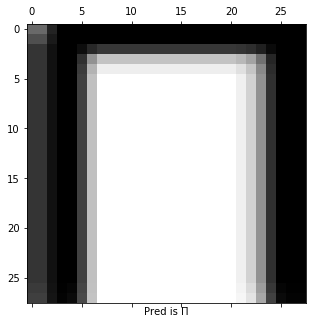

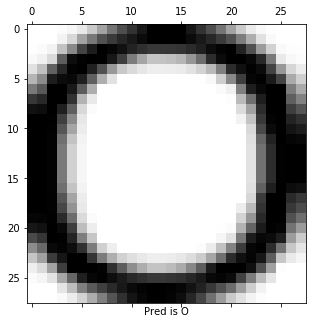

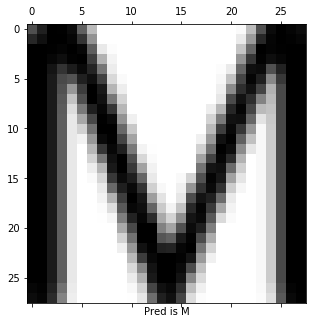

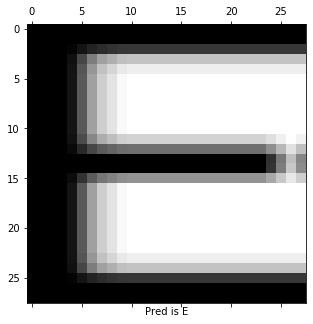

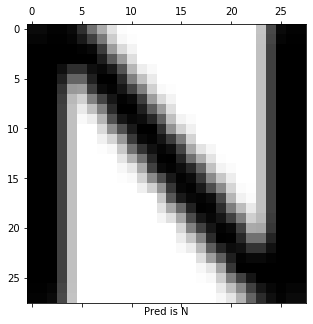

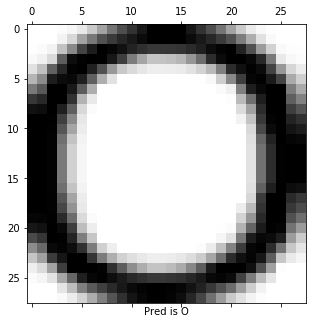

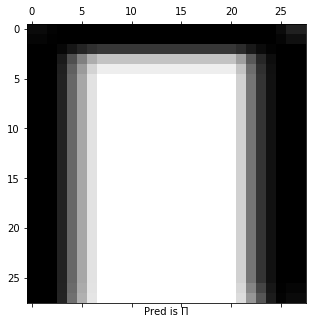

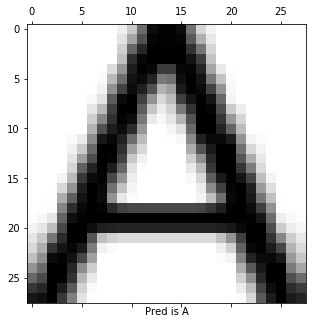

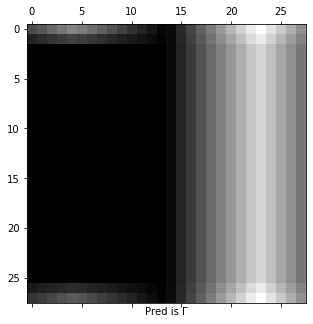

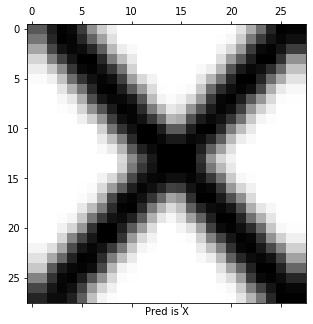

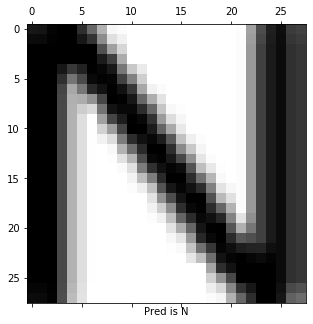

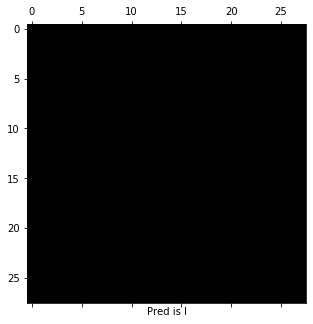

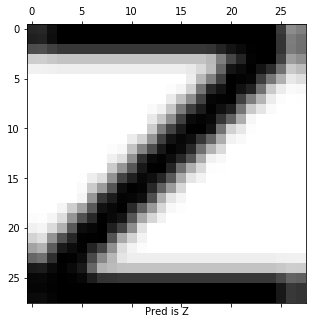

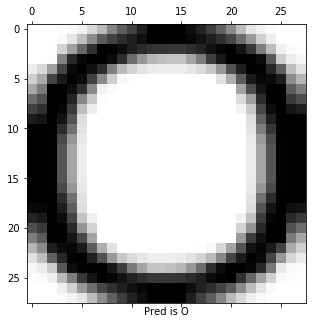

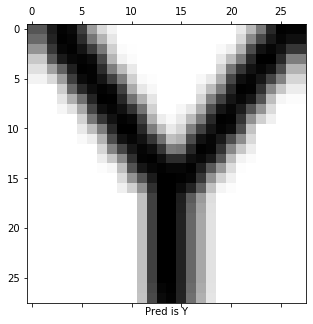

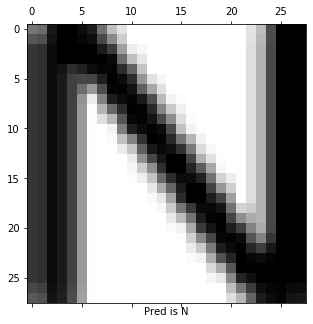

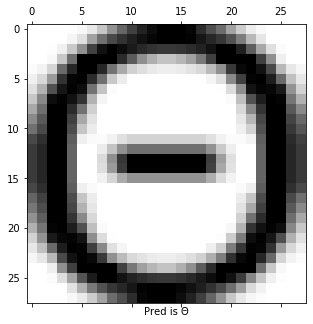

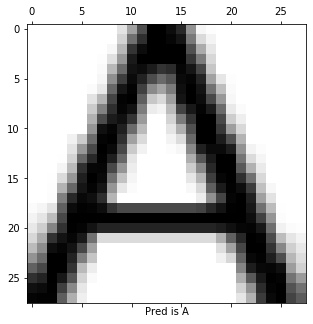

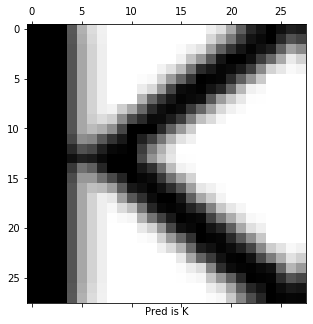

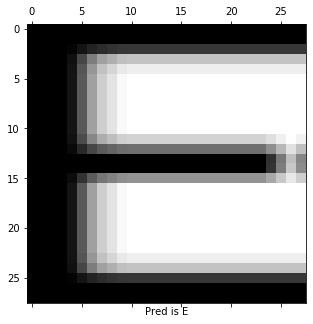

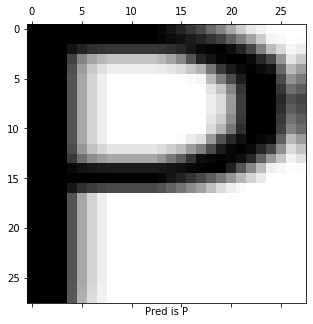

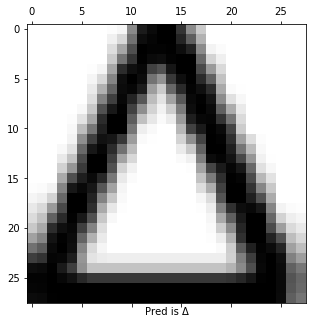

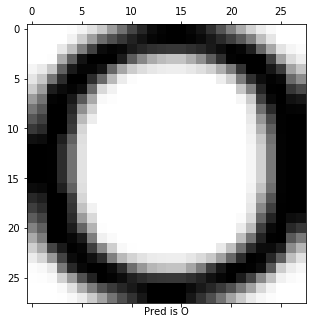

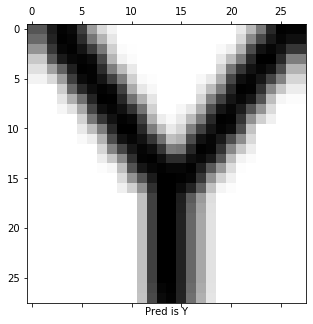

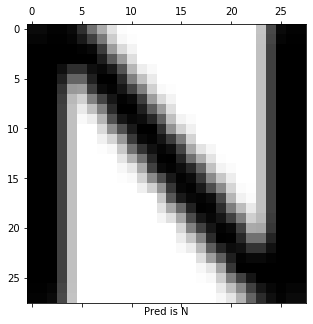

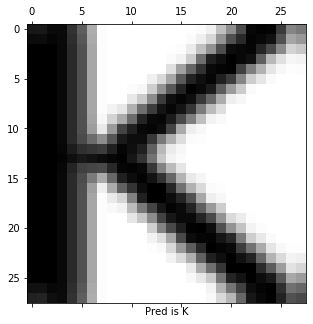

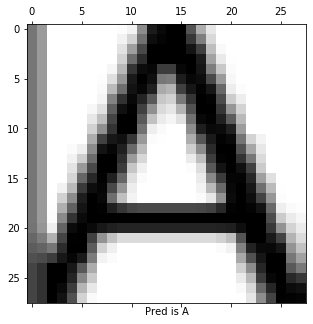

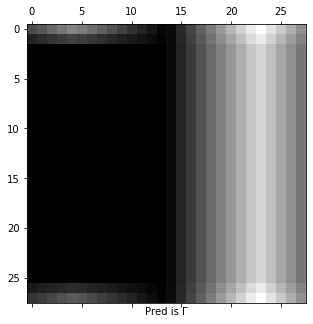

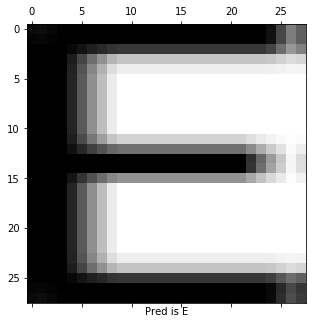

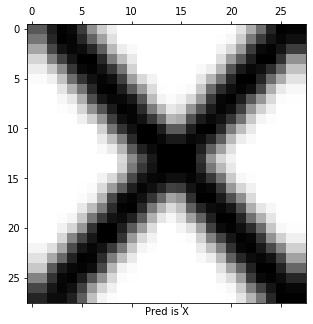

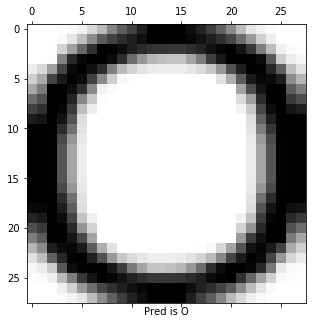

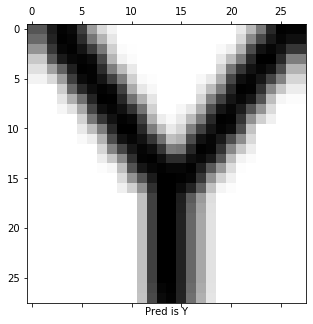

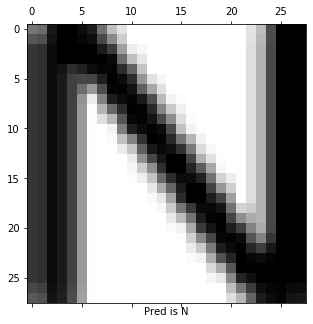

In [100]:
for i in range(0, test.shape[0]):
    plt.matshow(segments[i], cmap = 'gray')
    plt.xlabel('Pred is ' + prediction[i])

In [101]:
print(target)
print('')
print(prediction)

['Η', 'Ο', 'Μ', 'Α', 'Δ', 'Α', 'Π', 'Α', 'Ι', 'Χ', 'Ν', 'Ι', 'Ζ', 'Ε', 'Ι', 'Τ', 'Ο', 'Π', 'Ρ', 'Ω', 'Τ', 'Ο', 'Π', 'Α', 'Ι', 'Χ', 'Ν', 'Ι', 'Δ', 'Ι', 'Ο', 'Μ', 'Π', 'Α', 'Σ', 'Κ', 'Ε', 'Λ', 'Τ', 'Ο', 'Υ', 'Τ', 'Η', 'Σ', 'Ν', 'Ε', 'Α', 'Σ', 'Ε', 'Π', 'Ο', 'Χ', 'Η', 'Σ', 'Π', 'Ι', 'Σ', 'Ω', 'Α', 'Υ', 'Τ', 'Ο', 'Ε', 'Ι', 'Ν', 'Α', 'Ι', 'Τ', 'Ο', 'Π', 'Ε', 'Ρ', 'Ι', 'Σ', 'Σ', 'Ο', 'Τ', 'Ε', 'Ρ', 'Ο', 'Γ', 'Ι', 'Α', 'Τ', 'Ο', 'Π', 'Ε', 'Ρ', 'Ι', 'Σ', 'Σ', 'Ο', 'Τ', 'Ε', 'Ρ', 'Ο', 'Τ', 'Ο', 'Υ', 'Χ', 'Α', 'Ν', 'Ο', 'Υ', 'Ν', 'Ε', 'Ν', 'Α', 'Ν', 'Α', 'Ρ', 'Ι', 'Σ', 'Τ', 'Η', 'Ο', 'Μ', 'Α', 'Δ', 'Α', 'Π', 'Ο', 'Υ', 'Ε', 'Χ', 'Ε', 'Ι', 'Κ', 'Ο', 'Ν', 'Τ', 'Α', 'Σ', 'Τ', 'Ο', 'Π', 'Ρ', 'Ω', 'Τ', 'Ο', 'Τ', 'Υ', 'Π', 'Ο', 'Τ', 'Η', 'Ν', 'Ο', 'Μ', 'Α', 'Δ', 'Α', 'Π', 'Ο', 'Υ', 'Ε', 'Ι', 'Ν', 'Α', 'Ι', 'Δ', 'Υ', 'Ν', 'Α', 'Τ', 'Ο', 'Π', 'Α', 'Ι', 'Χ', 'Ν', 'Ι', 'Δ', 'Ι', 'Τ', 'Ο', 'Π', 'Α', 'Ι', 'Χ', 'Ν', 'Ι', 'Δ', 'Ι', 'Η', 'Ο', 'Μ', 'Α', 'Δ', 'Α', 'Π', 'Ε', 'Ρ', 'Ι', 'Σ', 'Σ', 'Ο', 'Τ', 'Ε', 'Ρ',